# Lab 1.1: Graph Regularization

In this lab, you will learn how to perform graph-based machine learning via regularization techniques.
The specific objectives are:

*   Implement different graph-based regularization techniques to perform node-wise signal regression.
*   Analyze the trade-off between fitting and regularization.
*   Explain the performance of particular regularizer.

**Completion requirements**

*   Showing the graph sparsity as a function of abstract network hyper-parameters.
*   Implementing and analyzing two regularizers for signal denosing and reconstruction. 
 



## Dataset and problem definition

To achieve the above objectives, we will work with a real-world weather dataset called **Molene**.
This dataset contains weather temperature over 32 distinct stations in France recorded for a month with hourly resolution.
We will treat each time instant as a graph signal and aim to recover it from noisy measurements and signals with missing values.
For this, we will compare two regularization techniques:
*   Tikhonov regularizer
$$
\hat{\textbf{x}} = \text{arg}\min_{\textbf{x}} \|\textbf{y} - \textbf{x}\|_2^2 + \alpha \textbf{x}^T\textbf{L}\textbf{x}
$$

*   Trend filtering.
$$
\hat{\textbf{x}} = \text{arg}\min_{\textbf{x}} \|\textbf{y} - \textbf{x}\|_2^2 + \beta \|\textbf{B}^T\textbf{x}\|_1,
$$
where $\textbf{B}$ is the incidence matrix of the graph.

## Libraries

* Numpy
* Pandas
* PyGSP or NetwrokX (or any other viable libraries)
* Scikit-learn
* Matplotlib
* CVXPy and CVXOPT (or any other optimization solver library)

In [1]:
import numpy as np
import pandas as pd
from pygsp import graphs, plotting
import networkx as nx
import matplotlib.pyplot as plt
import cvxpy as cp
import cvxopt as cvxopt

## Building the graph

We can treat each sensor as a node of a graph and the temperatures as signals over these nodes.
These sensors have also metadata such as their geolocation.
We can therefore build an abstract network connecting them.
This network can for instance be build using these metadata or using a portion of the time series and connecting nodes based on their statistical dependencies in them (e.g. Pearson correlation).
In either case, you could use different criteria to connect the nodes such as $k$-nearest neighbors, $\epsilon$-ball graph, etc.
*It is up to you to build any graph from any data* 

### Task 1

Build a **connected** and **sparse** graph between sensors.
Choose your hyperparameters to achieve at least 80% sparsity ($\frac{\text{zeros of } \textbf{A}}{N^2}$).
If you cannot ensure a connected graph with such a sparsity factor it can also be less sparse.
Tune your hyper parameters accordingly.

In [5]:
## Reading metadata of the stations
stations_metadata = pd.read_csv('lab1_molene/weather_stations_filtered_Molene.csv',index_col=0)
stations_metadata

Numéro                  Nom   Latitude Longitude  Lambert II X  \
0   22016001        ILE-DE-BREHAT  48°51'18N  3°00'12W         24419   
1   22092001              KERPERT  48°24'12N  3°08'48W         23925   
3   22135001             LOUARGAT  48°33'06N  3°22'36W         24101   
4   22147006           MERDRIGNAC  48°10'54N  2°24'36W         23644   
5   22168001          PLOUMANAC'H  48°49'30N  3°28'18W         24410   
6   22219003          PLOUGUENAST  48°15'54N  2°44'54W         23752   
7   22247002       POMMERIT-JAUDY  48°44'30N  3°15'00W         24306   
8   22261002            QUINTENIC  48°31'06N  2°25'12W         24018   
9   22266001            ROSTRENEN  48°13'48N  3°18'24W         23742   
10  22282001      SAINT-CAST-LE-G  48°38'36N  2°14'48W         24149   
11  22372001            ST BRIEUC  48°32'00N  2°51'06W         24055   
19  29158001      PTE DE PENMARCH  47°47'48N  4°22'24W         23324   
20  29163003    PLEYBER-CHRIST SA  48°30'00N  3°51'12W         24070   
21  29168001           PTE DU RAZ  48°02'18N  4°43'54W         23614   
25  29263002         ST-SEGAL S A  48°13'36N  4°05'48W         23783   
27  29276001          SIBIRIL S A  48°39'36N  4°04'36W         24261   
29  29278001               SPEZET  48°10'24N  3°43'42W         23701   
30  35228001               DINARD  48°35'18N  2°04'30W         24081   
31  44069002             GUERANDE  47°17'30N  2°25'48W         22657   
33  44184001     PTE DE CHEMOULIN  47°14'00N  2°17'54W         22586   
35  56007001                AURAY  47°39'30N  2°58'12W         23090   
36  56009001   BELLE ILE-LE TALUT  47°17'36N  3°13'06W         22698   
37  56017003               BIGNAN  47°53'00N  2°43'42W         23328   
38  56069001         ILE DE GROIX  47°39'06N  3°30'06W         23110   
40  56159001           PLEUCADEUC  47°45'54N  2°23'12W         23180   
41  56165003             PLOERMEL  47°57'00N  2°23'48W         23386   
43  56178003              PONTIVY  48°03'48N  2°56'42W         23537   
44  56185001  LORIENT-LANN BIHOUE  47°45'42N  3°26'06W         23229   
45  56240003           SARZEAU SA  47°30'42N  2°47'48W         22917   
46  56243001          VANNES-SENE  47°36'12N  2°42'48W         23016   
47  56251001                THEIX  47°38'24N  2°37'12W         23053   
48  85163001       NOIRMOUTIER EN  47°00'12N  2°15'24W         22330   

     Lambert II Y  Altitude  
0            2081        25  
1            1941       281  
3            1784       148  
4            2471       131  
5            1735        55  
6            2226       235  
7            1891        55  
8            2487        71  
9            1809       262  
10           2622        35  
11           2169       135  
19            977         3  
20           1428       147  
21            735        67  
25           1223        63  
27           1278        58  
29           1491       138  
30           2745        58  
31           2396         4  
33           2492        14  
35           2016        26  
36           1802        34  
37           2213       112  
38           1617        41  
40           2460        65  
41           2465        65  
43           2065        83  
44           1676        45  
45           2135        37  
46           2204         3  
47           2276        29  
48           2508         3

In [6]:
## extracting the coordinates for each station from the metadata => these coordinates can be treated as distance
coordinates_df = stations_metadata.iloc[:,-3:]  
coordinates_df = coordinates_df - coordinates_df.mean() # => Removing mean to have more tangible coordinates
coordinates = coordinates_df.to_numpy()

In [7]:
## Add your code here
## You can PyGSP or NetwrokX pakcage for this to have predefined graph builders.

# Number of nearest neighbors
# k=5 is the maximum number of neighbors for which the graph sparsity is > 80%.
k = 5 

# Number of nodes
num_nodes = coordinates.shape[0]

# Distance between the nodes based on the coordinates
distances = np.zeros((num_nodes, num_nodes))
for i in range(num_nodes):
    for j in range(num_nodes):
        distances[i, j] = np.linalg.norm(coordinates[i] - coordinates[j])


# Adjacency matrix            
A = np.zeros((num_nodes, num_nodes))

def nearest_neighbors(distances, k):

    # Fill A using k neighbors
    for i in range(num_nodes):
        sorted_indices = np.argsort(distances[i])
        smallest_distances_indices = sorted_indices[1:k+1]
        for j in smallest_distances_indices:
            A[i, j] = distances[i, j]
            A[j, i] = distances[i, j] 
    
    return A

A = nearest_neighbors(distances, k=k)   

# Adjacency matrix to NetworkX graph
graph = nx.from_numpy_array(A)   
print(graph)   
    
# Compute sparsity 
sparsity = 1 - nx.density(graph)
print(f"Sparsity of the graph: {sparsity * 100:.2f}%")

# Check if the graph is connected:
print(f"Is the graph connected: {nx.is_connected(graph)}")


Graph with 32 nodes and 99 edges
Sparsity of the graph: 80.04%
Is the graph connected: True


### Question 1
What type of graph did you use and what is the hyperparameter of it?
Make a plot of the graph sparsity as a function of at least one hyper parameter.
Make sure the graph remains connected.

**Answer**:
<font color = 'red'>
To build the graph I treated each sensor is treated as a node and linked the nodes based on the geographical location using k-nearest neighbors. The hyperparameter is k, which represents the number of nearest neighbors considered for each node.
In the first step, the distance between all nodes is calculated and stored in the matrix 'distances'. Then k-nearest neighbors are selected for each node to construct the adjacency matrix which is used to build a NetworkX graph. <br/><br/>
    
 
<font color = 'red'>
The value of k affects the graph's sparsity and connectivity. The maximum number of nearest neighbors to achieve a sparsity over 80% is k=5, above that value the graph is not connected anymore. As shown in the figures plotted below, the graph sparsity decreases as k increases, until it reaches 0 for k=32, when the graph is complete or fully connected. The figure on the bottom shows whether the graph is connected or not as a function of k, it can be seen that for k<3 the graph is not connected and for k=>3 the graph is connected. To build the graph a value of k=5 was chosen, maximizing connectivity while keeping the sparsity above 80%.  


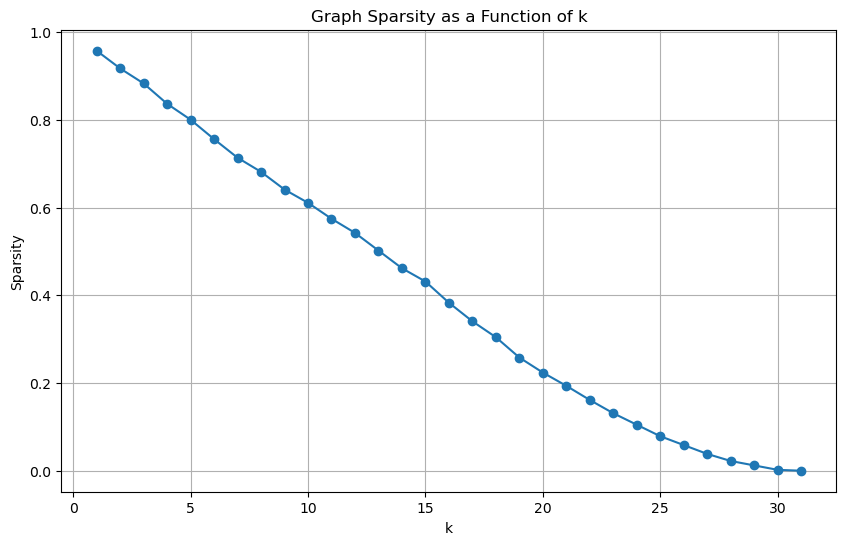

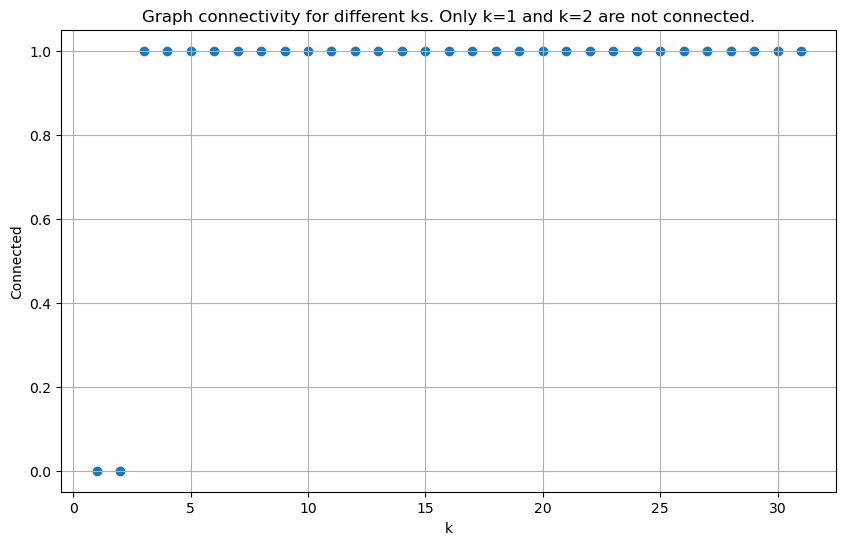

In [15]:
# Range of k values to plot
k_values = range(1, num_nodes)

# Lists to store results
sparsities = []
connected_or_not = []

for k in k_values:
    # Create adjacency matrix
    A = np.zeros((num_nodes, num_nodes))
    A = nearest_neighbors(distances, k=k)
    # Convert adjacency matrix to NetworkX graph
    graph = nx.from_numpy_array(A)   
   
    # Compute the sparsity and connectivity
    sparsity = 1 - nx.density(graph)
    connected = nx.is_connected(graph)
    
    # Store results
    sparsities.append(sparsity)
    connected_or_not.append(connected)

# Plot sparsity as function of k
plt.figure(figsize=(10,6))
plt.plot(k_values, sparsities, marker='o')
plt.xlabel('k')
plt.ylabel('Sparsity')
plt.title('Graph Sparsity as a Function of k')
plt.grid(True)
plt.show()

# Plot connectivity as function of k
plt.figure(figsize=(10,6))
plt.scatter(k_values, connected_or_not, marker='o')
plt.xlabel('k')
plt.ylabel('Connected')
plt.title('Graph connectivity for different ks. Only k=1 and k=2 are not connected.')
plt.grid(True)
plt.show()


## Noisy measurements

Let $e$ be the average energy of the graph signals in the dataset.
$$
e = \frac{1}{m} \sum_{i=1}^m \|\textbf{x}_i\|_2^2,
$$
where $m$ is the number of data points.
Generate $m$ noisy graph signal $\textbf{y} = \textbf{x} + \textbf{n}$ where $\textbf{n}$ is a zero-mean Gaussian noise $\textbf{n} \sim \mathcal{N}(0,σ^2\textbf{I})$.
Consider $\sigma^2 = e/2$.

In [16]:
## loading the data
timeseries_data = pd.read_csv('lab1_molene/filtered_data_Molene.csv', index_col = 'date', parse_dates = True)
timeseries_data = timeseries_data - timeseries_data.mean() # => removing mean from data

In [17]:
x = timeseries_data.to_numpy().transpose()  # => transpose the data so we have each column as a graph signal
# print(x.shape)
# 32 rows, one per sensor ; 744 columns, one for each hourly measurement

e = np.sum(np.square(x))/x.shape[1] # computing average energy

sigma = e/x.shape[0]/2
n = np.random.multivariate_normal(np.zeros(x.shape[0]),sigma*np.eye(x.shape[0]),size=x.shape[1]).transpose() # => generating noise

y = x + n   # adding to noise to synthesize noisy observations

### Task 2

Use the Tikhonov regularizer for a choice of $\alpha > 0$ to recover signal $\textbf{x}$ from the measurements $\textbf{y}$.
Provide the signal recovery metric root normalized mean square error (rNMSE)
$$
\text{rNMSE} = \left(\frac{\sum_{i=1}^m \|\hat{\textbf{x}}_i-\textbf{x}_i\|_2^2}{\sum_{i=1}^m\|\textbf{y}_i\|_2^2}
\right)^{0.5}
$$

In [18]:
## set the regularizer coefficient
alpha = 1

## exploit the graph Laplacian (if you are using pygsp, convert it to dense format from sparse for further computations(use .todense()).
#L = nx.laplacian_matrix(graph, nodelist=None).todense()
L = nx.laplacian_matrix(graph).todense()

## write down the closed form solution for Tikhonov regularizer
x_hat = np.matmul(np.linalg.inv(np.eye(L.shape[0], L.shape[1]) + alpha*L),y) 

rnmse = np.sqrt(np.square(x_hat-x).mean())/y.std()  # rnmse definition

print(f"The rNMSE is: {np.round(rnmse,4)}")


The rNMSE is: 0.3333


### Question 2

Illustrate rNMSE as a function of $\alpha \in [0,10]$. What do you conclude about the role of the regularizer?




Normalized Laplacian, best α=5.3, rNMSE=0.3003186706567307


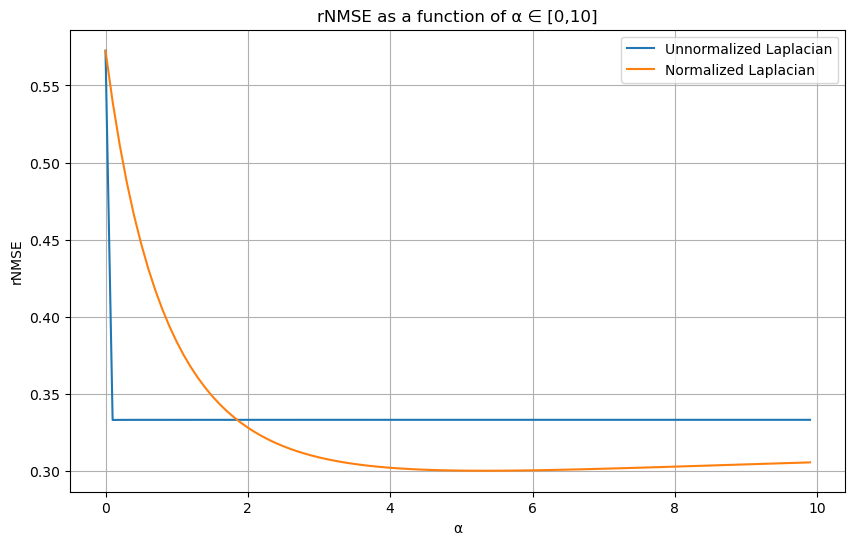

In [19]:
## Add your code here

alphas_tikhonov_e2 = []
rnmses_tikhonov_e2 = []
rnmses_tikhonov_e2_normalized = []
best_alpha = 0
best_rnmse = 1

# Normalized Laplacian
lambda_max = np.max(np.linalg.eigvals(L))
L_normalized = L / lambda_max

for i in range(0,100):
    alpha = i/10
    # Closed form solution for Tikhonov regularizer
    x_hat = np.matmul(np.linalg.inv(np.eye(L.shape[0], L.shape[1]) + alpha*L),y)
    # rNMSE definition
    rnmse = np.sqrt(np.square(x_hat-x).mean())/y.std()
    # Using the normalized Laplacian
    x_hat_normalized = np.matmul(np.linalg.inv(np.eye(L_normalized.shape[0], L_normalized.shape[1]) + alpha*L_normalized),y)
    rnmse_normalized = np.sqrt(np.square(x_hat_normalized-x).mean())/y.std()  
    # Append to lists
    alphas_tikhonov_e2.append(alpha)
    rnmses_tikhonov_e2.append(rnmse)
    rnmses_tikhonov_e2_normalized.append(rnmse_normalized)

    if rnmse_normalized < best_rnmse:
        best_rnmse = rnmse_normalized
        best_alpha = alpha

print(f'Normalized Laplacian, best α={best_alpha}, rNMSE={best_rnmse}')

# Plot the rNMSE as function of alpha
plt.figure(figsize=(10,6))
plt.plot(alphas_tikhonov_e2, rnmses_tikhonov_e2, label='Unnormalized Laplacian')
plt.plot(alphas_tikhonov_e2, rnmses_tikhonov_e2_normalized, label='Normalized Laplacian')
plt.xlabel("α")
plt.ylabel("rNMSE")
plt.title('rNMSE as a function of α ∈ [0,10]')
plt.legend()  
plt.grid(True)
plt.show()


**Answer**:

<font color = 'red'>    
The regularization term of the Tikhonov regularization enforces a smooth variation of the signal values on the graph, assuming that connected nodes are likely to have similar signal values. Since the data contained in the Molene dataset is the temperature over the 32 geographically distributed stations, and because the weather tends to change smoothly between locations, I would expect that the assumption holds and that Tikhonov would be a good choice for regularizer.<br/><br/>
<font color = 'red'>    
However, I originally got the result shown in the figure above with the blue line, using the Laplacian matrix and the closed form solution of the Tikhonov regularizer as defined in the assignment. It shows a drastic change in behaviour in the rNMSE as a function of α. For α=0 the rNMSE is high at a value of 0.58, and for greater values of α, the rNMSE is decreased suggesting that regularization is beneficial. However, the value of the rNMSE stays constant and does not change with greater values of α.<br/><br/>
<font color = 'red'>    
I searched online and asked ChatGPT to discover why it was happening and found out that nomalizing the Laplacian by dividing it by its largest eigenvalue can help, since it ensures that the regularizer and the loss term have the same scale. I therefore show in orange the results obtained using the normalized Laplacian, it can be seen that the results are significantly better. The lowest error is achieved for α=5.3.<br/><br/>
    

  

### Question 3

Consider now different noisy scenarios, $\sigma^2 = e/10$ and $\sigma^2 = e$.
Add the respective line into your plot.
What do you conclude about the role of the regularizer?

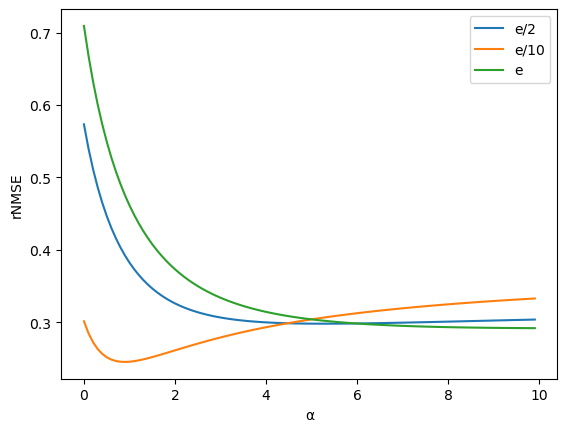

In [20]:
## Add your code here

sigmas = ["e/x.shape[0]/2", "e/x.shape[0]/10", "e/x.shape[0]"]

for sigma_expression in sigmas:
    sigma = eval(sigma_expression)
    # Using the code provided above:
    n = np.random.multivariate_normal(np.zeros(x.shape[0]),sigma*np.eye(x.shape[0]),size=x.shape[1]).transpose()
    y = x + n  

    rnmses = []
    alphas = []

    for i in range(0,100):
        alpha = i/10
        # Closed form solution for Tikhonov regularizer using the normalized Laplacian
        x_hat = np.matmul(np.linalg.inv(np.eye(L_normalized.shape[0], L_normalized.shape[1]) + alpha*L_normalized),y)
        # rnmse definition
        rnmse = np.sqrt(np.square(x_hat-x).mean())/y.std()
        # Append to lists
        rnmses.append(rnmse)
        alphas.append(alpha)

    plt.plot(alphas, rnmses, label=sigma_expression.replace('/x.shape[0]', ''))
    plt.xlabel("α")
    plt.ylabel("rNMSE")
    
plt.legend()

**Answer**:

<font color = 'red'>   
It can be observed in the figure above that the Tikhonov regularizer performs differently for different levels of noise.<br/><br/>
<font color = 'red'>    
When the noise level is high, the regularization term in Tikhonov regularization is very important because in noisy scenarios, the model can overfit to the noise in the training data, resulting in poor generalization performance. In this case, the regularization term prevents overfitting and, as can be seen in the green line for $\sigma^2 = e$, a larger value of α improves the accuracy of the model.<br/><br/>
<font color = 'red'>    
For a lower level of noise, $\sigma^2 = e/2$, the regularization term is also important. However, if the value of α is too big, above the optimum of α=5.3 found in the previous section, the performance starts to get worse because too much importance is being given to making the signal smooth accross the graph, smoother than the real temperatures recorded accross the sensor network.<br/><br/>    
<font color = 'red'>    
Finally, for a low noise level of $\sigma^2 = e/10$, the model is able to fit to the data without the risk of overfitting to the noise and thus only a small regularization term is needed. As seen in the figure, for values of α above α≈0.75, which results in the lowest rNMSE, the error starts to increase rapidly. <br/><br/>
 


### Task 3

Implement trend filtering regularizer and compare the performance with the Tikhonov regularizer for $\sigma^2 = e/2$.

<font color = 'red'>
Trend filtering regularizer is implemented.


In [12]:
## Add your code here.
## You may need an optimization solver if your chosen regularizer does not have a closed form solution.

# Define sigma
sigma = e / 2
num_nodes = nx.number_of_nodes(graph)

# Normalized Laplacian of the graph
L = nx.laplacian_matrix(graph).toarray()
lambda_max = np.max(np.linalg.eigvals(L))
L_normalized = L / lambda_max
Lt = L_normalized.T

# Implement Trend Filtering
def trend_filtering(y, sigma, lambda_):
    x = cp.Variable(num_nodes)

    # Objective function
    objective = cp.Minimize(cp.sum_squares(y - x) / (2*sigma**2) + lambda_ * cp.norm(Lt @ x, 1))

    # Solve
    prob = cp.Problem(objective)
    prob.solve(verbose=True)

    return x.value

# Calculate rNMSE
def rnmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2)) / np.sqrt(np.mean((y_true) ** 2))

# Range of lambda values
# Due to the extremely long time the optimizer took to solve in my machine, I could only calculate two lambdas
# I am aware the relation between lambda and the rNMSE is not linear, however, it was the best result given the constraints
lambda_range = np.logspace(-4, 2, 2)

# Store rNMSEs
rnmse_trend_e2 = []

# Loop over the lambda values
for lambda_ in lambda_range:

    filtered_signals = np.zeros_like(y)

    # Trend filtering for each graph signal
    for i in range(y.shape[1]):
        filtered_signals[:, i] = trend_filtering(y[:, i], sigma, lambda_)

    # Calculate rNMSE and append to list
    rnmse_trend_e2.append(rnmse(x, filtered_signals))


                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:06 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:06 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:06 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:06 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:06 PM: Compiling problem (target solver=OSQP).
(CVXPY) May 21 01:42:06 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing

(CVXPY) May 21 01:42:06 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:06 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:06 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:06 PM: Finished problem compilation (took 9.000e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:06 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + nnz(A) = 2208
settings: linear system solver = qdldl,
         

(CVXPY) May 21 01:42:06 PM: Optimal value: 2.566e-03
(CVXPY) May 21 01:42:06 PM: Compilation took 7.932e-03 seconds
(CVXPY) May 21 01:42:06 PM: Solver (including time spent in interface) took 1.919e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:06 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:06 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:06 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:06 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:06 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:06 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:06 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:06 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:06 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:06 PM: Finished problem compilation (took 8.009e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:06 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:06 PM: Optimal value: 2.888e-03
(CVXPY) May 21 01:42:06 PM: Compilation took 8.000e-03 seconds
(CVXPY) May 21 01:42:06 PM: Solver (including time spent in interface) took 1.998e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:06 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:06 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:06 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:06 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:06 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:06 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:06 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:06 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:06 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:06 PM: Finished problem compilation (took 8.000e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:06 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:06 PM: Optimal value: 1.708e-03
(CVXPY) May 21 01:42:06 PM: Compilation took 8.995e-03 seconds
(CVXPY) May 21 01:42:06 PM: Solver (including time spent in interface) took 1.999e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:06 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:06 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:06 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:06 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:06 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:06 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:06 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:06 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:06 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:06 PM: Finished problem compilation (took 9.017e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:06 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:06 PM: Optimal value: 2.481e-03
(CVXPY) May 21 01:42:06 PM: Compilation took 7.999e-03 seconds
(CVXPY) May 21 01:42:06 PM: Solver (including time spent in interface) took 9.999e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:06 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:06 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:06 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:06 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:06 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:06 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:06 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:06 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:06 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:06 PM: Finished problem compilation (took 1.007e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:06 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:06 PM: Optimal value: 2.722e-03
(CVXPY) May 21 01:42:06 PM: Compilation took 8.014e-03 seconds
(CVXPY) May 21 01:42:06 PM: Solver (including time spent in interface) took 2.125e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:06 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:06 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:06 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:06 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:06 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:06 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:06 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:06 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:06 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:06 PM: Finished problem compilation (took 8.002e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:06 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:06 PM: Optimal value: 2.800e-03
(CVXPY) May 21 01:42:06 PM: Compilation took 9.000e-03 seconds
(CVXPY) May 21 01:42:06 PM: Solver (including time spent in interface) took 2.001e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:06 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:06 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:06 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:06 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:06 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:06 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:06 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:06 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:06 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:06 PM: Finished problem compilation (took 7.998e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:06 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:06 PM: Optimal value: 2.546e-03
(CVXPY) May 21 01:42:06 PM: Compilation took 8.005e-03 seconds
(CVXPY) May 21 01:42:06 PM: Solver (including time spent in interface) took 2.405e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:06 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:06 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:06 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:06 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:06 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:06 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:06 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:06 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:06 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:06 PM: Finished problem compilation (took 1.126e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:06 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:06 PM: Optimal value: 2.730e-03
(CVXPY) May 21 01:42:06 PM: Compilation took 1.101e-02 seconds
(CVXPY) May 21 01:42:06 PM: Solver (including time spent in interface) took 2.000e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:06 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:06 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:06 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:06 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:06 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:06 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:06 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:06 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:06 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:06 PM: Finished problem compilation (took 8.017e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:06 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:06 PM: Optimal value: 1.723e-03
(CVXPY) May 21 01:42:06 PM: Compilation took 7.999e-03 seconds
(CVXPY) May 21 01:42:06 PM: Solver (including time spent in interface) took 9.975e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:07 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:07 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:07 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:07 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:07 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:07 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:07 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:07 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:07 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:07 PM: Finished problem compilation (took 9.015e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:07 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:07 PM: Optimal value: 2.488e-03
(CVXPY) May 21 01:42:07 PM: Compilation took 8.012e-03 seconds
(CVXPY) May 21 01:42:07 PM: Solver (including time spent in interface) took 2.002e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:07 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:07 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:07 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:07 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:07 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:07 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:07 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:07 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:07 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:07 PM: Finished problem compilation (took 1.001e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:07 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:07 PM: Optimal value: 2.586e-03
(CVXPY) May 21 01:42:07 PM: Compilation took 9.009e-03 seconds
(CVXPY) May 21 01:42:07 PM: Solver (including time spent in interface) took 1.999e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:07 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:07 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:07 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:07 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:07 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:07 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:07 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:07 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:07 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:07 PM: Finished problem compilation (took 9.000e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:07 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:07 PM: Optimal value: 2.272e-03
(CVXPY) May 21 01:42:07 PM: Compilation took 8.011e-03 seconds
(CVXPY) May 21 01:42:07 PM: Solver (including time spent in interface) took 1.001e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:07 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:07 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:07 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:07 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:07 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:07 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:07 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:07 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:07 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:07 PM: Finished problem compilation (took 8.518e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:07 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:07 PM: Optimal value: 3.071e-03
(CVXPY) May 21 01:42:07 PM: Compilation took 8.999e-03 seconds
(CVXPY) May 21 01:42:07 PM: Solver (including time spent in interface) took 2.000e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:07 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:07 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:07 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:07 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:07 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:07 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:07 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:07 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:07 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:07 PM: Finished problem compilation (took 9.007e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:07 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:07 PM: Optimal value: 3.312e-03
(CVXPY) May 21 01:42:07 PM: Compilation took 8.516e-03 seconds
(CVXPY) May 21 01:42:07 PM: Solver (including time spent in interface) took 2.000e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:07 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:07 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:07 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:07 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:07 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:07 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:07 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:07 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:07 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:07 PM: Finished problem compilation (took 7.992e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:07 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:07 PM: Optimal value: 3.257e-03
(CVXPY) May 21 01:42:07 PM: Compilation took 9.020e-03 seconds
(CVXPY) May 21 01:42:07 PM: Solver (including time spent in interface) took 2.084e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:07 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:07 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:07 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:07 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:07 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:07 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:07 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:07 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:07 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:07 PM: Finished problem compilation (took 1.100e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:07 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:07 PM: Optimal value: 2.415e-03
(CVXPY) May 21 01:42:07 PM: Compilation took 1.001e-02 seconds
(CVXPY) May 21 01:42:07 PM: Solver (including time spent in interface) took 3.002e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:07 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:07 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:07 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:07 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:07 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:07 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:07 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:07 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:07 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:07 PM: Finished problem compilation (took 8.001e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:07 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:07 PM: Optimal value: 2.859e-03
(CVXPY) May 21 01:42:07 PM: Compilation took 8.008e-03 seconds
(CVXPY) May 21 01:42:07 PM: Solver (including time spent in interface) took 2.000e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:07 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:07 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:07 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:07 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:07 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:07 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:07 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:07 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:07 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:07 PM: Finished problem compilation (took 8.008e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:07 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:07 PM: Optimal value: 2.489e-03
(CVXPY) May 21 01:42:07 PM: Compilation took 9.995e-03 seconds
(CVXPY) May 21 01:42:07 PM: Solver (including time spent in interface) took 1.000e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:07 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:07 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:07 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:07 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:07 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:07 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:07 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:07 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:07 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:07 PM: Finished problem compilation (took 9.998e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:07 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:07 PM: Optimal value: 3.134e-03
(CVXPY) May 21 01:42:07 PM: Compilation took 9.004e-03 seconds
(CVXPY) May 21 01:42:07 PM: Solver (including time spent in interface) took 1.986e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:07 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:07 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:07 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:07 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:07 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:07 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:07 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:07 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:07 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:07 PM: Finished problem compilation (took 9.016e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:07 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:07 PM: Optimal value: 2.839e-03
(CVXPY) May 21 01:42:07 PM: Compilation took 1.102e-02 seconds
(CVXPY) May 21 01:42:07 PM: Solver (including time spent in interface) took 1.988e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:07 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:07 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:07 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:07 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:07 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:07 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:07 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:07 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:07 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:07 PM: Finished problem compilation (took 7.996e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:07 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:07 PM: Optimal value: 3.568e-03
(CVXPY) May 21 01:42:07 PM: Compilation took 1.099e-02 seconds
(CVXPY) May 21 01:42:07 PM: Solver (including time spent in interface) took 2.007e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:07 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:07 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:07 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:07 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:07 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:07 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:07 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:07 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:07 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:07 PM: Finished problem compilation (took 9.987e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:07 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:08 PM: Optimal value: 2.507e-03
(CVXPY) May 21 01:42:08 PM: Compilation took 7.997e-03 seconds
(CVXPY) May 21 01:42:08 PM: Solver (including time spent in interface) took 9.909e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:08 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:08 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:08 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:08 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:08 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:08 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:08 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:08 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:08 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:08 PM: Finished problem compilation (took 1.051e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:08 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

   1  -2.5600e-02   8.71e+00   8.71e-02   1.00e-01   2.67e-04s
  75   2.5172e-03   1.49e-05   1.10e-11   1.00e-01   1.24e-03s
plsh   2.5172e-03   8.88e-16   1.28e-19   --------   1.40e-03s

status:               solved
solution polish:      successful
number of iterations: 75
optimal objective:    0.0025
run time:             1.40e-03s
optimal rho estimate: 3.94e-01

-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:08 PM: Problem status: optimal
(CVXPY) May 21 01:42:08 PM: Optimal value: 2.517e-03
(CVXPY) May 21 01:42:08 PM: Compilation took 1.200e-02 seconds
(CVXPY) May 21 01:42:08 PM: Solver (including time spent in interface) took 2.001e-03 seconds
                                     CVXPY                                     
                                     v1.3.1     

(CVXPY) May 21 01:42:08 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:08 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:08 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:08 PM: Compiling problem (target solver=OSQP).
(CVXPY) May 21 01:42:08 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:08 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:08 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:08 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:08 PM: Applying reduction OSQP
(CVX

-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + nnz(A) = 2208
settings: linear system solver = qdldl,
          eps_abs = 1.0e-05, eps_rel = 1.0e-05,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 10000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -2.5600e-02   8.91e+00   8.91e-02   1.00e-01   2.62e-04s
  75   2.5817e-03   4.27e-08   4.14e-12   5.77e-01   7.77e-04s
plsh   2.5817e-03   8.88e-16   1.25e-19   ----

(CVXPY) May 21 01:42:08 PM: Optimal value: 2.107e-03
(CVXPY) May 21 01:42:08 PM: Compilation took 7.998e-03 seconds
(CVXPY) May 21 01:42:08 PM: Solver (including time spent in interface) took 1.005e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:08 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:08 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:08 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:08 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:08 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:08 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:08 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:08 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:08 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:08 PM: Finished problem compilation (took 1.002e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:08 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:08 PM: Optimal value: 2.183e-03
(CVXPY) May 21 01:42:08 PM: Compilation took 9.007e-03 seconds
(CVXPY) May 21 01:42:08 PM: Solver (including time spent in interface) took 1.988e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:08 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:08 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:08 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:08 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:08 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:08 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:08 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:08 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:08 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:08 PM: Finished problem compilation (took 8.999e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:08 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

          warm start: on, polish: on, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -2.5600e-02   8.75e+00   8.75e-02   1.00e-01   7.71e-04s
  75   2.4733e-03   1.47e-08   1.25e-12   5.50e-01   1.62e-03s
plsh   2.4733e-03   8.88e-16   1.22e-19   --------   1.85e-03s

status:               solved
solution polish:      successful
number of iterations: 75
optimal objective:    0.0025
run time:             1.85e-03s
optimal rho estimate: 2.10e-01

-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:08 PM: Problem status: optimal
(CVXPY) May 21 01:42:08 PM: Optimal value: 2.473e-03
(CVXPY) May 21 01:42:08 PM: Compilation took 9.540e-03 seconds
(CVXPY) May 21 01:42:08 PM: Solver (including time spent in interface) took 3.000e-03 seconds
               

(CVXPY) May 21 01:42:08 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:08 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:08 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:08 PM: Compiling problem (target solver=OSQP).
(CVXPY) May 21 01:42:08 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:08 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:08 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:08 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:08 PM: Applying reduction OSQP
(CVX

-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + nnz(A) = 2208
settings: linear system solver = qdldl,
          eps_abs = 1.0e-05, eps_rel = 1.0e-05,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 10000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -2.5600e-02   8.00e+00   7.08e-02   1.00e-01   2.68e-04s
  75   3.0366e-03   3.56e-08   1.26e-12   6.36e-01   8.69e-04s
plsh   3.0366e-03   8.88e-16   9.32e-20   ----

(CVXPY) May 21 01:42:08 PM: Optimal value: 2.967e-03
(CVXPY) May 21 01:42:08 PM: Compilation took 7.998e-03 seconds
(CVXPY) May 21 01:42:08 PM: Solver (including time spent in interface) took 2.005e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:08 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:08 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:08 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:08 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:08 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:08 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:08 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:08 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:08 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:08 PM: Finished problem compilation (took 8.008e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:08 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:08 PM: Optimal value: 2.406e-03
(CVXPY) May 21 01:42:08 PM: Compilation took 8.021e-03 seconds
(CVXPY) May 21 01:42:08 PM: Solver (including time spent in interface) took 1.992e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:08 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:08 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:08 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:08 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:08 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:08 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:08 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:08 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:08 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:08 PM: Finished problem compilation (took 8.000e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:08 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:08 PM: Optimal value: 2.845e-03
(CVXPY) May 21 01:42:08 PM: Compilation took 1.200e-02 seconds
(CVXPY) May 21 01:42:08 PM: Solver (including time spent in interface) took 9.990e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:08 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:08 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:08 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:08 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:08 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:08 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:08 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:08 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:08 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:08 PM: Finished problem compilation (took 9.084e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:08 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:08 PM: Optimal value: 3.972e-03
(CVXPY) May 21 01:42:08 PM: Compilation took 8.002e-03 seconds
(CVXPY) May 21 01:42:08 PM: Solver (including time spent in interface) took 1.000e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:08 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:08 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:08 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:08 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:08 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:08 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:08 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:08 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:08 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:08 PM: Finished problem compilation (took 9.994e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:08 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:08 PM: Optimal value: 2.888e-03
(CVXPY) May 21 01:42:08 PM: Compilation took 7.995e-03 seconds
(CVXPY) May 21 01:42:08 PM: Solver (including time spent in interface) took 2.008e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:08 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:08 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:08 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:08 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:08 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:08 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:08 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:08 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:08 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:08 PM: Finished problem compilation (took 1.209e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:08 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:08 PM: Optimal value: 4.522e-03
(CVXPY) May 21 01:42:08 PM: Compilation took 8.008e-03 seconds
(CVXPY) May 21 01:42:08 PM: Solver (including time spent in interface) took 2.000e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:08 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:08 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:08 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:08 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:08 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:08 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:08 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:08 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:08 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:08 PM: Finished problem compilation (took 8.997e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:08 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:08 PM: Optimal value: 2.726e-03
(CVXPY) May 21 01:42:08 PM: Compilation took 9.007e-03 seconds
(CVXPY) May 21 01:42:08 PM: Solver (including time spent in interface) took 1.999e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:08 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:08 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:08 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:08 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:09 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:09 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:09 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:09 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:09 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:09 PM: Finished problem compilation (took 7.998e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:09 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:09 PM: Optimal value: 2.956e-03
(CVXPY) May 21 01:42:09 PM: Compilation took 9.026e-03 seconds
(CVXPY) May 21 01:42:09 PM: Solver (including time spent in interface) took 2.008e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:09 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:09 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:09 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:09 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:09 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:09 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:09 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:09 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:09 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:09 PM: Finished problem compilation (took 1.101e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:09 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:09 PM: Optimal value: 2.771e-03
(CVXPY) May 21 01:42:09 PM: Compilation took 8.009e-03 seconds
(CVXPY) May 21 01:42:09 PM: Solver (including time spent in interface) took 1.998e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:09 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:09 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:09 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:09 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:09 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:09 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:09 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:09 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:09 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:09 PM: Finished problem compilation (took 1.000e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:09 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:09 PM: Optimal value: 2.342e-03
(CVXPY) May 21 01:42:09 PM: Compilation took 8.992e-03 seconds
(CVXPY) May 21 01:42:09 PM: Solver (including time spent in interface) took 2.000e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:09 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:09 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:09 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:09 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:09 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:09 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:09 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:09 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:09 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:09 PM: Finished problem compilation (took 9.998e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:09 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(CVXPY) May 21 01:42:09 PM: Optimal value: 3.811e-03
(CVXPY) May 21 01:42:09 PM: Compilation took 8.192e-03 seconds
(CVXPY) May 21 01:42:09 PM: Solver (including time spent in interface) took 9.966e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:09 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:09 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:09 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:09 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:09 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:09 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:09 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:09 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:09 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:09 PM: Finished problem compilation (took 8.008e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:09 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:09 PM: Optimal value: 2.892e-03
(CVXPY) May 21 01:42:09 PM: Compilation took 9.998e-03 seconds
(CVXPY) May 21 01:42:09 PM: Solver (including time spent in interface) took 1.996e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:09 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:09 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:09 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:09 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:10 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:10 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:10 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:10 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:10 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:10 PM: Finished problem compilation (took 8.000e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:10 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:10 PM: Optimal value: 2.894e-03
(CVXPY) May 21 01:42:10 PM: Compilation took 1.153e-02 seconds
(CVXPY) May 21 01:42:10 PM: Solver (including time spent in interface) took 2.000e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:10 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:10 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:10 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:10 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:10 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:10 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:10 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:10 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:10 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:10 PM: Finished problem compilation (took 8.002e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:10 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:10 PM: Optimal value: 3.071e-03
(CVXPY) May 21 01:42:10 PM: Compilation took 7.001e-03 seconds
(CVXPY) May 21 01:42:10 PM: Solver (including time spent in interface) took 1.996e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:10 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:10 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:10 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:10 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:10 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:10 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:10 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:10 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:10 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:10 PM: Finished problem compilation (took 9.000e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:10 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:10 PM: Optimal value: 3.019e-03
(CVXPY) May 21 01:42:10 PM: Compilation took 8.999e-03 seconds
(CVXPY) May 21 01:42:10 PM: Solver (including time spent in interface) took 2.001e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:10 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:10 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:10 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:10 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:10 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:10 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:10 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:10 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:10 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:10 PM: Finished problem compilation (took 8.998e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:10 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:10 PM: Optimal value: 2.894e-03
(CVXPY) May 21 01:42:10 PM: Compilation took 7.007e-03 seconds
(CVXPY) May 21 01:42:10 PM: Solver (including time spent in interface) took 1.992e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:10 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:10 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:10 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:10 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:10 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:10 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:10 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:10 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:10 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:10 PM: Finished problem compilation (took 9.027e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:10 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:10 PM: Optimal value: 3.010e-03
(CVXPY) May 21 01:42:10 PM: Compilation took 6.996e-03 seconds
(CVXPY) May 21 01:42:10 PM: Solver (including time spent in interface) took 9.999e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:10 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:10 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:10 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:10 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:10 PM: Compiling problem (target solver=OSQP).
(CVXPY) May 21 01:42:10 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:10 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:10 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:10 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:10 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:10 PM: Finished problem compilation (took 8.000e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:10 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting Q

(CVXPY) May 21 01:42:10 PM: Optimal value: 3.311e-03
(CVXPY) May 21 01:42:10 PM: Compilation took 8.989e-03 seconds
(CVXPY) May 21 01:42:10 PM: Solver (including time spent in interface) took 2.012e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:10 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:10 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:10 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:10 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:10 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:10 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:10 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:10 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:10 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:10 PM: Finished problem compilation (took 7.991e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:10 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:10 PM: Optimal value: 2.477e-03
(CVXPY) May 21 01:42:10 PM: Compilation took 1.002e-02 seconds
(CVXPY) May 21 01:42:10 PM: Solver (including time spent in interface) took 2.008e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:10 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:10 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:10 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:10 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:10 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:10 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:10 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:10 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:10 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:10 PM: Finished problem compilation (took 8.000e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:10 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:10 PM: Optimal value: 2.129e-03
(CVXPY) May 21 01:42:10 PM: Compilation took 7.000e-03 seconds
(CVXPY) May 21 01:42:10 PM: Solver (including time spent in interface) took 2.003e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:10 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:10 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:10 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:10 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:10 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:10 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:10 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:10 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:10 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:10 PM: Finished problem compilation (took 8.999e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:10 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:10 PM: Optimal value: 2.257e-03
(CVXPY) May 21 01:42:10 PM: Compilation took 8.008e-03 seconds
(CVXPY) May 21 01:42:10 PM: Solver (including time spent in interface) took 2.004e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:10 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:10 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:10 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:10 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:10 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:10 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:10 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:10 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:10 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:10 PM: Finished problem compilation (took 9.011e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:10 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:10 PM: Optimal value: 2.600e-03
(CVXPY) May 21 01:42:10 PM: Compilation took 8.007e-03 seconds
(CVXPY) May 21 01:42:10 PM: Solver (including time spent in interface) took 2.005e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:10 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:10 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:10 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:10 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:10 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:10 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:10 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:10 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:10 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:10 PM: Finished problem compilation (took 7.991e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:10 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:10 PM: Optimal value: 2.710e-03
(CVXPY) May 21 01:42:10 PM: Compilation took 1.153e-02 seconds
(CVXPY) May 21 01:42:10 PM: Solver (including time spent in interface) took 2.000e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:10 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:10 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:10 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:10 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:10 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:10 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:10 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:10 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:10 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:10 PM: Finished problem compilation (took 8.001e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:10 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:10 PM: Optimal value: 2.726e-03
(CVXPY) May 21 01:42:10 PM: Compilation took 9.008e-03 seconds
(CVXPY) May 21 01:42:10 PM: Solver (including time spent in interface) took 2.000e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:10 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:10 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:10 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:10 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:10 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:10 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:10 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:10 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:11 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:11 PM: Finished problem compilation (took 7.999e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:11 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:11 PM: Optimal value: 3.475e-03
(CVXPY) May 21 01:42:11 PM: Compilation took 1.001e-02 seconds
(CVXPY) May 21 01:42:11 PM: Solver (including time spent in interface) took 2.000e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:11 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:11 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:11 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:11 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:11 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:11 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:11 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:11 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:11 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:11 PM: Finished problem compilation (took 7.010e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:11 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:11 PM: Optimal value: 4.034e-03
(CVXPY) May 21 01:42:11 PM: Compilation took 9.998e-03 seconds
(CVXPY) May 21 01:42:11 PM: Solver (including time spent in interface) took 1.996e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:11 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:11 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:11 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:11 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:11 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:11 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:11 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:11 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:11 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:11 PM: Finished problem compilation (took 9.006e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:11 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:11 PM: Optimal value: 1.605e-03
(CVXPY) May 21 01:42:11 PM: Compilation took 8.008e-03 seconds
(CVXPY) May 21 01:42:11 PM: Solver (including time spent in interface) took 2.007e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:11 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:11 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:11 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:11 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:11 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:11 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:11 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:11 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:11 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:11 PM: Finished problem compilation (took 9.008e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:11 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:11 PM: Optimal value: 2.711e-03
(CVXPY) May 21 01:42:11 PM: Compilation took 7.954e-03 seconds
(CVXPY) May 21 01:42:11 PM: Solver (including time spent in interface) took 2.002e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:11 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:11 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:11 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:11 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:11 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:11 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:11 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:11 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:11 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:11 PM: Finished problem compilation (took 8.001e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:11 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:11 PM: Optimal value: 2.877e-03
(CVXPY) May 21 01:42:11 PM: Compilation took 1.001e-02 seconds
(CVXPY) May 21 01:42:11 PM: Solver (including time spent in interface) took 2.007e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:11 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:11 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:11 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:11 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:11 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:11 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:11 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:11 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:11 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:11 PM: Finished problem compilation (took 9.005e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:11 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:11 PM: Optimal value: 3.864e-03
(CVXPY) May 21 01:42:11 PM: Compilation took 7.999e-03 seconds
(CVXPY) May 21 01:42:11 PM: Solver (including time spent in interface) took 9.818e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:11 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:11 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:11 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:11 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:11 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:11 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:11 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:11 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:11 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:11 PM: Finished problem compilation (took 8.003e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:11 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:11 PM: Optimal value: 2.431e-03
(CVXPY) May 21 01:42:11 PM: Compilation took 8.924e-03 seconds
(CVXPY) May 21 01:42:11 PM: Solver (including time spent in interface) took 2.002e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:11 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:11 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:11 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:11 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:11 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:11 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:11 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:11 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:11 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:11 PM: Finished problem compilation (took 7.997e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:11 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:11 PM: Optimal value: 2.430e-03
(CVXPY) May 21 01:42:11 PM: Compilation took 8.176e-03 seconds
(CVXPY) May 21 01:42:11 PM: Solver (including time spent in interface) took 1.001e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:11 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:11 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:11 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:11 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:11 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:11 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:11 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:11 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:11 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:11 PM: Finished problem compilation (took 9.990e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:11 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:11 PM: Optimal value: 2.097e-03
(CVXPY) May 21 01:42:11 PM: Compilation took 8.000e-03 seconds
(CVXPY) May 21 01:42:11 PM: Solver (including time spent in interface) took 2.012e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:11 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:11 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:11 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:11 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:11 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:11 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:11 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:11 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:11 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:11 PM: Finished problem compilation (took 7.992e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:11 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:11 PM: Optimal value: 2.620e-03
(CVXPY) May 21 01:42:11 PM: Compilation took 8.012e-03 seconds
(CVXPY) May 21 01:42:11 PM: Solver (including time spent in interface) took 1.997e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:11 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:11 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:11 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:11 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:11 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:11 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:11 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:11 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:11 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:11 PM: Finished problem compilation (took 8.514e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:11 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:11 PM: Optimal value: 2.270e-03
(CVXPY) May 21 01:42:11 PM: Compilation took 9.011e-03 seconds
(CVXPY) May 21 01:42:11 PM: Solver (including time spent in interface) took 9.992e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:11 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:11 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:11 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:11 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:11 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:11 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:11 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:11 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:11 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:11 PM: Finished problem compilation (took 1.101e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:11 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:11 PM: Optimal value: 1.831e-03
(CVXPY) May 21 01:42:11 PM: Compilation took 8.913e-03 seconds
(CVXPY) May 21 01:42:11 PM: Solver (including time spent in interface) took 1.997e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:11 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:11 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:11 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:11 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:11 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:11 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:11 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:11 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:11 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:11 PM: Finished problem compilation (took 1.101e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:11 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:11 PM: Optimal value: 2.557e-03
(CVXPY) May 21 01:42:11 PM: Compilation took 8.013e-03 seconds
(CVXPY) May 21 01:42:11 PM: Solver (including time spent in interface) took 2.000e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:11 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:11 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:11 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:11 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:12 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:12 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:12 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:12 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:12 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:12 PM: Finished problem compilation (took 8.007e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:12 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:12 PM: Optimal value: 2.788e-03
(CVXPY) May 21 01:42:12 PM: Compilation took 9.006e-03 seconds
(CVXPY) May 21 01:42:12 PM: Solver (including time spent in interface) took 9.999e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:12 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:12 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:12 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:12 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:12 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:12 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:12 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:12 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:12 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:12 PM: Finished problem compilation (took 8.997e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:12 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:12 PM: Optimal value: 2.830e-03
(CVXPY) May 21 01:42:12 PM: Compilation took 9.998e-03 seconds
(CVXPY) May 21 01:42:12 PM: Solver (including time spent in interface) took 2.004e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:12 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:12 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:12 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:12 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:12 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:12 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:12 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:12 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:12 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:12 PM: Finished problem compilation (took 9.000e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:12 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:12 PM: Optimal value: 2.120e-03
(CVXPY) May 21 01:42:12 PM: Compilation took 1.008e-02 seconds
(CVXPY) May 21 01:42:12 PM: Solver (including time spent in interface) took 3.028e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:12 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:12 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:12 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:12 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:12 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:12 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:12 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:12 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:12 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:12 PM: Finished problem compilation (took 9.543e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:12 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:12 PM: Optimal value: 2.287e-03
(CVXPY) May 21 01:42:12 PM: Compilation took 8.000e-03 seconds
(CVXPY) May 21 01:42:12 PM: Solver (including time spent in interface) took 2.001e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:12 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:12 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:12 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:12 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:12 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:12 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:12 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:12 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:12 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:12 PM: Finished problem compilation (took 8.020e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:12 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:12 PM: Optimal value: 2.704e-03
(CVXPY) May 21 01:42:12 PM: Compilation took 7.001e-03 seconds
(CVXPY) May 21 01:42:12 PM: Solver (including time spent in interface) took 9.997e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:12 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:12 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:12 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:12 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:12 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:12 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:12 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:12 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:12 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:12 PM: Finished problem compilation (took 8.000e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:12 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:12 PM: Optimal value: 1.722e-03
(CVXPY) May 21 01:42:12 PM: Compilation took 8.000e-03 seconds
(CVXPY) May 21 01:42:12 PM: Solver (including time spent in interface) took 2.002e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:12 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:12 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:12 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:12 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:12 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:12 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:12 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:12 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:12 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:12 PM: Finished problem compilation (took 7.993e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:12 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:12 PM: Optimal value: 2.770e-03
(CVXPY) May 21 01:42:12 PM: Compilation took 1.100e-02 seconds
(CVXPY) May 21 01:42:12 PM: Solver (including time spent in interface) took 9.923e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:12 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:12 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:12 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:12 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:12 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:12 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:12 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:12 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:12 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:12 PM: Finished problem compilation (took 7.081e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:12 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:12 PM: Optimal value: 1.950e-03
(CVXPY) May 21 01:42:12 PM: Compilation took 9.009e-03 seconds
(CVXPY) May 21 01:42:12 PM: Solver (including time spent in interface) took 2.000e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:12 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:12 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:12 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:12 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:12 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:12 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:12 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:12 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:12 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:12 PM: Finished problem compilation (took 1.100e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:12 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:12 PM: Optimal value: 1.806e-03
(CVXPY) May 21 01:42:12 PM: Compilation took 9.002e-03 seconds
(CVXPY) May 21 01:42:12 PM: Solver (including time spent in interface) took 1.987e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:12 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:12 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:12 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:12 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:12 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:12 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:12 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:12 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:12 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:12 PM: Finished problem compilation (took 8.007e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:12 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:12 PM: Optimal value: 2.923e-03
(CVXPY) May 21 01:42:12 PM: Compilation took 8.020e-03 seconds
(CVXPY) May 21 01:42:12 PM: Solver (including time spent in interface) took 1.995e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:12 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:12 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:12 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:12 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:12 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:12 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:12 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:12 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:12 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:12 PM: Finished problem compilation (took 9.354e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:12 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:12 PM: Optimal value: 3.016e-03
(CVXPY) May 21 01:42:12 PM: Compilation took 7.000e-03 seconds
(CVXPY) May 21 01:42:12 PM: Solver (including time spent in interface) took 2.004e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:12 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:12 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:12 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:12 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(CVXPY) May 21 01:42:13 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:13 PM: Finished problem compilation (took 6.000e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:13 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + nnz(A) = 2208
settings: linear system solver = qdldl,
          eps_abs = 1.0e-05, eps_rel = 1.0e-05,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (ad

(CVXPY) May 21 01:42:13 PM: Optimal value: 2.627e-03
(CVXPY) May 21 01:42:13 PM: Compilation took 9.001e-03 seconds
(CVXPY) May 21 01:42:13 PM: Solver (including time spent in interface) took 2.006e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:13 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:13 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:13 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:13 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:13 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:13 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:13 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:13 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:13 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:13 PM: Finished problem compilation (took 1.200e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:13 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:13 PM: Optimal value: 3.597e-03
(CVXPY) May 21 01:42:13 PM: Compilation took 7.994e-03 seconds
(CVXPY) May 21 01:42:13 PM: Solver (including time spent in interface) took 3.006e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:13 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:13 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:13 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:13 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:13 PM: Compiling problem (target solver=OSQP).
(CVXPY) May 21 01:42:13 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:13 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:13 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:13 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:13 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:13 PM: Finished problem compilation (took 1.000e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:13 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting Q

(CVXPY) May 21 01:42:13 PM: Optimal value: 3.906e-03
(CVXPY) May 21 01:42:13 PM: Compilation took 1.200e-02 seconds
(CVXPY) May 21 01:42:13 PM: Solver (including time spent in interface) took 1.001e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:13 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:13 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:13 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:13 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:13 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:13 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:13 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:13 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:13 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:13 PM: Finished problem compilation (took 9.290e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:13 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:13 PM: Optimal value: 3.639e-03
(CVXPY) May 21 01:42:13 PM: Compilation took 1.000e-02 seconds
(CVXPY) May 21 01:42:13 PM: Solver (including time spent in interface) took 2.000e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:13 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:13 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:13 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:13 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:13 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:13 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:13 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:13 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:13 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:13 PM: Finished problem compilation (took 8.992e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:13 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:13 PM: Optimal value: 2.694e-03
(CVXPY) May 21 01:42:13 PM: Compilation took 1.033e-02 seconds
(CVXPY) May 21 01:42:13 PM: Solver (including time spent in interface) took 1.996e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:13 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:13 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:13 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:13 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:13 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:13 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:13 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:13 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:13 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:13 PM: Finished problem compilation (took 8.002e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:13 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:13 PM: Optimal value: 3.631e-03
(CVXPY) May 21 01:42:13 PM: Compilation took 9.228e-03 seconds
(CVXPY) May 21 01:42:13 PM: Solver (including time spent in interface) took 1.001e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:13 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:13 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:13 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:13 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:14 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:14 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:14 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:14 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:14 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:14 PM: Finished problem compilation (took 8.991e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:14 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:14 PM: Optimal value: 5.440e-03
(CVXPY) May 21 01:42:14 PM: Compilation took 7.998e-03 seconds
(CVXPY) May 21 01:42:14 PM: Solver (including time spent in interface) took 9.983e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:14 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:14 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:14 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:14 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:14 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:14 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:14 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:14 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:14 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:14 PM: Finished problem compilation (took 6.997e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:14 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:14 PM: Optimal value: 3.904e-03
(CVXPY) May 21 01:42:14 PM: Compilation took 9.014e-03 seconds
(CVXPY) May 21 01:42:14 PM: Solver (including time spent in interface) took 2.001e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:14 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:14 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:14 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:14 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:14 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:14 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:14 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:14 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:14 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:14 PM: Finished problem compilation (took 8.000e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:14 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:14 PM: Optimal value: 2.329e-03
(CVXPY) May 21 01:42:14 PM: Compilation took 9.011e-03 seconds
(CVXPY) May 21 01:42:14 PM: Solver (including time spent in interface) took 2.002e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:14 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:14 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:14 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:14 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:14 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:14 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:14 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:14 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:14 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:14 PM: Finished problem compilation (took 9.003e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:14 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:14 PM: Optimal value: 2.248e-03
(CVXPY) May 21 01:42:14 PM: Compilation took 1.224e-02 seconds
(CVXPY) May 21 01:42:14 PM: Solver (including time spent in interface) took 2.004e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:14 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:14 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:14 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:14 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:14 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:14 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:14 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:14 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:14 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:14 PM: Finished problem compilation (took 9.000e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:14 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:14 PM: Optimal value: 1.916e-03
(CVXPY) May 21 01:42:14 PM: Compilation took 8.008e-03 seconds
(CVXPY) May 21 01:42:14 PM: Solver (including time spent in interface) took 2.001e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:14 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:14 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:14 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:14 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:14 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:14 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:14 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:14 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:14 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:14 PM: Finished problem compilation (took 1.100e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:14 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:14 PM: Optimal value: 2.619e-03
(CVXPY) May 21 01:42:14 PM: Compilation took 8.002e-03 seconds
(CVXPY) May 21 01:42:14 PM: Solver (including time spent in interface) took 1.996e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:14 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:14 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:14 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:14 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:14 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:14 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:14 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:14 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:14 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:14 PM: Finished problem compilation (took 7.999e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:14 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:14 PM: Optimal value: 2.335e-03
(CVXPY) May 21 01:42:14 PM: Compilation took 9.016e-03 seconds
(CVXPY) May 21 01:42:14 PM: Solver (including time spent in interface) took 1.995e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:14 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:14 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:14 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:14 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:14 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:14 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:14 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:14 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:14 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:14 PM: Finished problem compilation (took 8.998e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:14 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:14 PM: Optimal value: 2.639e-03
(CVXPY) May 21 01:42:14 PM: Compilation took 8.008e-03 seconds
(CVXPY) May 21 01:42:14 PM: Solver (including time spent in interface) took 9.878e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:14 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:14 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:14 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:14 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:14 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:14 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:14 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:14 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:14 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:14 PM: Finished problem compilation (took 9.000e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:14 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:14 PM: Optimal value: 1.694e-03
(CVXPY) May 21 01:42:14 PM: Compilation took 1.101e-02 seconds
(CVXPY) May 21 01:42:14 PM: Solver (including time spent in interface) took 9.880e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:14 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:14 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:14 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:14 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:14 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:14 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:14 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:14 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:14 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:14 PM: Finished problem compilation (took 7.010e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:14 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:14 PM: Optimal value: 3.082e-03
(CVXPY) May 21 01:42:14 PM: Compilation took 9.023e-03 seconds
(CVXPY) May 21 01:42:14 PM: Solver (including time spent in interface) took 1.991e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:14 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:14 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:14 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:14 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:14 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:14 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:14 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:14 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:14 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:14 PM: Finished problem compilation (took 8.001e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:14 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:14 PM: Optimal value: 3.479e-03
(CVXPY) May 21 01:42:14 PM: Compilation took 7.996e-03 seconds
(CVXPY) May 21 01:42:14 PM: Solver (including time spent in interface) took 1.998e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:14 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:14 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:14 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:14 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:14 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:14 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:14 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:14 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:14 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:14 PM: Finished problem compilation (took 7.999e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:14 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:14 PM: Optimal value: 3.049e-03
(CVXPY) May 21 01:42:14 PM: Compilation took 7.996e-03 seconds
(CVXPY) May 21 01:42:14 PM: Solver (including time spent in interface) took 1.980e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:14 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:14 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:14 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:14 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:14 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:14 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:14 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:14 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:14 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:14 PM: Finished problem compilation (took 1.002e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:14 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:15 PM: Optimal value: 2.097e-03
(CVXPY) May 21 01:42:15 PM: Compilation took 7.990e-03 seconds
(CVXPY) May 21 01:42:15 PM: Solver (including time spent in interface) took 1.004e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:15 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:15 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:15 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:15 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:15 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:15 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:15 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:15 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:15 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:15 PM: Finished problem compilation (took 1.000e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:15 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:15 PM: Optimal value: 2.056e-03
(CVXPY) May 21 01:42:15 PM: Compilation took 7.484e-03 seconds
(CVXPY) May 21 01:42:15 PM: Solver (including time spent in interface) took 2.000e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:15 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:15 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:15 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:15 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:15 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:15 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:15 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:15 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:15 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:15 PM: Finished problem compilation (took 7.013e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:15 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:15 PM: Optimal value: 2.757e-03
(CVXPY) May 21 01:42:15 PM: Compilation took 8.012e-03 seconds
(CVXPY) May 21 01:42:15 PM: Solver (including time spent in interface) took 1.989e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:15 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:15 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:15 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:15 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:15 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:15 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:15 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:15 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:15 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:15 PM: Finished problem compilation (took 9.997e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:15 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

   1  -2.5600e-02   8.00e+00   6.40e-02   1.00e-01   2.55e-04s
  75   3.1751e-03   1.39e-05   1.57e-11   1.00e-01   1.06e-03s
plsh   3.1751e-03   8.88e-16   9.18e-20   --------   1.21e-03s

status:               solved
solution polish:      successful
number of iterations: 75
optimal objective:    0.0032
run time:             1.21e-03s
optimal rho estimate: 3.58e-01

-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:15 PM: Problem status: optimal
(CVXPY) May 21 01:42:15 PM: Optimal value: 3.175e-03
(CVXPY) May 21 01:42:15 PM: Compilation took 9.001e-03 seconds
(CVXPY) May 21 01:42:15 PM: Solver (including time spent in interface) took 3.000e-03 seconds
                                     CVXPY                                     
                                     v1.3.1     

(CVXPY) May 21 01:42:15 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:15 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:15 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:15 PM: Compiling problem (target solver=OSQP).
(CVXPY) May 21 01:42:15 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:15 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:15 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:15 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:15 PM: Applying reduction OSQP
(CVX

-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + nnz(A) = 2208
settings: linear system solver = qdldl,
          eps_abs = 1.0e-05, eps_rel = 1.0e-05,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 10000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -2.5600e-02   8.00e+00   7.49e-02   1.00e-01   2.60e-04s
  75   2.4906e-03   1.73e-08   1.08e-12   7.88e-01   8.21e-04s
plsh   2.4906e-03   5.55e-16   6.66e-20   ----

(CVXPY) May 21 01:42:15 PM: Optimal value: 3.246e-03
(CVXPY) May 21 01:42:15 PM: Compilation took 7.997e-03 seconds
(CVXPY) May 21 01:42:15 PM: Solver (including time spent in interface) took 9.995e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:15 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:15 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:15 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:15 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:15 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:15 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:15 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:15 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:15 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:15 PM: Finished problem compilation (took 7.002e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:15 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:15 PM: Optimal value: 2.486e-03
(CVXPY) May 21 01:42:15 PM: Compilation took 9.004e-03 seconds
(CVXPY) May 21 01:42:15 PM: Solver (including time spent in interface) took 2.015e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:15 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:15 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:15 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:15 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:15 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:15 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:15 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:15 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:15 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:15 PM: Finished problem compilation (took 7.058e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:15 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:15 PM: Optimal value: 2.743e-03
(CVXPY) May 21 01:42:15 PM: Compilation took 7.999e-03 seconds
(CVXPY) May 21 01:42:15 PM: Solver (including time spent in interface) took 9.997e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:15 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:15 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:15 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:15 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:15 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:15 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:15 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:15 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:15 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:15 PM: Finished problem compilation (took 7.992e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:15 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:15 PM: Optimal value: 3.376e-03
(CVXPY) May 21 01:42:15 PM: Compilation took 9.014e-03 seconds
(CVXPY) May 21 01:42:15 PM: Solver (including time spent in interface) took 9.856e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:15 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:15 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:15 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:15 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:15 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:15 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:15 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:15 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:15 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:15 PM: Finished problem compilation (took 8.992e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:15 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:15 PM: Optimal value: 2.688e-03
(CVXPY) May 21 01:42:15 PM: Compilation took 8.987e-03 seconds
(CVXPY) May 21 01:42:15 PM: Solver (including time spent in interface) took 1.999e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:15 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:15 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:15 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:15 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:15 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:15 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:15 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:15 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:15 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:15 PM: Finished problem compilation (took 8.002e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:15 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:15 PM: Optimal value: 3.257e-03
(CVXPY) May 21 01:42:15 PM: Compilation took 7.996e-03 seconds
(CVXPY) May 21 01:42:15 PM: Solver (including time spent in interface) took 2.000e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:15 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:15 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:15 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:15 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:15 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:15 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:15 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:15 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:15 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:15 PM: Finished problem compilation (took 9.986e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:15 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:15 PM: Optimal value: 2.361e-03
(CVXPY) May 21 01:42:15 PM: Compilation took 8.010e-03 seconds
(CVXPY) May 21 01:42:15 PM: Solver (including time spent in interface) took 1.990e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:15 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:15 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:15 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:15 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:15 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:15 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:15 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:15 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:15 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:15 PM: Finished problem compilation (took 9.005e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:15 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:15 PM: Optimal value: 2.550e-03
(CVXPY) May 21 01:42:15 PM: Compilation took 7.521e-03 seconds
(CVXPY) May 21 01:42:15 PM: Solver (including time spent in interface) took 1.934e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:15 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:15 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:15 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:15 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:15 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:15 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:15 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:15 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:15 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:15 PM: Finished problem compilation (took 8.995e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:15 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:15 PM: Optimal value: 3.305e-03
(CVXPY) May 21 01:42:15 PM: Compilation took 9.078e-03 seconds
(CVXPY) May 21 01:42:15 PM: Solver (including time spent in interface) took 9.971e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:15 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:15 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:15 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:15 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:16 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:16 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:16 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:16 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:16 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:16 PM: Finished problem compilation (took 7.000e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:16 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:16 PM: Optimal value: 2.010e-03
(CVXPY) May 21 01:42:16 PM: Compilation took 9.000e-03 seconds
(CVXPY) May 21 01:42:16 PM: Solver (including time spent in interface) took 1.019e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:16 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:16 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:16 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:16 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:16 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:16 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:16 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:16 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:16 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:16 PM: Finished problem compilation (took 8.017e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:16 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:16 PM: Optimal value: 3.838e-03
(CVXPY) May 21 01:42:16 PM: Compilation took 7.001e-03 seconds
(CVXPY) May 21 01:42:16 PM: Solver (including time spent in interface) took 2.036e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:16 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:16 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:16 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:16 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:16 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:16 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:16 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:16 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:16 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:16 PM: Finished problem compilation (took 1.001e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:16 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:16 PM: Optimal value: 2.589e-03
(CVXPY) May 21 01:42:16 PM: Compilation took 1.102e-02 seconds
(CVXPY) May 21 01:42:16 PM: Solver (including time spent in interface) took 2.011e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:16 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:16 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:16 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:16 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:16 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:16 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:16 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:16 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:16 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:16 PM: Finished problem compilation (took 9.003e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:16 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:16 PM: Optimal value: 3.423e-03
(CVXPY) May 21 01:42:16 PM: Compilation took 9.009e-03 seconds
(CVXPY) May 21 01:42:16 PM: Solver (including time spent in interface) took 1.991e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:16 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:16 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:16 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:16 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:16 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:16 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:16 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:16 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:16 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:16 PM: Finished problem compilation (took 7.998e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:16 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:16 PM: Optimal value: 2.732e-03
(CVXPY) May 21 01:42:16 PM: Compilation took 8.013e-03 seconds
(CVXPY) May 21 01:42:16 PM: Solver (including time spent in interface) took 2.000e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:16 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:16 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:16 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:16 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:16 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:16 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:16 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:16 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:16 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:16 PM: Finished problem compilation (took 8.005e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:16 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:16 PM: Optimal value: 2.386e-03
(CVXPY) May 21 01:42:16 PM: Compilation took 8.999e-03 seconds
(CVXPY) May 21 01:42:16 PM: Solver (including time spent in interface) took 2.007e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:16 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:16 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:16 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:16 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:16 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:16 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:16 PM: Applying reduction Qp2SymbolicQp


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(CVXPY) May 21 01:42:17 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:17 PM: Finished problem compilation (took 1.300e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:17 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + nnz(A) = 2208
settings: linear system solver = qdldl,
          eps_abs = 1.0e-05, eps_rel = 1.0e-05,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (ad

(CVXPY) May 21 01:42:17 PM: Optimal value: 4.501e-03
(CVXPY) May 21 01:42:17 PM: Compilation took 1.001e-02 seconds
(CVXPY) May 21 01:42:17 PM: Solver (including time spent in interface) took 1.503e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:17 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:17 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:17 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:17 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:17 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:17 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:17 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:17 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:17 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:17 PM: Finished problem compilation (took 8.007e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:17 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:17 PM: Optimal value: 2.479e-03
(CVXPY) May 21 01:42:17 PM: Compilation took 8.010e-03 seconds
(CVXPY) May 21 01:42:17 PM: Solver (including time spent in interface) took 9.954e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:17 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:17 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:17 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:17 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:17 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:17 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:17 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:17 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:17 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:17 PM: Finished problem compilation (took 1.100e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:17 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:17 PM: Optimal value: 2.493e-03
(CVXPY) May 21 01:42:17 PM: Compilation took 8.010e-03 seconds
(CVXPY) May 21 01:42:17 PM: Solver (including time spent in interface) took 1.990e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:17 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:17 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:17 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:17 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:17 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:17 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:17 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:17 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:17 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:17 PM: Finished problem compilation (took 7.510e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:17 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:17 PM: Optimal value: 2.947e-03
(CVXPY) May 21 01:42:17 PM: Compilation took 7.999e-03 seconds
(CVXPY) May 21 01:42:17 PM: Solver (including time spent in interface) took 2.003e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:17 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:17 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:17 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:17 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:17 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:17 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:17 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:17 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:17 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:17 PM: Finished problem compilation (took 7.008e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:17 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:17 PM: Optimal value: 2.988e-03
(CVXPY) May 21 01:42:17 PM: Compilation took 8.221e-03 seconds
(CVXPY) May 21 01:42:17 PM: Solver (including time spent in interface) took 1.992e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:17 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:17 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:17 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:17 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:17 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:17 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:17 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:17 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:17 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:17 PM: Finished problem compilation (took 1.001e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:17 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:17 PM: Optimal value: 3.333e-03
(CVXPY) May 21 01:42:17 PM: Compilation took 1.101e-02 seconds
(CVXPY) May 21 01:42:17 PM: Solver (including time spent in interface) took 9.980e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:17 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:17 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:17 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:17 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:17 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:17 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:17 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:17 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:17 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:17 PM: Finished problem compilation (took 7.913e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:17 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:17 PM: Optimal value: 2.017e-03
(CVXPY) May 21 01:42:17 PM: Compilation took 1.100e-02 seconds
(CVXPY) May 21 01:42:17 PM: Solver (including time spent in interface) took 1.999e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:17 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:17 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:17 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:17 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:17 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:17 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:17 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:17 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:17 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:17 PM: Finished problem compilation (took 1.099e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:17 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:17 PM: Optimal value: 2.397e-03
(CVXPY) May 21 01:42:17 PM: Compilation took 8.997e-03 seconds
(CVXPY) May 21 01:42:17 PM: Solver (including time spent in interface) took 2.000e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:17 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:17 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:17 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:17 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:17 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:17 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:17 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:17 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:17 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:17 PM: Finished problem compilation (took 7.504e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:17 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:17 PM: Optimal value: 3.183e-03
(CVXPY) May 21 01:42:17 PM: Compilation took 8.009e-03 seconds
(CVXPY) May 21 01:42:17 PM: Solver (including time spent in interface) took 2.000e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:17 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:17 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:17 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:17 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:17 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:17 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:17 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:17 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:17 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:17 PM: Finished problem compilation (took 1.101e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:17 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 10000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -2.5600e-02   1.09e+01   1.09e-01   1.00e-01   2.94e-04s
  75   3.5878e-03   4.80e-08   3.44e-13   5.39e-01   1.01e-03s
plsh   3.5878e-03   1.78e-15   2.78e-19   --------   1.16e-03s

status:               solved
solution polish:      successful
number of iterations: 75
optimal objective:    0.0036
run time:             1.16e-03s
optimal rho estimate: 6.17e-01

-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:17 PM: Problem status: optimal
(CVXPY) May 21 01:42:17 PM: Optimal

(CVXPY) May 21 01:42:17 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:17 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:17 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:17 PM: Compiling problem (target solver=OSQP).
(CVXPY) May 21 01:42:17 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:17 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:17 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:17 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:17 PM: Applying reduction OSQP
(CVX

-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + nnz(A) = 2208
settings: linear system solver = qdldl,
          eps_abs = 1.0e-05, eps_rel = 1.0e-05,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 10000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -2.5600e-02   9.54e+00   9.54e-02   1.00e-01   2.66e-04s
  75   3.8627e-03   1.73e-05   2.51e-12   1.00e-01   7.87e-04s
plsh   3.8627e-03   9.44e-16   1.71e-19   ----

(CVXPY) May 21 01:42:18 PM: Optimal value: 2.828e-03
(CVXPY) May 21 01:42:18 PM: Compilation took 8.008e-03 seconds
(CVXPY) May 21 01:42:18 PM: Solver (including time spent in interface) took 1.998e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:18 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:18 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:18 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:18 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:18 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:18 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:18 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:18 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:18 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:18 PM: Finished problem compilation (took 8.001e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:18 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:18 PM: Optimal value: 2.524e-03
(CVXPY) May 21 01:42:18 PM: Compilation took 8.997e-03 seconds
(CVXPY) May 21 01:42:18 PM: Solver (including time spent in interface) took 1.000e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:18 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:18 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:18 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:18 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:18 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:18 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:18 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:18 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:18 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:18 PM: Finished problem compilation (took 1.200e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:18 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:18 PM: Optimal value: 3.813e-03
(CVXPY) May 21 01:42:18 PM: Compilation took 9.000e-03 seconds
(CVXPY) May 21 01:42:18 PM: Solver (including time spent in interface) took 1.504e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:18 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:18 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:18 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:18 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:18 PM: Compiling problem (target solver=OSQP).
(CVXPY) May 21 01:42:18 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:18 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:18 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:18 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:18 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:18 PM: Finished problem compilation (took 9.003e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:18 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting Q

(CVXPY) May 21 01:42:18 PM: Optimal value: 4.296e-03
(CVXPY) May 21 01:42:18 PM: Compilation took 1.001e-02 seconds
(CVXPY) May 21 01:42:18 PM: Solver (including time spent in interface) took 9.837e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:18 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:18 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:18 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:18 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:18 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:18 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:18 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:18 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:18 PM: Finished problem compilation (took 9.011e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:18 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:18 PM: Optimal value: 4.757e-03
(CVXPY) May 21 01:42:18 PM: Compilation took 8.017e-03 seconds
(CVXPY) May 21 01:42:18 PM: Solver (including time spent in interface) took 2.017e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:18 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:18 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:18 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:18 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:18 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:18 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:18 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:18 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:18 PM: Finished problem compilation (took 1.052e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:18 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:18 PM: Optimal value: 4.856e-03
(CVXPY) May 21 01:42:18 PM: Compilation took 1.100e-02 seconds
(CVXPY) May 21 01:42:18 PM: Solver (including time spent in interface) took 1.984e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:18 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:18 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:18 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:18 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:18 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:18 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:18 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:18 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:18 PM: Finished problem compilation (took 8.002e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:18 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:18 PM: Optimal value: 2.539e-03
(CVXPY) May 21 01:42:18 PM: Compilation took 8.017e-03 seconds
(CVXPY) May 21 01:42:18 PM: Solver (including time spent in interface) took 2.017e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:18 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:18 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:18 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:18 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:18 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:18 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:18 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:18 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:18 PM: Finished problem compilation (took 1.100e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:18 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:18 PM: Optimal value: 3.054e-03
(CVXPY) May 21 01:42:18 PM: Compilation took 7.999e-03 seconds
(CVXPY) May 21 01:42:18 PM: Solver (including time spent in interface) took 2.002e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:18 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:18 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:18 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:18 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:18 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:18 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:18 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:18 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:18 PM: Finished problem compilation (took 8.997e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:18 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

   1  -2.5600e+04   8.00e+00   5.01e+04   1.00e-01   4.05e-04s
  50   3.5956e-03   8.89e-09   6.75e-07   1.00e-01   1.18e-03s

status:               solved
solution polish:      unsuccessful
number of iterations: 50
optimal objective:    0.0036
run time:             1.45e-03s
optimal rho estimate: 5.13e-02

-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:18 PM: Problem status: optimal
(CVXPY) May 21 01:42:18 PM: Optimal value: 3.580e-03
(CVXPY) May 21 01:42:18 PM: Compilation took 1.100e-02 seconds
(CVXPY) May 21 01:42:18 PM: Solver (including time spent in interface) took 3.001e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:18 PM: Y

(CVXPY) May 21 01:42:18 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:18 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:18 PM: Compiling problem (target solver=OSQP).
(CVXPY) May 21 01:42:18 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:18 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:18 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:18 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:18 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:18 PM: Finished problem compilation (took 9.012e-03 seconds).
----

(CVXPY) May 21 01:42:18 PM: Optimal value: 3.217e-03
(CVXPY) May 21 01:42:18 PM: Compilation took 9.036e-03 seconds
(CVXPY) May 21 01:42:18 PM: Solver (including time spent in interface) took 9.279e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:18 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:18 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:18 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:18 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:18 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:18 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:18 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:18 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:18 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:18 PM: Finished problem compilation (took 1.101e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:18 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:18 PM: Optimal value: 4.037e-03
(CVXPY) May 21 01:42:18 PM: Compilation took 1.001e-02 seconds
(CVXPY) May 21 01:42:18 PM: Solver (including time spent in interface) took 9.842e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:18 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:18 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:18 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:18 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:18 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:18 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:18 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:18 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:18 PM: Finished problem compilation (took 1.102e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:18 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:18 PM: Optimal value: 4.542e-03
(CVXPY) May 21 01:42:18 PM: Compilation took 1.000e-02 seconds
(CVXPY) May 21 01:42:18 PM: Solver (including time spent in interface) took 1.997e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:18 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:18 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:18 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:18 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:18 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:18 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:18 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:18 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:18 PM: Finished problem compilation (took 1.108e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:18 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:19 PM: Optimal value: 4.085e-03
(CVXPY) May 21 01:42:19 PM: Compilation took 8.990e-03 seconds
(CVXPY) May 21 01:42:19 PM: Solver (including time spent in interface) took 2.994e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:19 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:19 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:19 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:19 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:19 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:19 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:19 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:19 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:19 PM: Finished problem compilation (took 8.009e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:19 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:19 PM: Optimal value: 3.768e-03
(CVXPY) May 21 01:42:19 PM: Compilation took 7.999e-03 seconds
(CVXPY) May 21 01:42:19 PM: Solver (including time spent in interface) took 9.921e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:19 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:19 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:19 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:19 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:19 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:19 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:19 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:19 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:19 PM: Finished problem compilation (took 7.001e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:19 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:19 PM: Optimal value: 5.498e-03
(CVXPY) May 21 01:42:19 PM: Compilation took 9.009e-03 seconds
(CVXPY) May 21 01:42:19 PM: Solver (including time spent in interface) took 2.000e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:19 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:19 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:19 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:19 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:19 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:19 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:19 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:19 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:19 PM: Finished problem compilation (took 1.200e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:19 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:19 PM: Optimal value: 4.789e-03
(CVXPY) May 21 01:42:19 PM: Compilation took 1.101e-02 seconds
(CVXPY) May 21 01:42:19 PM: Solver (including time spent in interface) took 9.928e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:19 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:19 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:19 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:19 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:19 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:19 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:19 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:19 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:19 PM: Finished problem compilation (took 1.028e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:19 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:19 PM: Optimal value: 4.139e-03
(CVXPY) May 21 01:42:19 PM: Compilation took 8.000e-03 seconds
(CVXPY) May 21 01:42:19 PM: Solver (including time spent in interface) took 9.987e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:19 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:19 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:19 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:19 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:19 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:19 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:19 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:19 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:19 PM: Finished problem compilation (took 8.012e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:19 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:19 PM: Optimal value: 6.953e-03
(CVXPY) May 21 01:42:19 PM: Compilation took 8.070e-03 seconds
(CVXPY) May 21 01:42:19 PM: Solver (including time spent in interface) took 2.935e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:19 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:19 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:19 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:19 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:19 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:19 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:19 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:19 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:19 PM: Finished problem compilation (took 1.100e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:19 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:19 PM: Optimal value: 6.546e-03
(CVXPY) May 21 01:42:19 PM: Compilation took 9.101e-03 seconds
(CVXPY) May 21 01:42:19 PM: Solver (including time spent in interface) took 1.916e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:19 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:19 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:19 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:19 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:19 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:19 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:19 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:19 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:19 PM: Finished problem compilation (took 9.073e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:19 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:19 PM: Optimal value: 2.824e-03
(CVXPY) May 21 01:42:19 PM: Compilation took 8.010e-03 seconds
(CVXPY) May 21 01:42:19 PM: Solver (including time spent in interface) took 1.990e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:19 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:19 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:19 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:19 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:19 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:19 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:19 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:19 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:19 PM: Finished problem compilation (took 7.525e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:19 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:19 PM: Optimal value: 3.960e-03
(CVXPY) May 21 01:42:19 PM: Compilation took 9.002e-03 seconds
(CVXPY) May 21 01:42:19 PM: Solver (including time spent in interface) took 1.012e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:19 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:19 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:19 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:19 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:19 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:19 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:19 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:19 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:19 PM: Finished problem compilation (took 1.000e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:19 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

   1  -2.5600e+04   8.00e+00   7.24e+04   1.00e-01   2.92e-04s
  50   6.0224e-03   1.28e-08   9.75e-07   1.00e-01   8.88e-04s

status:               solved
solution polish:      unsuccessful
number of iterations: 50
optimal objective:    0.0060
run time:             1.07e-03s
optimal rho estimate: 4.27e-02

-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:19 PM: Problem status: optimal
(CVXPY) May 21 01:42:19 PM: Optimal value: 6.006e-03
(CVXPY) May 21 01:42:19 PM: Compilation took 8.009e-03 seconds
(CVXPY) May 21 01:42:19 PM: Solver (including time spent in interface) took 1.991e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:19 PM: Y

(CVXPY) May 21 01:42:19 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:19 PM: Compiling problem (target solver=OSQP).
(CVXPY) May 21 01:42:19 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:19 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:19 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:19 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:19 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:19 PM: Finished problem compilation (took 6.996e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver        

iter   objective    pri res    dua res    rho        time
   1  -2.5600e+04   8.00e+00   5.21e+04   1.00e-01   3.95e-04s
  50   4.7834e-03   9.24e-09   7.02e-07   1.00e-01   7.21e-04s

status:               solved
solution polish:      unsuccessful
number of iterations: 50
optimal objective:    0.0048
run time:             9.01e-04s
optimal rho estimate: 5.03e-02

-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:19 PM: Problem status: optimal
(CVXPY) May 21 01:42:19 PM: Optimal value: 4.767e-03
(CVXPY) May 21 01:42:19 PM: Compilation took 1.000e-02 seconds
(CVXPY) May 21 01:42:19 PM: Solver (including time spent in interface) took 2.075e-03 seconds
                                     CVXPY                                     
                                     v1.3.1        

(CVXPY) May 21 01:42:19 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:19 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:19 PM: Compiling problem (target solver=OSQP).
(CVXPY) May 21 01:42:19 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:19 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:19 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:19 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:19 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:19 PM: Finished problem compilation (took 9.017e-03 seconds).
----

(CVXPY) May 21 01:42:19 PM: Optimal value: 5.428e-03
(CVXPY) May 21 01:42:19 PM: Compilation took 7.004e-03 seconds
(CVXPY) May 21 01:42:19 PM: Solver (including time spent in interface) took 2.000e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:19 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:19 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:19 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:19 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:19 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:19 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:19 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:19 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:19 PM: Finished problem compilation (took 1.101e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:19 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:19 PM: Optimal value: 2.583e-03
(CVXPY) May 21 01:42:19 PM: Compilation took 7.999e-03 seconds
(CVXPY) May 21 01:42:19 PM: Solver (including time spent in interface) took 1.987e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:19 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:19 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:19 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:19 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:19 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:19 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:19 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:19 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:19 PM: Finished problem compilation (took 7.509e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:19 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:20 PM: Optimal value: 3.232e-03
(CVXPY) May 21 01:42:20 PM: Compilation took 9.991e-03 seconds
(CVXPY) May 21 01:42:20 PM: Solver (including time spent in interface) took 2.000e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:20 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:20 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:20 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:20 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:20 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:20 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:20 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:20 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:20 PM: Finished problem compilation (took 8.063e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:20 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:20 PM: Optimal value: 4.456e-03
(CVXPY) May 21 01:42:20 PM: Compilation took 9.990e-03 seconds
(CVXPY) May 21 01:42:20 PM: Solver (including time spent in interface) took 1.016e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:20 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:20 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:20 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:20 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(CVXPY) May 21 01:42:20 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:20 PM: Compiling problem (target solver=OSQP).
(CVXPY) May 21 01:42:20 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:20 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:20 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:20 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:20 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:20 PM: Finished problem compilation (took 7.001e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver        

(CVXPY) May 21 01:42:20 PM: Optimal value: 6.413e-03
(CVXPY) May 21 01:42:20 PM: Compilation took 8.519e-03 seconds
(CVXPY) May 21 01:42:20 PM: Solver (including time spent in interface) took 1.011e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:20 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:20 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:20 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:20 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:20 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:20 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:20 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:20 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:20 PM: Finished problem compilation (took 9.997e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:20 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:20 PM: Optimal value: 6.095e-03
(CVXPY) May 21 01:42:20 PM: Compilation took 9.005e-03 seconds
(CVXPY) May 21 01:42:20 PM: Solver (including time spent in interface) took 1.999e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:20 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:20 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:20 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:20 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:20 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:20 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:20 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:20 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:20 PM: Finished problem compilation (took 7.014e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:20 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:20 PM: Optimal value: 4.280e-03
(CVXPY) May 21 01:42:20 PM: Compilation took 1.101e-02 seconds
(CVXPY) May 21 01:42:20 PM: Solver (including time spent in interface) took 1.999e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:20 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:20 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:20 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:20 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:20 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:20 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:20 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:20 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:20 PM: Finished problem compilation (took 7.998e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:20 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:21 PM: Optimal value: 4.389e-03
(CVXPY) May 21 01:42:21 PM: Compilation took 8.995e-03 seconds
(CVXPY) May 21 01:42:21 PM: Solver (including time spent in interface) took 9.882e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:21 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:21 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:21 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:21 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:21 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:21 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:21 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:21 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:21 PM: Finished problem compilation (took 1.001e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:21 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:21 PM: Optimal value: 4.217e-03
(CVXPY) May 21 01:42:21 PM: Compilation took 1.099e-02 seconds
(CVXPY) May 21 01:42:21 PM: Solver (including time spent in interface) took 1.001e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:21 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:21 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:21 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:21 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:21 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:21 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:21 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:21 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:21 PM: Finished problem compilation (took 9.009e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:21 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:21 PM: Optimal value: 4.727e-03
(CVXPY) May 21 01:42:21 PM: Compilation took 9.992e-03 seconds
(CVXPY) May 21 01:42:21 PM: Solver (including time spent in interface) took 2.017e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:21 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:21 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:21 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:21 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:21 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:21 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:21 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:21 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:21 PM: Finished problem compilation (took 7.008e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:21 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:21 PM: Optimal value: 2.669e-03
(CVXPY) May 21 01:42:21 PM: Compilation took 8.995e-03 seconds
(CVXPY) May 21 01:42:21 PM: Solver (including time spent in interface) took 2.000e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:21 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:21 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:21 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:21 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:21 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:21 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:21 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:21 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:21 PM: Finished problem compilation (took 6.996e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:21 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:21 PM: Optimal value: 8.392e-03
(CVXPY) May 21 01:42:21 PM: Compilation took 7.998e-03 seconds
(CVXPY) May 21 01:42:21 PM: Solver (including time spent in interface) took 2.002e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:21 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:21 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:21 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:21 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:21 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:21 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:21 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:21 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:21 PM: Finished problem compilation (took 1.100e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:21 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:21 PM: Optimal value: 4.895e-03
(CVXPY) May 21 01:42:21 PM: Compilation took 1.000e-02 seconds
(CVXPY) May 21 01:42:21 PM: Solver (including time spent in interface) took 2.023e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:21 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:21 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:21 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:21 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:21 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:21 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:21 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:21 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:21 PM: Finished problem compilation (took 8.010e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:21 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:21 PM: Optimal value: 7.055e-03
(CVXPY) May 21 01:42:21 PM: Compilation took 7.992e-03 seconds
(CVXPY) May 21 01:42:21 PM: Solver (including time spent in interface) took 9.909e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:21 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:21 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:21 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:21 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:21 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:21 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:21 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:21 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:21 PM: Finished problem compilation (took 8.003e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:21 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:21 PM: Optimal value: 4.951e-03
(CVXPY) May 21 01:42:21 PM: Compilation took 9.022e-03 seconds
(CVXPY) May 21 01:42:21 PM: Solver (including time spent in interface) took 1.002e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:21 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:21 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:21 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:21 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:21 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:21 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:21 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:21 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:21 PM: Finished problem compilation (took 1.000e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:21 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:21 PM: Optimal value: 4.984e-03
(CVXPY) May 21 01:42:21 PM: Compilation took 8.985e-03 seconds
(CVXPY) May 21 01:42:21 PM: Solver (including time spent in interface) took 1.015e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:21 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:21 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:21 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:21 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:21 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:21 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:21 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:21 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:21 PM: Finished problem compilation (took 8.012e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:21 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:21 PM: Optimal value: 1.107e-02
(CVXPY) May 21 01:42:21 PM: Compilation took 7.999e-03 seconds
(CVXPY) May 21 01:42:21 PM: Solver (including time spent in interface) took 2.002e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:21 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:21 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:21 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:21 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:21 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:21 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:21 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:21 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:21 PM: Finished problem compilation (took 8.505e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:21 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:21 PM: Optimal value: 7.310e-03
(CVXPY) May 21 01:42:21 PM: Compilation took 9.019e-03 seconds
(CVXPY) May 21 01:42:21 PM: Solver (including time spent in interface) took 1.003e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:21 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:21 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:21 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:21 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:21 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:21 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:21 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:21 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:21 PM: Finished problem compilation (took 1.300e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:21 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:21 PM: Optimal value: 5.512e-03
(CVXPY) May 21 01:42:21 PM: Compilation took 8.001e-03 seconds
(CVXPY) May 21 01:42:21 PM: Solver (including time spent in interface) took 1.997e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:21 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:21 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:21 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:21 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:21 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:21 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:21 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:21 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:21 PM: Finished problem compilation (took 8.013e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:21 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:21 PM: Optimal value: 5.544e-03
(CVXPY) May 21 01:42:21 PM: Compilation took 7.510e-03 seconds
(CVXPY) May 21 01:42:21 PM: Solver (including time spent in interface) took 2.013e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:21 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:21 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:21 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:21 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:22 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:22 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:22 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:22 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:22 PM: Finished problem compilation (took 1.000e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:22 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:22 PM: Optimal value: 5.308e-03
(CVXPY) May 21 01:42:22 PM: Compilation took 8.008e-03 seconds
(CVXPY) May 21 01:42:22 PM: Solver (including time spent in interface) took 9.162e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:22 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:22 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:22 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:22 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:22 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:22 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:22 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:22 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:22 PM: Finished problem compilation (took 9.000e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:22 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:22 PM: Optimal value: 5.682e-03
(CVXPY) May 21 01:42:22 PM: Compilation took 7.997e-03 seconds
(CVXPY) May 21 01:42:22 PM: Solver (including time spent in interface) took 1.999e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:22 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:22 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:22 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:22 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:22 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:22 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:22 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:22 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:22 PM: Finished problem compilation (took 6.519e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:22 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:22 PM: Optimal value: 6.185e-03
(CVXPY) May 21 01:42:22 PM: Compilation took 9.011e-03 seconds
(CVXPY) May 21 01:42:22 PM: Solver (including time spent in interface) took 1.989e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:22 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:22 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:22 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:22 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:22 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:22 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:22 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:22 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:22 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:22 PM: Finished problem compilation (took 1.102e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:22 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:22 PM: Optimal value: 5.248e-03
(CVXPY) May 21 01:42:22 PM: Compilation took 9.995e-03 seconds
(CVXPY) May 21 01:42:22 PM: Solver (including time spent in interface) took 2.021e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:22 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:22 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:22 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:22 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:22 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:22 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:22 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:22 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:22 PM: Finished problem compilation (took 1.200e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:22 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:22 PM: Optimal value: 5.916e-03
(CVXPY) May 21 01:42:22 PM: Compilation took 7.509e-03 seconds
(CVXPY) May 21 01:42:22 PM: Solver (including time spent in interface) took 1.000e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:22 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:22 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:22 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:22 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:22 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:22 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:22 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:22 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:22 PM: Finished problem compilation (took 7.993e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:22 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:22 PM: Optimal value: 3.530e-03
(CVXPY) May 21 01:42:22 PM: Compilation took 8.008e-03 seconds
(CVXPY) May 21 01:42:22 PM: Solver (including time spent in interface) took 1.001e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:22 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:22 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:22 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:22 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:22 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:22 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:22 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:22 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:22 PM: Finished problem compilation (took 7.011e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:22 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:22 PM: Optimal value: 3.417e-03
(CVXPY) May 21 01:42:22 PM: Compilation took 8.011e-03 seconds
(CVXPY) May 21 01:42:22 PM: Solver (including time spent in interface) took 1.000e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:22 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:22 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:22 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:22 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:22 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:22 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:22 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:22 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:22 PM: Finished problem compilation (took 1.002e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:22 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:22 PM: Optimal value: 3.685e-03
(CVXPY) May 21 01:42:22 PM: Compilation took 8.011e-03 seconds
(CVXPY) May 21 01:42:22 PM: Solver (including time spent in interface) took 2.006e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:22 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:22 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:22 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:22 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:22 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:22 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:22 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:22 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:22 PM: Finished problem compilation (took 1.001e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:22 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:22 PM: Optimal value: 4.803e-03
(CVXPY) May 21 01:42:22 PM: Compilation took 1.051e-02 seconds
(CVXPY) May 21 01:42:22 PM: Solver (including time spent in interface) took 2.003e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:22 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:22 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:22 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:22 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:22 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:22 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:22 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:22 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:22 PM: Finished problem compilation (took 8.010e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:22 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:22 PM: Optimal value: 5.366e-03
(CVXPY) May 21 01:42:22 PM: Compilation took 1.100e-02 seconds
(CVXPY) May 21 01:42:22 PM: Solver (including time spent in interface) took 1.998e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:22 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:22 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:22 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:22 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:22 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:22 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:22 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:22 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:22 PM: Finished problem compilation (took 8.008e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:22 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:22 PM: Optimal value: 5.367e-03
(CVXPY) May 21 01:42:22 PM: Compilation took 8.013e-03 seconds
(CVXPY) May 21 01:42:22 PM: Solver (including time spent in interface) took 9.887e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:22 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:22 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:22 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:22 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:22 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:22 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:22 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:22 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:22 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:22 PM: Finished problem compilation (took 8.993e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:22 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:22 PM: Optimal value: 7.539e-03
(CVXPY) May 21 01:42:22 PM: Compilation took 9.011e-03 seconds
(CVXPY) May 21 01:42:22 PM: Solver (including time spent in interface) took 9.999e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:22 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:22 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:22 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:22 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:22 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:22 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:22 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:22 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:22 PM: Finished problem compilation (took 1.149e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:22 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:23 PM: Optimal value: 8.195e-03
(CVXPY) May 21 01:42:23 PM: Compilation took 9.004e-03 seconds
(CVXPY) May 21 01:42:23 PM: Solver (including time spent in interface) took 1.001e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:23 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:23 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:23 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:23 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:23 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:23 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:23 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:23 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:23 PM: Finished problem compilation (took 9.002e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:23 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:23 PM: Optimal value: 2.734e-03
(CVXPY) May 21 01:42:23 PM: Compilation took 9.983e-03 seconds
(CVXPY) May 21 01:42:23 PM: Solver (including time spent in interface) took 3.001e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:23 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:23 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:23 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:23 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:23 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:23 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:23 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:23 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:23 PM: Finished problem compilation (took 1.101e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:23 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:23 PM: Optimal value: 4.240e-03
(CVXPY) May 21 01:42:23 PM: Compilation took 9.001e-03 seconds
(CVXPY) May 21 01:42:23 PM: Solver (including time spent in interface) took 1.004e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:23 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:23 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:23 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:23 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:23 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:23 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:23 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:23 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:23 PM: Finished problem compilation (took 1.100e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:23 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:23 PM: Optimal value: 5.923e-03
(CVXPY) May 21 01:42:23 PM: Compilation took 1.201e-02 seconds
(CVXPY) May 21 01:42:23 PM: Solver (including time spent in interface) took 2.007e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:23 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:23 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:23 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:23 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:23 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:23 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:23 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:23 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:23 PM: Finished problem compilation (took 1.501e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:23 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:23 PM: Optimal value: 8.434e-03
(CVXPY) May 21 01:42:23 PM: Compilation took 8.990e-03 seconds
(CVXPY) May 21 01:42:23 PM: Solver (including time spent in interface) took 1.981e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:23 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:23 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:23 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:23 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:23 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:23 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:23 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:23 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:23 PM: Finished problem compilation (took 6.992e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:23 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:23 PM: Optimal value: 3.980e-03
(CVXPY) May 21 01:42:23 PM: Compilation took 1.102e-02 seconds
(CVXPY) May 21 01:42:23 PM: Solver (including time spent in interface) took 9.992e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:23 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:23 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:23 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:23 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:23 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:23 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:23 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:23 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:23 PM: Finished problem compilation (took 8.004e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:23 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:23 PM: Optimal value: 4.621e-03
(CVXPY) May 21 01:42:23 PM: Compilation took 9.988e-03 seconds
(CVXPY) May 21 01:42:23 PM: Solver (including time spent in interface) took 2.012e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:23 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:23 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:23 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:23 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:23 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:23 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:23 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:23 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:23 PM: Finished problem compilation (took 7.986e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:23 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:23 PM: Optimal value: 4.168e-03
(CVXPY) May 21 01:42:23 PM: Compilation took 9.999e-03 seconds
(CVXPY) May 21 01:42:23 PM: Solver (including time spent in interface) took 2.537e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:23 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:23 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:23 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:23 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:23 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:23 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:23 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:23 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:23 PM: Finished problem compilation (took 9.989e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:23 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:23 PM: Optimal value: 5.065e-03
(CVXPY) May 21 01:42:23 PM: Compilation took 8.000e-03 seconds
(CVXPY) May 21 01:42:23 PM: Solver (including time spent in interface) took 1.999e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:23 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:23 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:23 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:23 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:23 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:23 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:23 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:23 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:23 PM: Finished problem compilation (took 7.997e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:23 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(CVXPY) May 21 01:42:24 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:24 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:24 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:24 PM: Compiling problem (target solver=OSQP).
(CVXPY) May 21 01:42:24 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:24 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:24 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:24 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:24 PM: Applying reduction OSQP
(CVX

-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + nnz(A) = 2208
settings: linear system solver = qdldl,
          eps_abs = 1.0e-05, eps_rel = 1.0e-05,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 10000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -2.5600e+04   8.00e+00   3.33e+04   1.00e-01   4.15e-04s
  50   2.2082e-03   6.10e-09   4.48e-07   1.00e-01   9.40e-04s

status:               solved
solution polish:

(CVXPY) May 21 01:42:24 PM: Optimal value: 3.124e-03
(CVXPY) May 21 01:42:24 PM: Compilation took 9.991e-03 seconds
(CVXPY) May 21 01:42:24 PM: Solver (including time spent in interface) took 2.001e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:24 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:24 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:24 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:24 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:24 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:24 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:24 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:24 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:24 PM: Finished problem compilation (took 8.003e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:24 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:24 PM: Optimal value: 4.952e-03
(CVXPY) May 21 01:42:24 PM: Compilation took 7.999e-03 seconds
(CVXPY) May 21 01:42:24 PM: Solver (including time spent in interface) took 2.002e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:24 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:24 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:24 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:24 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:24 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:24 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:24 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:24 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:24 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:24 PM: Finished problem compilation (took 8.008e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:24 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:24 PM: Optimal value: 6.648e-03
(CVXPY) May 21 01:42:24 PM: Compilation took 8.007e-03 seconds
(CVXPY) May 21 01:42:24 PM: Solver (including time spent in interface) took 2.006e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:24 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:24 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:24 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:24 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:24 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:24 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:24 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:24 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:24 PM: Finished problem compilation (took 1.000e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:24 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:24 PM: Optimal value: 3.970e-03
(CVXPY) May 21 01:42:24 PM: Compilation took 9.001e-03 seconds
(CVXPY) May 21 01:42:24 PM: Solver (including time spent in interface) took 2.002e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:24 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:24 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:24 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:24 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:24 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:24 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:24 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:24 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:24 PM: Finished problem compilation (took 8.004e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:24 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:24 PM: Optimal value: 3.523e-03
(CVXPY) May 21 01:42:24 PM: Compilation took 7.000e-03 seconds
(CVXPY) May 21 01:42:24 PM: Solver (including time spent in interface) took 9.985e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:24 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:24 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:24 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:24 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:24 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:24 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:24 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:24 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:24 PM: Finished problem compilation (took 1.100e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:24 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:24 PM: Optimal value: 5.558e-03
(CVXPY) May 21 01:42:24 PM: Compilation took 8.010e-03 seconds
(CVXPY) May 21 01:42:24 PM: Solver (including time spent in interface) took 1.991e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:24 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:24 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:24 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:24 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:24 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:24 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:24 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:24 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:24 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:24 PM: Finished problem compilation (took 1.100e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:24 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:24 PM: Optimal value: 5.989e-03
(CVXPY) May 21 01:42:24 PM: Compilation took 1.100e-02 seconds
(CVXPY) May 21 01:42:24 PM: Solver (including time spent in interface) took 2.046e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:24 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:24 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:24 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:24 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:24 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:24 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:24 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:24 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:24 PM: Finished problem compilation (took 6.999e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:24 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:24 PM: Optimal value: 6.687e-03
(CVXPY) May 21 01:42:24 PM: Compilation took 9.004e-03 seconds
(CVXPY) May 21 01:42:24 PM: Solver (including time spent in interface) took 9.825e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:24 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:24 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:24 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:24 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:25 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:25 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:25 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:25 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:25 PM: Finished problem compilation (took 8.001e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:25 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:25 PM: Optimal value: 5.456e-03
(CVXPY) May 21 01:42:25 PM: Compilation took 9.026e-03 seconds
(CVXPY) May 21 01:42:25 PM: Solver (including time spent in interface) took 9.842e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:25 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:25 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:25 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:25 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:25 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:25 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:25 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:25 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:25 PM: Finished problem compilation (took 7.993e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:25 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:25 PM: Optimal value: 5.175e-03
(CVXPY) May 21 01:42:25 PM: Compilation took 1.300e-02 seconds
(CVXPY) May 21 01:42:25 PM: Solver (including time spent in interface) took 1.008e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:25 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:25 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:25 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:25 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:25 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:25 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:25 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:25 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:25 PM: Finished problem compilation (took 8.533e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:25 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:25 PM: Optimal value: 5.936e-03
(CVXPY) May 21 01:42:25 PM: Compilation took 8.999e-03 seconds
(CVXPY) May 21 01:42:25 PM: Solver (including time spent in interface) took 1.997e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:25 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:25 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:25 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:25 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:25 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:25 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:25 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:25 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:25 PM: Finished problem compilation (took 9.000e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:25 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:25 PM: Optimal value: 7.743e-03
(CVXPY) May 21 01:42:25 PM: Compilation took 8.013e-03 seconds
(CVXPY) May 21 01:42:25 PM: Solver (including time spent in interface) took 2.000e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:25 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:25 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:25 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:25 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:25 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:25 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:25 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:25 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:25 PM: Finished problem compilation (took 1.100e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:25 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:25 PM: Optimal value: 7.189e-03
(CVXPY) May 21 01:42:25 PM: Compilation took 1.003e-02 seconds
(CVXPY) May 21 01:42:25 PM: Solver (including time spent in interface) took 1.999e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:25 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:25 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:25 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:25 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:25 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:25 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:25 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:25 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:25 PM: Finished problem compilation (took 7.998e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:25 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:25 PM: Optimal value: 5.087e-03
(CVXPY) May 21 01:42:25 PM: Compilation took 7.999e-03 seconds
(CVXPY) May 21 01:42:25 PM: Solver (including time spent in interface) took 2.076e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:25 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:25 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:25 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:25 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:25 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:25 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:25 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:25 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:25 PM: Finished problem compilation (took 8.512e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:25 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:25 PM: Optimal value: 7.798e-03
(CVXPY) May 21 01:42:25 PM: Compilation took 7.002e-03 seconds
(CVXPY) May 21 01:42:25 PM: Solver (including time spent in interface) took 2.002e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:25 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:25 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:25 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:25 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:25 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:25 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:25 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:25 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:25 PM: Finished problem compilation (took 9.015e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:25 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:25 PM: Optimal value: 1.109e-02
(CVXPY) May 21 01:42:25 PM: Compilation took 1.100e-02 seconds
(CVXPY) May 21 01:42:25 PM: Solver (including time spent in interface) took 1.993e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:25 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:25 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:25 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:25 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:25 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:25 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:25 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:25 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:25 PM: Finished problem compilation (took 8.011e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:25 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:25 PM: Optimal value: 5.554e-03
(CVXPY) May 21 01:42:25 PM: Compilation took 7.994e-03 seconds
(CVXPY) May 21 01:42:25 PM: Solver (including time spent in interface) took 2.054e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:25 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:25 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:25 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:25 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:25 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:25 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:25 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:25 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:25 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:25 PM: Finished problem compilation (took 9.075e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:25 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:25 PM: Optimal value: 5.866e-03
(CVXPY) May 21 01:42:25 PM: Compilation took 8.010e-03 seconds
(CVXPY) May 21 01:42:25 PM: Solver (including time spent in interface) took 1.987e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:25 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:25 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:25 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:25 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:25 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:25 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:25 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:25 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:25 PM: Finished problem compilation (took 8.000e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:25 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:25 PM: Optimal value: 5.605e-03
(CVXPY) May 21 01:42:25 PM: Compilation took 8.009e-03 seconds
(CVXPY) May 21 01:42:25 PM: Solver (including time spent in interface) took 1.001e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:25 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:25 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:25 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:25 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:25 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:25 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:25 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:25 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:25 PM: Finished problem compilation (took 9.502e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:25 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:25 PM: Optimal value: 1.052e-02
(CVXPY) May 21 01:42:25 PM: Compilation took 7.998e-03 seconds
(CVXPY) May 21 01:42:25 PM: Solver (including time spent in interface) took 1.998e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:25 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:25 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:25 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:25 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:25 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:25 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:25 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:25 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:25 PM: Finished problem compilation (took 8.918e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:25 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:26 PM: Optimal value: 1.044e-02
(CVXPY) May 21 01:42:26 PM: Compilation took 1.299e-02 seconds
(CVXPY) May 21 01:42:26 PM: Solver (including time spent in interface) took 2.075e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:26 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:26 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:26 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:26 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:26 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:26 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:26 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:26 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:26 PM: Finished problem compilation (took 6.993e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:26 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:26 PM: Optimal value: 2.884e-03
(CVXPY) May 21 01:42:26 PM: Compilation took 9.078e-03 seconds
(CVXPY) May 21 01:42:26 PM: Solver (including time spent in interface) took 1.016e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:26 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:26 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:26 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:26 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:26 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:26 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:26 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:26 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:26 PM: Finished problem compilation (took 8.014e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:26 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:26 PM: Optimal value: 4.240e-03
(CVXPY) May 21 01:42:26 PM: Compilation took 7.901e-03 seconds
(CVXPY) May 21 01:42:26 PM: Solver (including time spent in interface) took 9.999e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:26 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:26 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:26 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:26 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:26 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:26 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:26 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:26 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:26 PM: Finished problem compilation (took 8.996e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:26 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:26 PM: Optimal value: 6.578e-03
(CVXPY) May 21 01:42:26 PM: Compilation took 9.008e-03 seconds
(CVXPY) May 21 01:42:26 PM: Solver (including time spent in interface) took 1.993e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:26 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:26 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:26 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:26 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:26 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:26 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:26 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:26 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:26 PM: Finished problem compilation (took 8.068e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:26 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:26 PM: Optimal value: 3.465e-03
(CVXPY) May 21 01:42:26 PM: Compilation took 7.006e-03 seconds
(CVXPY) May 21 01:42:26 PM: Solver (including time spent in interface) took 9.983e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:26 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:26 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:26 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:26 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:26 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:26 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:26 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:26 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:26 PM: Finished problem compilation (took 9.000e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:26 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:26 PM: Optimal value: 4.512e-03
(CVXPY) May 21 01:42:26 PM: Compilation took 8.001e-03 seconds
(CVXPY) May 21 01:42:26 PM: Solver (including time spent in interface) took 3.001e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:26 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:26 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:26 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:26 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:26 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:26 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:26 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:26 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:26 PM: Finished problem compilation (took 1.000e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:26 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

   1  -2.5600e+04   8.00e+00   6.78e+04   1.00e-01   2.80e-04s
  50   5.1815e-03   1.20e-08   9.14e-07   1.00e-01   8.12e-04s

status:               solved
solution polish:      unsuccessful
number of iterations: 50
optimal objective:    0.0052
run time:             1.01e-03s
optimal rho estimate: 4.41e-02

-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:26 PM: Problem status: optimal
(CVXPY) May 21 01:42:26 PM: Optimal value: 5.165e-03
(CVXPY) May 21 01:42:26 PM: Compilation took 8.007e-03 seconds
(CVXPY) May 21 01:42:26 PM: Solver (including time spent in interface) took 2.520e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:26 PM: Y

(CVXPY) May 21 01:42:26 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:26 PM: Compiling problem (target solver=OSQP).
(CVXPY) May 21 01:42:26 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:26 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:26 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:26 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:26 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:26 PM: Finished problem compilation (took 8.998e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver        

(CVXPY) May 21 01:42:26 PM: Optimal value: 5.532e-03
(CVXPY) May 21 01:42:26 PM: Compilation took 9.008e-03 seconds
(CVXPY) May 21 01:42:26 PM: Solver (including time spent in interface) took 2.004e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:26 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:26 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:26 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:26 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:26 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:26 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:26 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:26 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:26 PM: Finished problem compilation (took 1.001e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:26 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:26 PM: Optimal value: 6.439e-03
(CVXPY) May 21 01:42:26 PM: Compilation took 7.991e-03 seconds
(CVXPY) May 21 01:42:26 PM: Solver (including time spent in interface) took 9.997e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:26 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:26 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:26 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:26 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:26 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:26 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:26 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:26 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:26 PM: Finished problem compilation (took 1.001e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:26 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:26 PM: Optimal value: 4.680e-03
(CVXPY) May 21 01:42:26 PM: Compilation took 8.011e-03 seconds
(CVXPY) May 21 01:42:26 PM: Solver (including time spent in interface) took 1.003e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:26 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:26 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:26 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:26 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:26 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:26 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:26 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:26 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:26 PM: Finished problem compilation (took 1.102e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:26 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:26 PM: Optimal value: 7.216e-03
(CVXPY) May 21 01:42:26 PM: Compilation took 1.099e-02 seconds
(CVXPY) May 21 01:42:26 PM: Solver (including time spent in interface) took 1.009e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:26 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:26 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:26 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:26 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:26 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:26 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:26 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:26 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:26 PM: Finished problem compilation (took 1.000e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:26 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:26 PM: Optimal value: 2.329e-03
(CVXPY) May 21 01:42:26 PM: Compilation took 8.016e-03 seconds
(CVXPY) May 21 01:42:26 PM: Solver (including time spent in interface) took 9.978e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:26 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:26 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:26 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:26 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:26 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:26 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:26 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:26 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:26 PM: Finished problem compilation (took 8.002e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:26 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:26 PM: Optimal value: 2.436e-03
(CVXPY) May 21 01:42:26 PM: Compilation took 1.115e-02 seconds
(CVXPY) May 21 01:42:26 PM: Solver (including time spent in interface) took 9.298e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:26 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:26 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:26 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:26 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:27 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:27 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:27 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:27 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:27 PM: Finished problem compilation (took 9.016e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:27 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:27 PM: Optimal value: 4.452e-03
(CVXPY) May 21 01:42:27 PM: Compilation took 9.012e-03 seconds
(CVXPY) May 21 01:42:27 PM: Solver (including time spent in interface) took 1.999e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:27 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:27 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:27 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:27 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:27 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:27 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:27 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:27 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:27 PM: Finished problem compilation (took 1.100e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:27 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:27 PM: Optimal value: 3.063e-03
(CVXPY) May 21 01:42:27 PM: Compilation took 1.001e-02 seconds
(CVXPY) May 21 01:42:27 PM: Solver (including time spent in interface) took 9.747e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:27 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:27 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:27 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:27 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:27 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:27 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:27 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:27 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:27 PM: Finished problem compilation (took 7.993e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:27 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:27 PM: Optimal value: 6.687e-03
(CVXPY) May 21 01:42:27 PM: Compilation took 7.996e-03 seconds
(CVXPY) May 21 01:42:27 PM: Solver (including time spent in interface) took 9.992e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:27 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:27 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:27 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:27 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:27 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:27 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:27 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:27 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:27 PM: Finished problem compilation (took 1.101e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:27 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:27 PM: Optimal value: 3.848e-03
(CVXPY) May 21 01:42:27 PM: Compilation took 8.013e-03 seconds
(CVXPY) May 21 01:42:27 PM: Solver (including time spent in interface) took 1.997e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:27 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:27 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:27 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:27 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(CVXPY) May 21 01:42:27 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:27 PM: Finished problem compilation (took 8.945e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:27 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + nnz(A) = 2208
settings: linear system solver = qdldl,
          eps_abs = 1.0e-05, eps_rel = 1.0e-05,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (ad

(CVXPY) May 21 01:42:27 PM: Optimal value: 2.838e-03
(CVXPY) May 21 01:42:27 PM: Compilation took 7.000e-03 seconds
(CVXPY) May 21 01:42:27 PM: Solver (including time spent in interface) took 1.001e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:27 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:27 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:27 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:27 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:28 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:28 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:28 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:28 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:28 PM: Finished problem compilation (took 1.300e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:28 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:28 PM: Optimal value: 9.764e-03
(CVXPY) May 21 01:42:28 PM: Compilation took 8.000e-03 seconds
(CVXPY) May 21 01:42:28 PM: Solver (including time spent in interface) took 1.001e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:28 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:28 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:28 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:28 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:28 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:28 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:28 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:28 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:28 PM: Finished problem compilation (took 1.600e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:28 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:28 PM: Optimal value: 4.647e-03
(CVXPY) May 21 01:42:28 PM: Compilation took 7.012e-03 seconds
(CVXPY) May 21 01:42:28 PM: Solver (including time spent in interface) took 1.999e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:28 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:28 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:28 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:28 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:28 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:28 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:28 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:28 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:28 PM: Finished problem compilation (took 8.015e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:28 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:28 PM: Optimal value: 6.550e-03
(CVXPY) May 21 01:42:28 PM: Compilation took 9.002e-03 seconds
(CVXPY) May 21 01:42:28 PM: Solver (including time spent in interface) took 1.000e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:28 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:28 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:28 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:28 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:28 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:28 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:28 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:28 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:28 PM: Finished problem compilation (took 8.007e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:28 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:28 PM: Optimal value: 4.958e-03
(CVXPY) May 21 01:42:28 PM: Compilation took 7.001e-03 seconds
(CVXPY) May 21 01:42:28 PM: Solver (including time spent in interface) took 9.992e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:28 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:28 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:28 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:28 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:28 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:28 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:28 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:28 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:28 PM: Finished problem compilation (took 8.492e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:28 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:28 PM: Optimal value: 4.969e-03
(CVXPY) May 21 01:42:28 PM: Compilation took 9.000e-03 seconds
(CVXPY) May 21 01:42:28 PM: Solver (including time spent in interface) took 1.999e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:28 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:28 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:28 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:28 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:28 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:28 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:28 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:28 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:28 PM: Finished problem compilation (took 7.998e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:28 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:28 PM: Optimal value: 3.960e-03
(CVXPY) May 21 01:42:28 PM: Compilation took 9.017e-03 seconds
(CVXPY) May 21 01:42:28 PM: Solver (including time spent in interface) took 2.000e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:28 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:28 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:28 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:28 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:28 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:28 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:28 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:28 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:28 PM: Finished problem compilation (took 8.003e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:28 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:28 PM: Optimal value: 7.440e-03
(CVXPY) May 21 01:42:28 PM: Compilation took 8.000e-03 seconds
(CVXPY) May 21 01:42:28 PM: Solver (including time spent in interface) took 2.006e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:28 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:28 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:28 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:28 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:28 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:28 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:28 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:28 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:28 PM: Finished problem compilation (took 9.000e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:28 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:28 PM: Optimal value: 3.602e-03
(CVXPY) May 21 01:42:28 PM: Compilation took 8.537e-03 seconds
(CVXPY) May 21 01:42:28 PM: Solver (including time spent in interface) took 9.978e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:28 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:28 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:28 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:28 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:28 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:28 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:28 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:28 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:28 PM: Finished problem compilation (took 1.100e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:28 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:28 PM: Optimal value: 3.298e-03
(CVXPY) May 21 01:42:28 PM: Compilation took 1.100e-02 seconds
(CVXPY) May 21 01:42:28 PM: Solver (including time spent in interface) took 9.999e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:28 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:28 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:28 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:28 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:28 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:28 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:28 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:28 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:28 PM: Finished problem compilation (took 7.984e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:28 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:28 PM: Optimal value: 8.625e-03
(CVXPY) May 21 01:42:28 PM: Compilation took 8.001e-03 seconds
(CVXPY) May 21 01:42:28 PM: Solver (including time spent in interface) took 1.000e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:28 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:28 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:28 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:28 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:28 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) May 21 01:42:28 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:28 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:28 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:28 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:28 PM: Finished problem compilation (took 9.008e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:28 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
----------------------------

(CVXPY) May 21 01:42:28 PM: Optimal value: 5.832e-03
(CVXPY) May 21 01:42:28 PM: Compilation took 9.010e-03 seconds
(CVXPY) May 21 01:42:28 PM: Solver (including time spent in interface) took 1.993e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:28 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:28 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:28 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:28 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:28 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:28 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:28 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:28 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:28 PM: Finished problem compilation (took 9.007e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:28 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:28 PM: Optimal value: 7.587e-03
(CVXPY) May 21 01:42:28 PM: Compilation took 6.994e-03 seconds
(CVXPY) May 21 01:42:28 PM: Solver (including time spent in interface) took 9.925e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:28 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:28 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:28 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:28 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:28 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:28 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:28 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:28 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:28 PM: Finished problem compilation (took 8.015e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:28 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:28 PM: Optimal value: 6.696e-03
(CVXPY) May 21 01:42:28 PM: Compilation took 8.004e-03 seconds
(CVXPY) May 21 01:42:28 PM: Solver (including time spent in interface) took 1.006e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:28 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:28 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:28 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:28 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:29 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:29 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:29 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:29 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:29 PM: Finished problem compilation (took 7.009e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:29 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:29 PM: Optimal value: 9.699e-03
(CVXPY) May 21 01:42:29 PM: Compilation took 9.015e-03 seconds
(CVXPY) May 21 01:42:29 PM: Solver (including time spent in interface) took 2.009e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:29 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:29 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:29 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:29 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:29 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:29 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:29 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:29 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:29 PM: Finished problem compilation (took 1.007e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:29 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:29 PM: Optimal value: 6.843e-03
(CVXPY) May 21 01:42:29 PM: Compilation took 9.015e-03 seconds
(CVXPY) May 21 01:42:29 PM: Solver (including time spent in interface) took 2.001e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:29 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:29 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:29 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:29 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:29 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:29 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:29 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:29 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:29 PM: Finished problem compilation (took 9.258e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:29 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:29 PM: Optimal value: 4.209e-03
(CVXPY) May 21 01:42:29 PM: Compilation took 8.018e-03 seconds
(CVXPY) May 21 01:42:29 PM: Solver (including time spent in interface) took 1.002e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:29 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:29 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:29 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:29 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:29 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:29 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:29 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:29 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:29 PM: Finished problem compilation (took 8.076e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:29 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:29 PM: Optimal value: 3.525e-03
(CVXPY) May 21 01:42:29 PM: Compilation took 7.525e-03 seconds
(CVXPY) May 21 01:42:29 PM: Solver (including time spent in interface) took 1.984e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:29 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:29 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:29 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:29 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:29 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:29 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:29 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:29 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:29 PM: Finished problem compilation (took 1.101e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:29 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:29 PM: Optimal value: 4.603e-03
(CVXPY) May 21 01:42:29 PM: Compilation took 8.009e-03 seconds
(CVXPY) May 21 01:42:29 PM: Solver (including time spent in interface) took 1.006e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:29 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:29 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:29 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:29 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:29 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:29 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:29 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:29 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:29 PM: Finished problem compilation (took 9.004e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:29 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:29 PM: Optimal value: 5.222e-03
(CVXPY) May 21 01:42:29 PM: Compilation took 8.000e-03 seconds
(CVXPY) May 21 01:42:29 PM: Solver (including time spent in interface) took 9.944e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:29 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:29 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:29 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:29 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:29 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:29 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:29 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:29 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:29 PM: Finished problem compilation (took 7.005e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:29 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:29 PM: Optimal value: 5.146e-03
(CVXPY) May 21 01:42:29 PM: Compilation took 9.012e-03 seconds
(CVXPY) May 21 01:42:29 PM: Solver (including time spent in interface) took 9.980e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:29 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:29 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:29 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:29 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:29 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:29 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:29 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:29 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:29 PM: Finished problem compilation (took 9.001e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:29 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:29 PM: Optimal value: 3.245e-03
(CVXPY) May 21 01:42:29 PM: Compilation took 8.006e-03 seconds
(CVXPY) May 21 01:42:29 PM: Solver (including time spent in interface) took 9.313e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:29 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:29 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:29 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:29 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:29 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:29 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:29 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:29 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:29 PM: Finished problem compilation (took 9.999e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:29 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:29 PM: Optimal value: 6.546e-03
(CVXPY) May 21 01:42:29 PM: Compilation took 8.005e-03 seconds
(CVXPY) May 21 01:42:29 PM: Solver (including time spent in interface) took 9.975e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:29 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:29 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:29 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:29 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:29 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:29 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:29 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:29 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:29 PM: Finished problem compilation (took 7.991e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:29 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:29 PM: Optimal value: 1.015e-02
(CVXPY) May 21 01:42:29 PM: Compilation took 1.099e-02 seconds
(CVXPY) May 21 01:42:29 PM: Solver (including time spent in interface) took 2.001e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:29 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:29 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:29 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:29 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:29 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:29 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:29 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:29 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:29 PM: Finished problem compilation (took 7.999e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:29 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:29 PM: Optimal value: 5.183e-03
(CVXPY) May 21 01:42:29 PM: Compilation took 8.000e-03 seconds
(CVXPY) May 21 01:42:29 PM: Solver (including time spent in interface) took 2.002e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:29 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:29 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:29 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:29 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:29 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:29 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:29 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:29 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:29 PM: Finished problem compilation (took 8.580e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:29 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:29 PM: Optimal value: 5.649e-03
(CVXPY) May 21 01:42:29 PM: Compilation took 8.000e-03 seconds
(CVXPY) May 21 01:42:29 PM: Solver (including time spent in interface) took 9.911e-04 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:29 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:29 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:29 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:29 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:29 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:29 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:29 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:29 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:29 PM: Finished problem compilation (took 7.003e-03 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:29 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

(CVXPY) May 21 01:42:30 PM: Optimal value: 8.649e-03
(CVXPY) May 21 01:42:30 PM: Compilation took 8.029e-03 seconds
(CVXPY) May 21 01:42:30 PM: Solver (including time spent in interface) took 1.977e-03 seconds
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 21 01:42:30 PM: Your problem has 32 variables, 0 constraints, and 0 parameters.
(CVXPY) May 21 01:42:30 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 21 01:42:30 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 21 01:42:30 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
----------------------------------

(CVXPY) May 21 01:42:30 PM: Applying reduction CvxAttr2Constr
(CVXPY) May 21 01:42:30 PM: Applying reduction Qp2SymbolicQp
(CVXPY) May 21 01:42:30 PM: Applying reduction QpMatrixStuffing
(CVXPY) May 21 01:42:30 PM: Applying reduction OSQP
(CVXPY) May 21 01:42:30 PM: Finished problem compilation (took 1.200e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 21 01:42:30 PM: Invoking solver OSQP  to obtain a solution.
-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 96, constraints m = 96
          nnz(P) + n

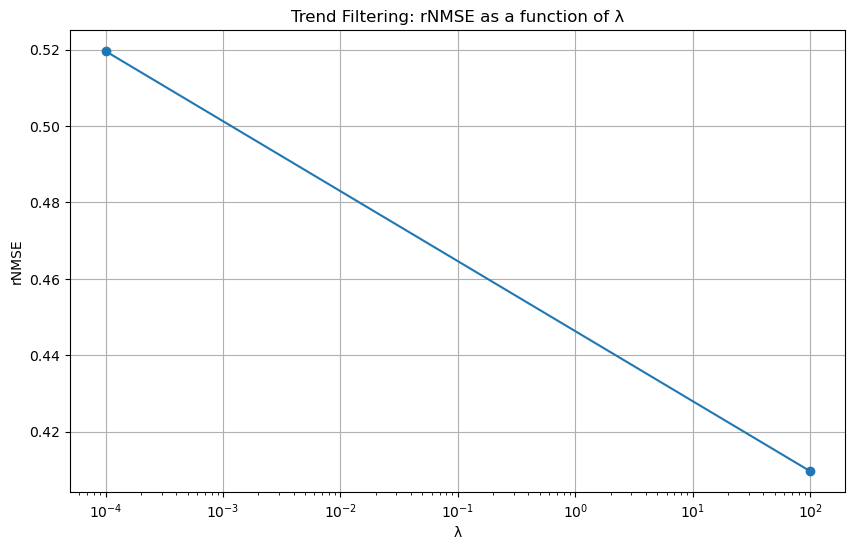

In [13]:
# Plot rNMSE against lambda values
plt.figure(figsize=(10, 6))
plt.semilogx(lambda_range, rnmse_trend_e2, marker='o')
plt.xlabel('λ')
plt.ylabel('rNMSE')
plt.title('Trend Filtering: rNMSE as a function of λ')
plt.grid(True)
plt.show()

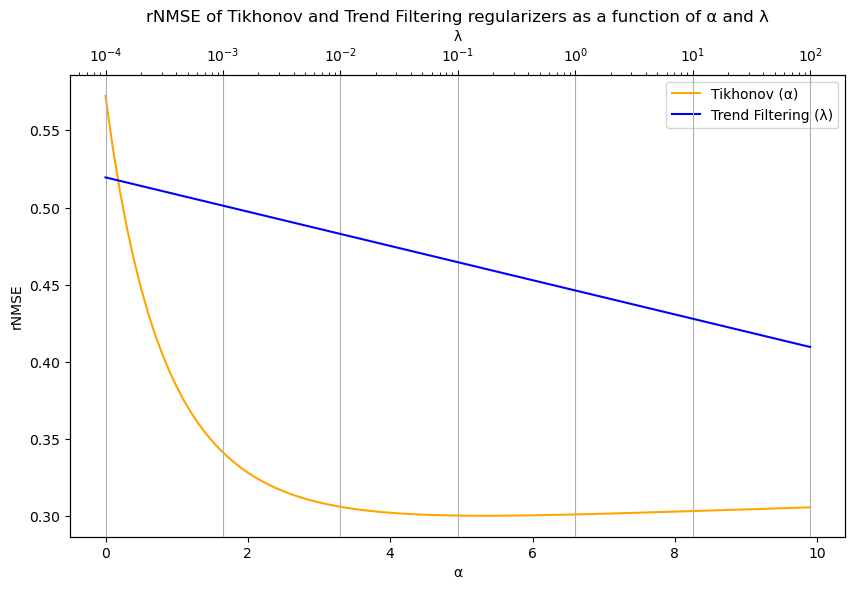

In [21]:
fig, ax1 = plt.subplots(figsize=(10,6))

# Plot Tikhonov regularizer rNMSE as a function of alpha
line1 = ax1.plot(alphas_tikhonov_e2, rnmses_tikhonov_e2_normalized, label='Tikhonov (α)', color='orange')
ax1.set_xlabel("α")
ax1.set_ylabel("rNMSE")
ax1.tick_params(axis='x')

# Plot Trend Filtering regularizer  rNMSE as a function of lambda
ax2 = ax1.twiny() 
line2 = ax2.semilogx(lambda_range, rnmse_trend_e2, label='Trend Filtering (λ)', color='b')
ax2.set_xlabel("λ")
ax2.tick_params(axis='x')

# Combined legend
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc=0)

plt.title('rNMSE of Tikhonov and Trend Filtering regularizers as a function of α and λ')
plt.grid(True)
plt.show()


### Question 4

Why and when does one regularizer performs better than the other?

**Answer**:
<font color = 'red'>
Because the optimization process was very time-consuming on my machine, and many times it did not converge, instead raising a solver error, I was limited to computing only two lambda values for Trend Filtering. I understand that the relationship between lambda and rNMSE isn't linear and as such I can not make a meaningful analysis of the previous graph. If the rNMSE values for Trend Filtering for all $10^{-4} < λ < 10^{2}$ were to stay around the trend indicated by the blue line, then we could conclude that Tikhonov regularization is better for the problem at hand based on the lower rNMSE attained.



## Missing measurements

Consider now that the signal is noiseless but it is observed only in a portion of the nodes: $\textbf{y} = \textbf{P} \textbf{x}$, where $\textbf{P} \in \mathbb{R}^{M \times N}$ is the sampling matrix collecting $M$ out of the possible $N$ samples. 

### Task 4

Taking the best regularization weights from the above exercise, show the rNMSE of the recovered signal for both regularizers and $M = \{3,9,15,21,27\}$.

In [22]:
## add your code here
## Generate the data with missing values (or only indices).

M_values = [3,9,15,21,27] 

# Observed graph signals for each M value
observed_signals = {}

for M in M_values:
    
    selected_nodes = np.random.choice(num_nodes, M, replace=False)

    # Sampling matrix P
    P = np.zeros((M, num_nodes))
    for i in range(M):
        P[i, selected_nodes[i]] = 1
    
    # Observed graph signal
    observed_signals[M] = np.dot(P, x)

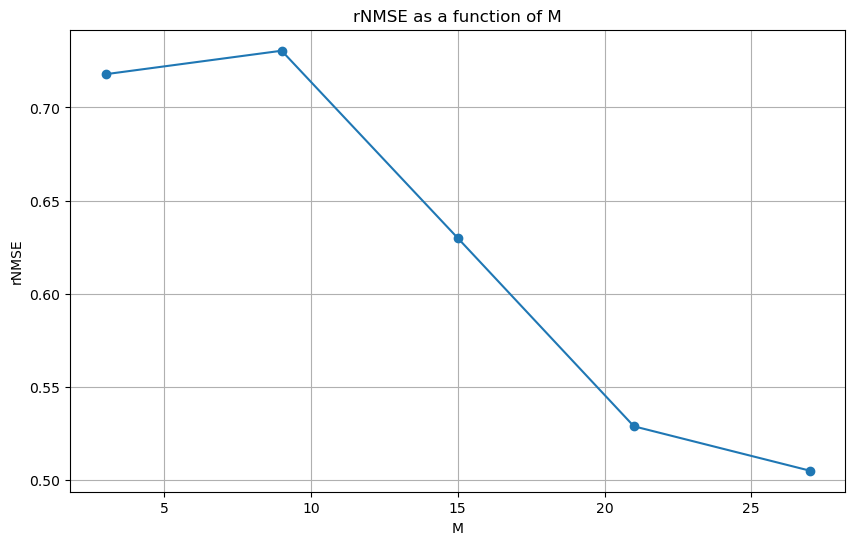

In [37]:
## Add your code here
## solve and evaluate for Tikhonov regularizer

rnmses_tikhonov_M = []

alpha = 0.0001

for M in M_values:
    y = observed_signals[M]
    
    # Rows and columns of L corresponding to the observed nodes
    observed_nodes = np.where(np.any(y != 0, axis=1))[0] 
    # Laplacian matrix of the observed nodes 
    L_observed = L[observed_nodes, :][:, observed_nodes] 
    
    # Closed form solution for Tikhonov regularizer
    x_hat = np.matmul(np.linalg.inv(np.eye(L_observed.shape[0], L_observed.shape[1]) + alpha*L_observed),y)
    
    # rNMSE definition
    rnmse = np.sqrt(np.square(x_hat-x[observed_nodes]).mean())/y.std()
    rnmses_tikhonov_M.append(rnmse)

# Plot the rNMSE as function of M
plt.figure(figsize=(10,6))
plt.plot(M_values, rnmses_tikhonov_M, marker='o')
plt.xlabel("M")
plt.ylabel("rNMSE")
plt.title('Tikhonov regularizer: rNMSE as a function of M')
plt.grid(True)
plt.show()


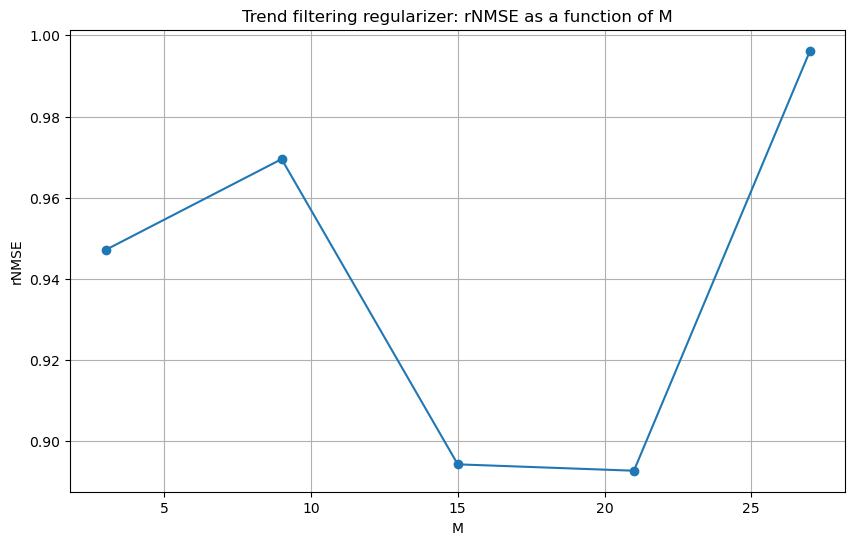

In [56]:
## Add your code here
## solve and evaluate for the regularizer of your choice

# Using Trend Filtering

rnmses_trend_M = []

lambda_ = 0.5

for M in M_values:
    y = observed_signals[M]

    # Rows and columns of L corresponding to the observed nodes
    observed_nodes = np.where(np.any(y != 0, axis=1))[0]
    # Laplacian matrix of the observed nodes
    L_observed = L[observed_nodes, :][:, observed_nodes]

    # Define variables
    x_hat = cp.Variable((len(observed_nodes), 1))

    # Objective function
    objective = cp.Minimize(cp.sum_squares(y[observed_nodes] - x_hat) / (2*sigma**2) + lambda_ * cp.norm(L_observed @ x_hat, 1))

    # Solve
    prob = cp.Problem(objective)
    prob.solve()



    # rNMSE definition
    rnmse = np.sqrt(np.square(x_hat.value-x[observed_nodes]).mean())/y[observed_nodes].std()
    rnmses_trend_M.append(rnmse)

# Plot the rNMSE as function of M
plt.figure(figsize=(10,6))
plt.plot(M_values, rnmses_trend_M, marker='o')
plt.xlabel("M")
plt.ylabel("rNMSE")
plt.title('Trend filtering regularizer: rNMSE as a function of M')
plt.grid(True)
plt.show()



### Question 5
 What would you conclude about the behaviour of the two regularizers?

**Answer**:


<font color = 'red'>
The first graph displays the rNMSE values achieved by applying the Tikhonov regularizer, plotted as a function of the number of nodes observed, $M = {3,9,15,21,27}$. As could be expected, the performance improves as the number of observed nodes increases.<br/><br/>
<font color = 'red'>
On the other hand, the Trend Filtering results do not demonstrate a clear trend across the varying number of nodes. The rNMSE  stays at a high level, between 0.9 and 1, regardless of the number of nodes observed. There is probably an issue in the implementation of Trend Filtering. For a correct implementation, I would expect an improvement in performance with an increase in the number of observed nodes. 

# Lab 1.2: Node Embedding, Node Classification, and Link Prediction

**Objectives:** 
- Implement different traditional and embedding-based graph representation learning methods
- Compare and analyse the performances of the methods for embedding learning, node classification and link prediction tasks. 

**Completion requirements:**

By the end of this notebook, you should have:
- Implemented all code cells for:
  - the representation learning methods. 
  - training the methods.
  - assesing the performance of the methods.
- Answered the analysis questions on each section. 

## Libraries

<!-- 
# If you have not installed pytorch geometric uncomment the following lines to install it

# !pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# !pip install wntr -->

To run this notebook you need to have installed the following packages:

- TDC
- Numpy
- Pytorch
- NetworkX
- Matplotlib
- Scikit-learn
- Pytorch geometric  

Run the following code to import the packages

In [34]:
# import the libraries
import sys
import torch
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# import the functions
from numpy import dot
from numpy.linalg import norm
import torch.nn as nn
from torch.optim import Adam
import torch_cluster
import torch_sparse
import torch.nn.functional as F
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve
from torch_geometric.utils import mask as Mask
from torch_geometric.utils import to_networkx
from torch_geometric.utils import to_dense_adj, degree
from torch_geometric.nn.models import Node2Vec
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split

# import the datasets
from tdc.multi_pred import PPI
from torch_geometric.datasets import Planetoid

---

## Lab 1.2.1: Generate and visualize the node embeddings

### Decription of the dataset:    
The Cora dataset consists of 2708 scientific publications classified into one of seven classes. The citation network consists of 5429 links. Each publication in the dataset is described by a 0/1-valued word vector indicating the absence/presence of the corresponding word from the dictionary. The dictionary consists of 1433 unique words. More infos about Cora dataset can be found here: https://paperswithcode.com/dataset/cora.

Run the following code to load the cora dataset:

In [35]:
cora_dataset = Planetoid(root="", name="Cora", split="public")
data = cora_dataset[0]

Run the following code to check the characteristics of the dataset:

In [36]:
# number of nodes, dimensions of features, number of edges
print(data.x.shape[0])
print(data.x.shape[1])
print(data.edge_index.shape[1])

2708
1433
10556


### 🕵 <font color='289C4E'>Question<font><a class='anchor' id='top'></a>

  **(a) Generate hand crafted features** by concatenating the
  
      - 1. Degree centrality 
      - 2. clustering coefficient 
      - 3. betweenness centrality 
      
     as feature vector for each node and visulaize it using TSNE.

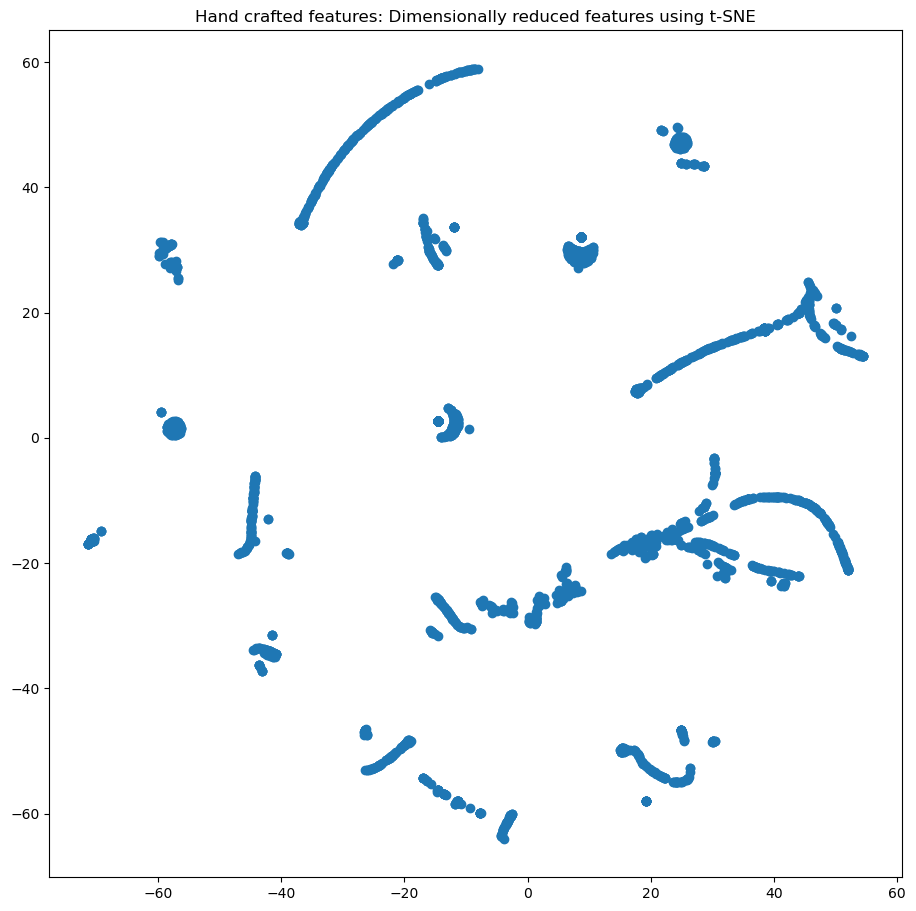

In [83]:
# The package networkx has the corresponding function

######################################################################### 
# write code here to convert the pytorch graph to networkx graph
graph=to_networkx(data, to_undirected=True)

# call the corresponding functions to calculate the hand crafted features
degree_centrality = nx.degree_centrality(graph)
clustering_coeff = nx.clustering(graph)
betweenness_centrality = nx.betweenness_centrality(graph)

# Concatanate the features to be a feature vector

######################################################################### 
# Initialize an empty dictionary to hold the feature vectors
feature_vectors = {}

# For each node, concatenate the metrics into a feature vector
for node in graph.nodes():
    feature_vectors[node] = np.array([
        degree_centrality[node], 
        clustering_coeff[node], 
        betweenness_centrality[node]
    ])
    
feature_matrix = np.array([feature_vectors[node] for node in graph.nodes()])
######################################################################### 
#visualize features

# Apply t-SNE 
embedded_features = TSNE(n_components=2, random_state=42).fit_transform(feature_matrix)

# Plot the embedded features
plt.figure(figsize=(11, 11))
plt.scatter(embedded_features[:, 0], embedded_features[:, 1])
plt.title('Hand crafted features: Dimensionally reduced features using t-SNE')
plt.show()

######################################################################### 

### 🕵 <font color='289C4E'>Question<font><a class='anchor' id='top'></a>

**(b) Generate features vectors from Node2Vec using the following parameters. The output features should have three dimensions. Visulaize it using TSNE.**


    The size of each embedding vector.
    - embedding_dim=3
    
    The walk length
    - walk_length=20
    
    The actual context size which is considered for positive samples. 
    This parameter increases the effective sampling rate by reusing samples across different source nodes.
    - context_size=10
    
    The number of walks to sample for each node
    - walks_per_node=10
    
    The number of negative samples to use for each positive sample
    - num_negative_samples=1
    
    Likelihood of immediately revisiting a node in the walk
    - p=1
    
    Control parameter to interpolate between breadth-first strategy and depth-first strategy
    - q=1
    
    If set to :obj:`True`, gradients w.r.t. to the weight matrix will be sparse
    - sparse=False 
    
    batch size
    - batch_size=128
    
    shuffle the input data
    - shuffle=True
    
    number of epochs in training
    - train epochs=200
    
    learning rate in training
    - learning rate=0.01

In [69]:
# The Node2Vec model is imported above from torch_geometric.nn.models

######################################################################### 
# Define your Node2Vec model here
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = Node2Vec(
    data.edge_index,
    embedding_dim=3,
    walk_length=20,
    context_size=10,
    walks_per_node=10,
    num_negative_samples=1,
    p=1,
    q=1,
    sparse=True,
).to(device)

# Define a loader here
loader = model.loader(batch_size=128, shuffle=True, num_workers=0)

# define an optimizer here
optimizer = torch.optim.SparseAdam(list(model.parameters()), lr=0.01)
######################################################################### 

######################################################################### 
#define the training function for the Node2Vec model here
def train():
    model.train()
    total_loss = 0
    for pos_rw, neg_rw in loader:
        optimizer.zero_grad()
        loss = model.loss(pos_rw.to(device), neg_rw.to(device))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)
#########################################################################  

######################################################################### 
#define the test function for the Node2Vec model here
@torch.no_grad()
def test():
    model.eval()
    z = model()
    acc = model.test(z[data.train_mask], data.y[data.train_mask],
                     z[data.test_mask], data.y[data.test_mask],
                     max_iter=150)
    return acc
#########################################################################

In [70]:
######################################################################### 
# train your Node2Vec model
for epoch in range(200):
    loss = train()
    acc = test()
    if epoch % 10 == 0:
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Acc: {acc:.4f}')
#########################################################################

Epoch: 000, Loss: 1.7439, Acc: 0.1470
Epoch: 010, Loss: 1.1269, Acc: 0.3070
Epoch: 020, Loss: 1.0217, Acc: 0.4080
Epoch: 030, Loss: 1.0001, Acc: 0.4990
Epoch: 040, Loss: 0.9904, Acc: 0.5180
Epoch: 050, Loss: 0.9874, Acc: 0.5400
Epoch: 060, Loss: 0.9856, Acc: 0.5630
Epoch: 070, Loss: 0.9827, Acc: 0.5680
Epoch: 080, Loss: 0.9819, Acc: 0.5740
Epoch: 090, Loss: 0.9826, Acc: 0.5770
Epoch: 100, Loss: 0.9832, Acc: 0.5900
Epoch: 110, Loss: 0.9810, Acc: 0.5990
Epoch: 120, Loss: 0.9800, Acc: 0.6040
Epoch: 130, Loss: 0.9805, Acc: 0.6010
Epoch: 140, Loss: 0.9798, Acc: 0.6090
Epoch: 150, Loss: 0.9795, Acc: 0.6140
Epoch: 160, Loss: 0.9804, Acc: 0.6110
Epoch: 170, Loss: 0.9801, Acc: 0.6220
Epoch: 180, Loss: 0.9799, Acc: 0.6170
Epoch: 190, Loss: 0.9795, Acc: 0.6200


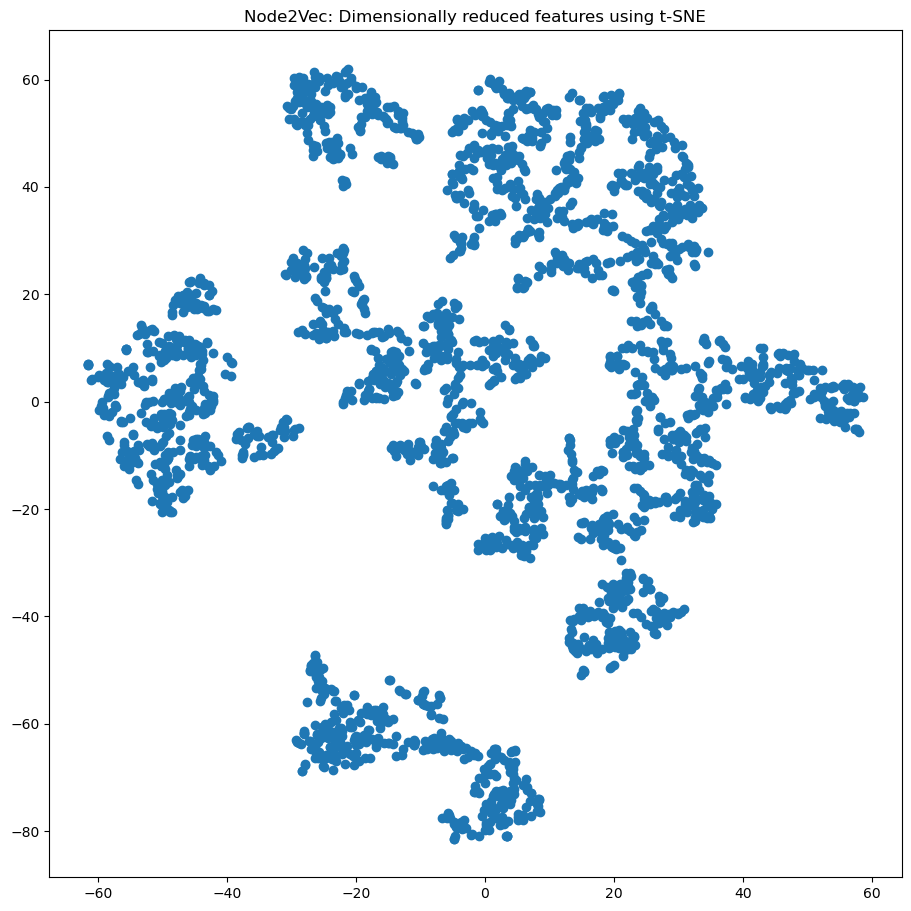

In [82]:
######################################################################### 
# produce embedding using the trained model
model.eval()
embeddings = model()
# Apply t-SNE
embeddings_tnse = TSNE(n_components=2, random_state=42).fit_transform(embeddings.cpu().detach().numpy())

# visualize the features here
plt.figure(figsize=(11, 11))
plt.scatter(embeddings_tnse[:, 0], embeddings_tnse[:, 1])
plt.title('Node2Vec: Dimensionally reduced features using t-SNE')
plt.show()
######################################################################### 

### 🕵 <font color='289C4E'>Question<font><a class='anchor' id='top'></a>

**(c)Compare the features generated from above. From the visualization, which feature vector is more informative? And give the reasons in the following cell:**

**Answer here:** 

<font color = 'red'>
I believe the features generated using Node2Vec are more informative than the hand crafted features. In the visualization obtained using t-SNE, Node2Vec provides better clusters, well differentiated between them. Moreover, Node2Vec  provides a clearer view of the data, since there is significantly less overlaping between the points compared to the hand crafted features. The points in Node2Vec also have a more consistent distance between them. In general the plot from Node2Vec is easier to interpret, demonstrating that the learned embeddings accurately capture the data structure.

---

## Lab 1.2.2: Node Classification

### ⛔ Problem definition 

Node Classification is a machine learning task in graph-based data analysis, where the goal is to assign labels to nodes in a graph based on the properties of nodes and the relationships between them.

Node Classification models aim to predict non-existing node properties (known as the target property) based on other node properties. Model performance can be measured using benchmark datasets like Cora, Citeseer, and Pubmed, among others, typically using Accuracy and F1. In this exercise, we use accuracy.

The dataset needs to be split for the node classification task, and the performance of the model is measured by its accuracy on the test set. Cora has the built in split. We will use its default split in this exercise.

### 🕵 <font color='289C4E'>Question<font><a class='anchor' id='top'></a>

(a)Use the hand-crafted features as input, perform node classification using a 2-layer Multi-Layer Perceptron(MLP). 

The hyperparameters for the MLP should be as follows: 

    - the input dimensions are same as the dimensions of input features
    - hidden unit dimension is set to be 16
    - output dimensions should be the number of classes to predict
    - use relu as activate function 
    - train the MLP for 200 epochs

Which loss would you use for training the MLP? Answer in the following cell:

**Answer here:** 

In the following cell, define a two layer MLP using the parameters given above:

In [39]:
######################################################################### 
# define a two layer MLP
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x
#########################################################################   

In the following cell, train your MLP for 200 epochs and print the training loss, accuracy on the test set for each epoch:

In [88]:
######################################################################### 
# instantiate your MLP model here
feature_tensor = torch.from_numpy(feature_matrix).float()
model = MLP(feature_tensor.shape[1], 16, cora_dataset.num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
######################################################################### 


######################################################################### 
# define a training function
def train():
    model.train()
    optimizer.zero_grad()
    out = model(feature_tensor)
    criterion = nn.CrossEntropyLoss()
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()
######################################################################### 

######################################################################### 
# define a test function
def test():
    model.eval()
    out = model(feature_tensor)
    pred = out.argmax(dim=1)
    correct = pred[data.test_mask].eq(data.y[data.test_mask]).sum().item()
    acc = correct / data.test_mask.sum().item()
    return acc
######################################################################### 

######################################################################### 
#train your model here and print the accuracy
test_acc_list = []

for epoch in range(200):
    loss = train()
    acc = test()
    test_acc_list.append(acc)
    print(f'Epoch: {epoch+1}, Loss: {loss}, Accuracy: {acc}')
######################################################################### 

Epoch: 1, Loss: 1.9616273641586304, Accuracy: 0.091
Epoch: 2, Loss: 1.9563848972320557, Accuracy: 0.091
Epoch: 3, Loss: 1.9518201351165771, Accuracy: 0.091
Epoch: 4, Loss: 1.9479514360427856, Accuracy: 0.097
Epoch: 5, Loss: 1.944679856300354, Accuracy: 0.1
Epoch: 6, Loss: 1.9419779777526855, Accuracy: 0.105
Epoch: 7, Loss: 1.9397530555725098, Accuracy: 0.105
Epoch: 8, Loss: 1.937892198562622, Accuracy: 0.273
Epoch: 9, Loss: 1.9362684488296509, Accuracy: 0.261
Epoch: 10, Loss: 1.934849739074707, Accuracy: 0.145
Epoch: 11, Loss: 1.9336074590682983, Accuracy: 0.151
Epoch: 12, Loss: 1.9324700832366943, Accuracy: 0.151
Epoch: 13, Loss: 1.931423544883728, Accuracy: 0.154
Epoch: 14, Loss: 1.9304125308990479, Accuracy: 0.154
Epoch: 15, Loss: 1.9294394254684448, Accuracy: 0.152
Epoch: 16, Loss: 1.9285005331039429, Accuracy: 0.143
Epoch: 17, Loss: 1.9275556802749634, Accuracy: 0.129
Epoch: 18, Loss: 1.9265841245651245, Accuracy: 0.128
Epoch: 19, Loss: 1.9255902767181396, Accuracy: 0.128
Epoch: 2

In the following cell, visualize the accuracy on the test set in each epoch:

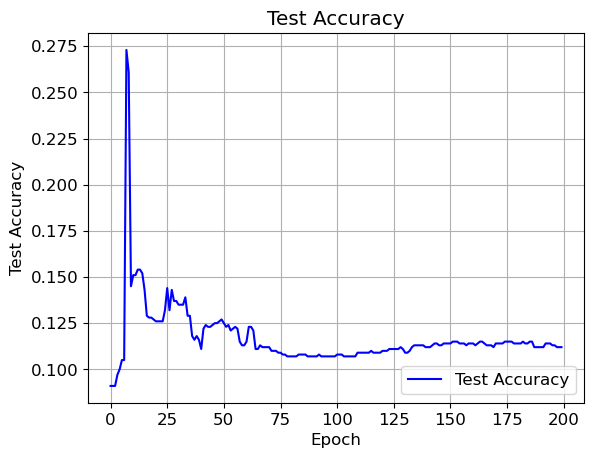

In [89]:
######################################################################### 
# visualize the accuracy on the test set as a function to the epochs

# Set the font size for the plot labels and title
plt.rcParams.update({'font.size': 12})

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the training loss as a blue line
ax.plot(test_acc_list, 'b-', label="Test Accuracy")

# Add a legend to the plot
ax.legend(loc='lower right')

# Set the plot labels and title
ax.set_xlabel('Epoch')
ax.set_ylabel('Test Accuracy')
ax.set_title('Test Accuracy')

# Add grid lines to the plot
ax.grid(True, which='both')

# Display the plot
plt.show()

### 🕵 <font color='289C4E'>Question<font><a class='anchor' id='top'></a>

(b)Repeat the node classification task using features generated from Node2Vec above

In [94]:
######################################################################### 
# instantiate another MLP with the same parameters
# MLP node using node2vec emb
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
node2vec_model = MLP(3, 16, cora_dataset.num_classes).to(device)
optimizer = torch.optim.Adam(node2vec_model.parameters(), lr=0.01)
######################################################################### 

######################################################################### 
#get the features generated from the Node2Vec trained above
features = torch.tensor(embeddings, dtype=torch.float32).to(device)
# move everything to device to avoid errors
data.y = data.y.to(device)
data.train_mask = data.train_mask.to(device)
data.test_mask = data.test_mask.to(device)
######################################################################### 

######################################################################### 
#train function for MLP
def node2vec_train():
    node2vec_model.train()
    optimizer.zero_grad()
    out = node2vec_model(features)
    criterion = nn.CrossEntropyLoss()
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()
######################################################################### 

######################################################################### 
# test function for your MLP
def node2vec_test():
    node2vec_model.eval()
    out = node2vec_model(features)
    pred = out.argmax(dim=1)
    correct = pred[data.test_mask].eq(data.y[data.test_mask]).sum().item()
    acc = correct / data.test_mask.sum().item()
    return acc
######################################################################### 

In [95]:
######################################################################### 
# train your model here:
test_acc_list = []

for epoch in range(200):
    loss = node2vec_train()
    acc = node2vec_test()
    test_acc_list.append(acc)
    if epoch % 10 == 0:
        print(f'Epoch: {epoch+1}, Loss: {loss}, Accuracy: {acc}')
######################################################################### 

Epoch: 1, Loss: 2.0011584758758545, Accuracy: 0.104
Epoch: 11, Loss: 1.7428674697875977, Accuracy: 0.41
Epoch: 21, Loss: 1.472490668296814, Accuracy: 0.564
Epoch: 31, Loss: 1.2083499431610107, Accuracy: 0.605
Epoch: 41, Loss: 1.0463660955429077, Accuracy: 0.616
Epoch: 51, Loss: 0.9478404521942139, Accuracy: 0.63
Epoch: 61, Loss: 0.8898941278457642, Accuracy: 0.62
Epoch: 71, Loss: 0.8546493649482727, Accuracy: 0.616
Epoch: 81, Loss: 0.8325707912445068, Accuracy: 0.613
Epoch: 91, Loss: 0.8151081204414368, Accuracy: 0.61
Epoch: 101, Loss: 0.8006701469421387, Accuracy: 0.611
Epoch: 111, Loss: 0.7872850894927979, Accuracy: 0.61
Epoch: 121, Loss: 0.7745030522346497, Accuracy: 0.613
Epoch: 131, Loss: 0.7616478800773621, Accuracy: 0.613
Epoch: 141, Loss: 0.7492466568946838, Accuracy: 0.614
Epoch: 151, Loss: 0.7367340922355652, Accuracy: 0.613
Epoch: 161, Loss: 0.724148154258728, Accuracy: 0.615
Epoch: 171, Loss: 0.7116259932518005, Accuracy: 0.612
Epoch: 181, Loss: 0.6990081071853638, Accuracy

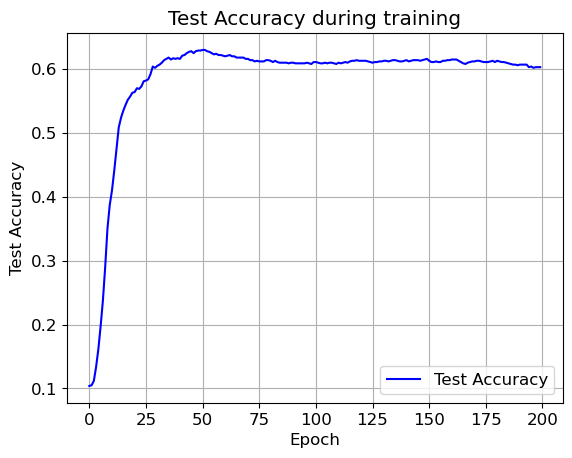

In [96]:
######################################################################### 
# visualize the accuracy on the test set as a function to the epochs

# Set the font size for the plot labels and title
plt.rcParams.update({'font.size': 12})

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the training loss as a blue line
ax.plot(test_acc_list, 'b-', label='Test Accuracy')

# Add a legend to the plot
ax.legend(loc='lower right')

# Set the plot labels and title
ax.set_xlabel('Epoch')
ax.set_ylabel('Test Accuracy')
ax.set_title('Test Accuracy during training')

# Add grid lines to the plot
ax.grid(True, which='both')

# Display the plot
plt.show()
######################################################################### 

### 🕵 <font color='289C4E'>Question<font><a class='anchor' id='top'></a>

(c)Repeat the node classification task using original features from Cora dataset

In [44]:
######################################################################### 
# instantiate another MLP with the same parameters
# MLP node using cora features
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
cora_model = MLP(data.x.shape[1], 16, cora_dataset.num_classes).to(device)
optimizer = torch.optim.Adam(cora_model.parameters(), lr=0.01)
data = data.to(device)
features = data.x
######################################################################### 

######################################################################### 
#define a train function for your model
def train():
    cora_model.train()
    optimizer.zero_grad()
    out = cora_model(features)
    criterion = nn.CrossEntropyLoss()
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()
######################################################################### 

######################################################################### 
#define a test function to your model
def test():
    cora_model.eval()
    out = cora_model(features)
    pred = out.argmax(dim=1)
    correct = pred[data.test_mask].eq(data.y[data.test_mask]).sum().item()
    acc = correct / data.test_mask.sum().item()
    return acc
######################################################################### 

In [100]:
######################################################################### 
# train your model
test_acc_list = []
for epoch in range(200):
    loss = train()
    acc = test()
    test_acc_list.append(acc)
    if epoch % 10 == 0:
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Acc: {acc:.4f}')
######################################################################### 

Epoch: 000, Loss: 1.9533, Acc: 0.2340
Epoch: 010, Loss: 0.6792, Acc: 0.4720
Epoch: 020, Loss: 0.0973, Acc: 0.5420
Epoch: 030, Loss: 0.0246, Acc: 0.5360
Epoch: 040, Loss: 0.0093, Acc: 0.5260
Epoch: 050, Loss: 0.0051, Acc: 0.5180
Epoch: 060, Loss: 0.0035, Acc: 0.5140
Epoch: 070, Loss: 0.0027, Acc: 0.5160
Epoch: 080, Loss: 0.0022, Acc: 0.5140
Epoch: 090, Loss: 0.0019, Acc: 0.5160
Epoch: 100, Loss: 0.0017, Acc: 0.5210
Epoch: 110, Loss: 0.0015, Acc: 0.5240
Epoch: 120, Loss: 0.0013, Acc: 0.5280
Epoch: 130, Loss: 0.0012, Acc: 0.5290
Epoch: 140, Loss: 0.0011, Acc: 0.5260
Epoch: 150, Loss: 0.0010, Acc: 0.5260
Epoch: 160, Loss: 0.0009, Acc: 0.5230
Epoch: 170, Loss: 0.0008, Acc: 0.5220
Epoch: 180, Loss: 0.0008, Acc: 0.5220
Epoch: 190, Loss: 0.0007, Acc: 0.5200


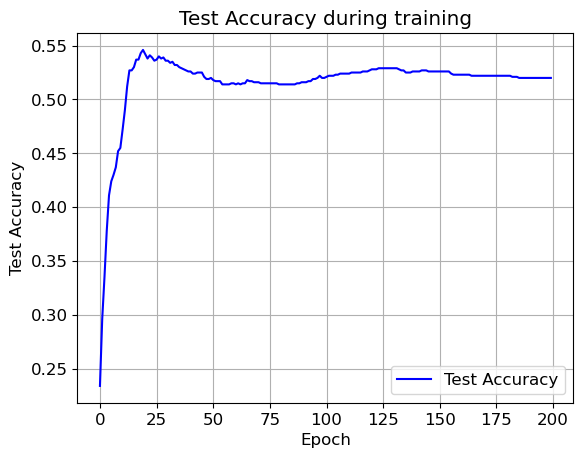

In [101]:
######################################################################### 
# visualize the accuracy on the test set as a function to the epochs

# Set the font size for the plot labels and title
plt.rcParams.update({'font.size': 12})

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the training loss as a blue line
ax.plot(test_acc_list, 'b-', label='Test Accuracy')

# Add a legend to the plot
ax.legend(loc='lower right')

# Set the plot labels and title
ax.set_xlabel('Epoch')
ax.set_ylabel('Test Accuracy')
ax.set_title('Test Accuracy during training')

# Add grid lines to the plot
ax.grid(True, which='both')

# Display the plot
plt.show()
######################################################################### 

### 🕵 <font color='289C4E'>Question<font><a class='anchor' id='top'></a>

(d)Run label propagation algorithm on Cora for 10 iterations. Specifically use the row normailized adjancency matrix as the transition matrix. You can pad the label vectors for the test nodes using zero padding as initialization.

In [58]:
######################################################################### 
# one-hot encode the true label for training data
labels = data.y
labels_np = labels.cpu().numpy()
one_hot_labels = np.eye(cora_dataset.num_classes)[labels_np]
one_hot_labels = torch.from_numpy(one_hot_labels).to(device)
######################################################################### 

######################################################################### 
# mask the val and test labels
mask = data.train_mask
masked_labels = one_hot_labels.clone()
masked_labels[~mask] = 0
#########################################################################

######################################################################### 
# transition matrix as adj matrix
num_nodes = data.num_nodes
self_loops = torch.tensor([range(num_nodes), range(num_nodes)], dtype=torch.long).to(device)
edge_index_with_self_loops = torch.cat([data.edge_index, self_loops], dim=1)
adj_matrix = to_dense_adj(edge_index_with_self_loops).squeeze(0)

# row normalization
deg = degree(edge_index_with_self_loops[0], num_nodes, dtype=adj_matrix.dtype)
transition_matrix = adj_matrix / deg.view(-1, 1)
######################################################################### 

######################################################################### 
# write code here to run the label propagation algorithm for 10 epochs
transition_matrix = transition_matrix.float()
masked_labels = masked_labels.float()

num_epochs = 10
for epoch in range(num_epochs):
    propagated_labels = torch.matmul(transition_matrix, masked_labels)
    masked_labels[mask] = propagated_labels[mask]
    _, predicted_labels = torch.max(masked_labels, dim=1)
    
    accuracy = (predicted_labels[mask] == labels[mask]).sum().item() / float(mask.sum().item())
    print(f"Epoch {epoch+1}, Accuracy: {accuracy}")
######################################################################### 

Epoch 1, Accuracy: 0.9642857142857143
Epoch 2, Accuracy: 0.9785714285714285
Epoch 3, Accuracy: 0.9785714285714285
Epoch 4, Accuracy: 0.9785714285714285
Epoch 5, Accuracy: 0.9785714285714285
Epoch 6, Accuracy: 0.9785714285714285
Epoch 7, Accuracy: 0.9785714285714285
Epoch 8, Accuracy: 0.9785714285714285
Epoch 9, Accuracy: 0.9785714285714285
Epoch 10, Accuracy: 0.9785714285714285


### 🕵 <font color='289C4E'>Question<font><a class='anchor' id='top'></a>

(e)(1)Which method perform the best? Give the answer in the following cell:

Answer:

<font color = 'red'>
Training the node classification MLP using the hand-crafted features as input results in a very poor performance, achieving a low test accuracy. The accuracy improves for the first few epochs, achieving a maximum of almost 0.275 but it quickly worsens with increasing epochs, probably because it overfits to due to the low amount of information encoded by the degree centrality, clustering coefficient and betweenness centrality. For the other two methods the performace is similar, improving at first but then plateauing after 15-25 iterations. Node2Vec does perform better than the original Cora features, achieving higher accuracies throughout the training process.

(e)(2)What do you conclude about the informativeness of the extracted node feature? Give the answer in the following cell:

Answer:

<font color = 'red'>
Training the model using Node2Vec features resulted in a higher accuracy compared to the other two methods, leadinf to the conclusion that Node2Vec provides more informative features for node classification. The visualization using t-SNE shown before supports this result, as the nodes and clusters were more clearly distinguised. The other features, either the original cora features or the hand crafted ones, do not capture all the necessary aspects of the graph structure needed for accurate node classification. Especially in the case of the hand crafted features, the model quickly overfits, indicating that they do not represent the complexity of the data. The Cora features, while better than the hand-crafted ones, still perform worse than using Node2Vec.

(e)(3)Is there any particular method or embedding quality you would like to comment? Give the answer in the following cell

Answer: 

<font color = 'red'>
I was surprised to see how big of a difference the choice of features can make even for the small dataset. 

### 🕵 <font color='289C4E'>Question<font><a class='anchor' id='top'></a>

(f)Increase the training set to 80% using one random division and run the above experiments again using hand-crafted features, Node2Vec generated features, original cora features, and label propagation algorithm. Run the code in the following cell to generate a random split.

In [37]:
num_nodes = data.x.shape[0]
node_ids = [i for i in range(num_nodes)]

# split the nodes into train-val-test: 80-10-10
ids_train, ids_val_test = train_test_split(node_ids, test_size=0.2, random_state=42)
ids_val, ids_test = train_test_split(ids_val_test, test_size=0.5, random_state=41)
train_mask = Mask.index_to_mask(torch.Tensor(ids_train).long(), size=num_nodes)
val_mask = Mask.index_to_mask(torch.Tensor(ids_val).long(), size=num_nodes)
test_mask = Mask.index_to_mask(torch.Tensor(ids_test).long(), size=num_nodes)

In [108]:
######################################################################### 
# add your code here to run the experiment using hand-crafted features

# Instantiate the MLP model
model = MLP(features.shape[1], 16, cora_dataset.num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Define the training function
def train():
    model.train()
    optimizer.zero_grad()
    out = model(features)
    criterion = nn.CrossEntropyLoss()
    loss = criterion(out[train_mask], data.y[train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Define the test function
def test(mask):
    model.eval()
    out = model(features)
    pred = out.argmax(dim=1)
    correct = pred[mask].eq(data.y[mask]).sum().item()
    acc = correct / mask.sum().item()
    return acc

# Train the model and print accuracy

test_acc_list = []

for epoch in range(200):
    loss = train()
    val_acc = test(val_mask)
    test_acc = test(test_mask)
    test_acc_list.append(test_acc)
    print(f'Epoch: {epoch+1}, Loss: {loss}, Val Accuracy: {val_acc}, Test Accuracy: {test_acc}')

######################################################################### 
######################################################################### 

Epoch: 1, Loss: 1.9993715286254883, Val Accuracy: 0.14022140221402213, Test Accuracy: 0.1992619926199262
Epoch: 2, Loss: 1.9417376518249512, Val Accuracy: 0.30996309963099633, Test Accuracy: 0.3948339483394834
Epoch: 3, Loss: 1.8731118440628052, Val Accuracy: 0.3948339483394834, Test Accuracy: 0.42435424354243545
Epoch: 4, Loss: 1.7957780361175537, Val Accuracy: 0.4354243542435424, Test Accuracy: 0.4797047970479705
Epoch: 5, Loss: 1.7134166955947876, Val Accuracy: 0.4981549815498155, Test Accuracy: 0.4907749077490775
Epoch: 6, Loss: 1.6285914182662964, Val Accuracy: 0.5276752767527675, Test Accuracy: 0.5313653136531366
Epoch: 7, Loss: 1.5410643815994263, Val Accuracy: 0.5424354243542435, Test Accuracy: 0.5461254612546126
Epoch: 8, Loss: 1.4525326490402222, Val Accuracy: 0.5793357933579336, Test Accuracy: 0.5461254612546126
Epoch: 9, Loss: 1.3653217554092407, Val Accuracy: 0.6051660516605166, Test Accuracy: 0.5645756457564576
Epoch: 10, Loss: 1.2791385650634766, Val Accuracy: 0.61254612

Epoch: 108, Loss: 0.008413205854594707, Val Accuracy: 0.7453874538745388, Test Accuracy: 0.7453874538745388
Epoch: 109, Loss: 0.008266910910606384, Val Accuracy: 0.7453874538745388, Test Accuracy: 0.7453874538745388
Epoch: 110, Loss: 0.008124629966914654, Val Accuracy: 0.7527675276752768, Test Accuracy: 0.7453874538745388
Epoch: 111, Loss: 0.007986203767359257, Val Accuracy: 0.7527675276752768, Test Accuracy: 0.7453874538745388
Epoch: 112, Loss: 0.007851551286876202, Val Accuracy: 0.7527675276752768, Test Accuracy: 0.7453874538745388
Epoch: 113, Loss: 0.007720628287643194, Val Accuracy: 0.7527675276752768, Test Accuracy: 0.7416974169741697
Epoch: 114, Loss: 0.007593041285872459, Val Accuracy: 0.7527675276752768, Test Accuracy: 0.7416974169741697
Epoch: 115, Loss: 0.007468802854418755, Val Accuracy: 0.7527675276752768, Test Accuracy: 0.7416974169741697
Epoch: 116, Loss: 0.007347890175879002, Val Accuracy: 0.7527675276752768, Test Accuracy: 0.7380073800738007
Epoch: 117, Loss: 0.00723033

Epoch: 199, Loss: 0.0027141100727021694, Val Accuracy: 0.7343173431734318, Test Accuracy: 0.7269372693726938
Epoch: 200, Loss: 0.0026893445756286383, Val Accuracy: 0.7343173431734318, Test Accuracy: 0.7269372693726938


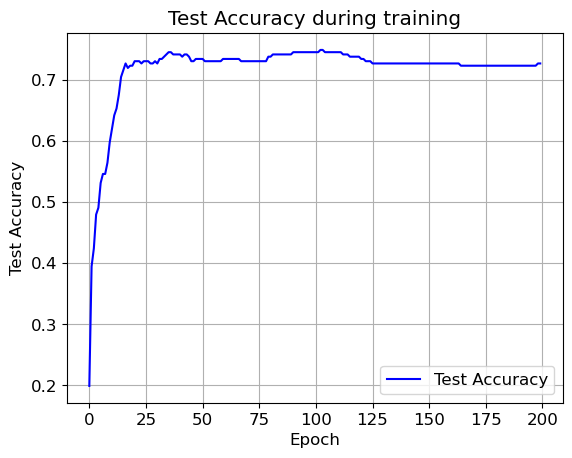

In [109]:
######################################################################### 
# visualize the accuracy on the test set as a function to the epochs

# Set the font size for the plot labels and title
plt.rcParams.update({'font.size': 12})

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the training loss as a blue line
ax.plot(test_acc_list, 'b-', label='Test Accuracy')

# Add a legend to the plot
ax.legend(loc='lower right')

# Set the plot labels and title
ax.set_xlabel('Epoch')
ax.set_ylabel('Test Accuracy')
ax.set_title('Test Accuracy during training')

# Add grid lines to the plot
ax.grid(True, which='both')

# Display the plot
plt.show()
######################################################################### 

In [111]:
######################################################################### 
# add your code here to run the experiment using Node2Vec features
# MLP node using node2vec emb

# Instantiate the MLP model
node2vec_model = MLP(3, 16, cora_dataset.num_classes).to(device)
optimizer = torch.optim.Adam(node2vec_model.parameters(), lr=0.01)

features = torch.tensor(embeddings, dtype=torch.float32).to(device)

# Train function
def node2vec_train():
    node2vec_model.train()
    optimizer.zero_grad()
    out = node2vec_model(features)
    criterion = nn.CrossEntropyLoss()
    loss = criterion(out[train_mask], data.y[train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Test function
def node2vec_test(test_mask):
    node2vec_model.eval()
    out = node2vec_model(features)
    pred = out.argmax(dim=1)
    correct = pred[test_mask].eq(data.y[test_mask]).sum().item()
    acc = correct / test_mask.sum().item()
    return acc

# Training

test_acc_list = []
val_acc_list = []

for epoch in range(200):
    loss = node2vec_train()
    val_acc = node2vec_test(val_mask)
    test_acc = node2vec_test(test_mask)
    test_acc_list.append(test_acc)
    val_acc_list.append(val_acc)
    if epoch % 10 == 0:
        print(f'Epoch: {epoch+1}, Loss: {loss}, Val Accuracy: {val_acc}, Test Accuracy: {test_acc}')

######################################################################### 

Epoch: 1, Loss: 2.055006980895996, Val Accuracy: 0.12177121771217712, Test Accuracy: 0.15498154981549817
Epoch: 11, Loss: 1.6808897256851196, Val Accuracy: 0.5018450184501845, Test Accuracy: 0.47232472324723246
Epoch: 21, Loss: 1.422275185585022, Val Accuracy: 0.5535055350553506, Test Accuracy: 0.5313653136531366
Epoch: 31, Loss: 1.2054871320724487, Val Accuracy: 0.6125461254612546, Test Accuracy: 0.6051660516605166
Epoch: 41, Loss: 1.069435954093933, Val Accuracy: 0.6568265682656826, Test Accuracy: 0.6309963099630996
Epoch: 51, Loss: 0.9978125691413879, Val Accuracy: 0.6642066420664207, Test Accuracy: 0.6715867158671587
Epoch: 61, Loss: 0.9671945571899414, Val Accuracy: 0.6752767527675276, Test Accuracy: 0.6900369003690037
Epoch: 71, Loss: 0.953558623790741, Val Accuracy: 0.6937269372693727, Test Accuracy: 0.7011070110701108
Epoch: 81, Loss: 0.9450112581253052, Val Accuracy: 0.7011070110701108, Test Accuracy: 0.7047970479704797
Epoch: 91, Loss: 0.9375344514846802, Val Accuracy: 0.6937

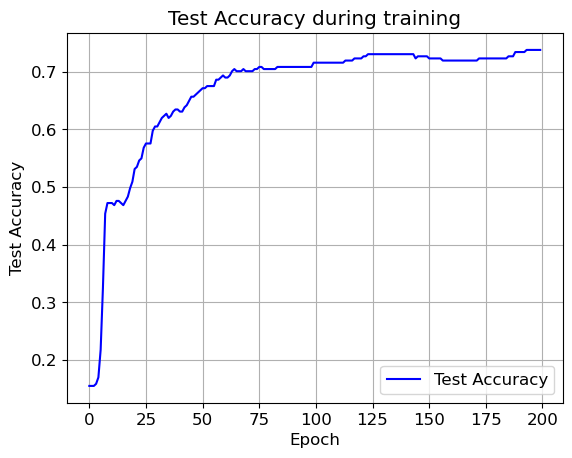

In [112]:
######################################################################### 
# visualize the accuracy on the test set as a function to the epochs

# Set the font size for the plot labels and title
plt.rcParams.update({'font.size': 12})

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the training loss as a blue line
ax.plot(test_acc_list, 'b-', label='Test Accuracy')

# Add a legend to the plot
ax.legend(loc='lower right')

# Set the plot labels and title
ax.set_xlabel('Epoch')
ax.set_ylabel('Test Accuracy')
ax.set_title('Test Accuracy during training')

# Add grid lines to the plot
ax.grid(True, which='both')

# Display the plot
plt.show()
######################################################################### 

In [113]:
######################################################################### 
# add your code here to run the experiment using original cora features

# Instantiate the MLP model
cora_model = MLP(data.x.shape[1], 16, cora_dataset.num_classes).to(device)
optimizer = torch.optim.Adam(cora_model.parameters(), lr=0.01)
data = data.to(device)
features = data.x

# Train function
def train():
    cora_model.train()
    optimizer.zero_grad()
    out = cora_model(features)
    criterion = nn.CrossEntropyLoss()
    loss = criterion(out[train_mask], data.y[train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Test function
def test(mask):
    cora_model.eval()
    out = cora_model(features)
    pred = out.argmax(dim=1)
    correct = pred[mask].eq(data.y[mask]).sum().item()
    acc = correct / mask.sum().item()
    return acc

# Training
test_acc_list = []
for epoch in range(200):
    loss = train()
    acc_val = test(val_mask)
    acc_test = test(test_mask)
    test_acc_list.append(acc_test)
    if epoch % 10 == 0:
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Acc_val: {acc_val:.4f}, Acc_test: {acc_test:.4f}')

######################################################################### 

Epoch: 000, Loss: 1.9418, Acc_val: 0.3727, Acc_test: 0.3948
Epoch: 010, Loss: 1.0834, Acc_val: 0.6642, Acc_test: 0.6125
Epoch: 020, Loss: 0.4662, Acc_val: 0.7380, Acc_test: 0.7232
Epoch: 030, Loss: 0.1843, Acc_val: 0.7491, Acc_test: 0.7232
Epoch: 040, Loss: 0.0816, Acc_val: 0.7417, Acc_test: 0.7306
Epoch: 050, Loss: 0.0449, Acc_val: 0.7306, Acc_test: 0.7232
Epoch: 060, Loss: 0.0289, Acc_val: 0.7306, Acc_test: 0.7196
Epoch: 070, Loss: 0.0206, Acc_val: 0.7159, Acc_test: 0.7232
Epoch: 080, Loss: 0.0156, Acc_val: 0.7122, Acc_test: 0.7196
Epoch: 090, Loss: 0.0123, Acc_val: 0.7196, Acc_test: 0.7232
Epoch: 100, Loss: 0.0100, Acc_val: 0.7232, Acc_test: 0.7269
Epoch: 110, Loss: 0.0084, Acc_val: 0.7232, Acc_test: 0.7232
Epoch: 120, Loss: 0.0071, Acc_val: 0.7232, Acc_test: 0.7159
Epoch: 130, Loss: 0.0061, Acc_val: 0.7269, Acc_test: 0.7048
Epoch: 140, Loss: 0.0054, Acc_val: 0.7269, Acc_test: 0.7048
Epoch: 150, Loss: 0.0047, Acc_val: 0.7269, Acc_test: 0.7048
Epoch: 160, Loss: 0.0042, Acc_val: 0.726

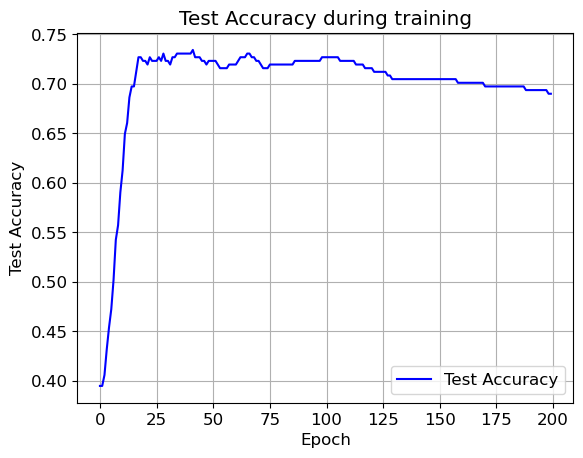

In [114]:
######################################################################### 
# visualize the accuracy on the test set as a function to the epochs

# Set the font size for the plot labels and title
plt.rcParams.update({'font.size': 12})

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the training loss as a blue line
ax.plot(test_acc_list, 'b-', label='Test Accuracy')

# Add a legend to the plot
ax.legend(loc='lower right')

# Set the plot labels and title
ax.set_xlabel('Epoch')
ax.set_ylabel('Test Accuracy')
ax.set_title('Test Accuracy during training')

# Add grid lines to the plot
ax.grid(True, which='both')

# Display the plot
plt.show()
######################################################################### 

In [115]:
######################################################################### 
# add your code here to run the label propagation

# one-hot encoded true label
labels = data.y.cpu().numpy()
one_hot_labels = np.eye(cora_dataset.num_classes)[labels]
one_hot_labels = torch.from_numpy(one_hot_labels).to(device)

def index_to_mask(index, size):
    mask = torch.zeros(size, dtype=torch.bool)
    mask[index] = 1
    return mask

# mask the labels
masked_labels = one_hot_labels.clone()
masked_labels[~train_mask] = 0


num_nodes = data.num_nodes
self_loops = torch.tensor([range(num_nodes), range(num_nodes)], dtype=torch.long).to(device)
edge_index_with_self_loops = torch.cat([data.edge_index, self_loops], dim=1)
adj_matrix = to_dense_adj(edge_index_with_self_loops).squeeze(0)

# Row normalization
deg = degree(edge_index_with_self_loops[0], num_nodes, dtype=adj_matrix.dtype)
transition_matrix = adj_matrix / deg.view(-1, 1)

# Run the label propagation algorithm for 10 epochs
transition_matrix = transition_matrix.float()
masked_labels = masked_labels.float()

num_epochs = 10
for epoch in range(num_epochs):
    propagated_labels = torch.matmul(transition_matrix, masked_labels)
    masked_labels[train_mask] = propagated_labels[train_mask]
######################################################################### 

### 🕵 <font color='289C4E'>Question<font><a class='anchor' id='top'></a>

(g)Compare the performance of different methods. Which method is affected most by the increase in training set size? Explain the possible reasons behind your observation in the following cell:

Answer:

<font color = 'red'>
Looking at the graphs it seems that the model using the hand-crafted features is the one affected the most, however I believe there must be an error in my code because such a great increase in performance seems unlikely. From the other two models, the model using the Cora features was the most affected by the increase in training size. The reason is that since it has more features, it benefits from more training data more than the Node2Vec model, which embeds the features into a vector of only three dimensions. 

---

## Lab 1.2.3 Link Prediction

In [128]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import roc_curve, auc, precision_recall_curve

### 📚 Decription of the dataset:    

Protein-protein interactions (PPI) are very important to discover new putative therapeutic targets to cure disease. Expensive and time-consuming wet-lab results are usually required to obtain PPI activity. PPI prediction aims to predict the PPI activity given a pair of proteins' amino acid sequences. For the Protein-protein interaction dataset, we build up the network as follows:

    - Each protein is a node on an undirected graph G. 
    - There is a connection between the two nodes if there is a known interaction in the training data.
    - The link prediction problem in this case is defined as: given the two nodes on the undirected graph, predict whether there is a link between them.

More information about the used PPI dataset can be found here: https://tdcommons.ai/multi_pred_tasks/ppi/

Use 70% of the data as training data, 30% as test data. Run the following code to load and split the cora dataset:

In [116]:
ppi = 'HuRI'
ppi_data = PPI(name=ppi)
# negative sample using fraction=1
ppi_data.neg_sample(frac=1)
# This would return a pytorch-geometric graph
graph = ppi_data.to_graph(format='pyg', split=True, seed=42)
graph_pyg = graph['pyg_graph']
# common neighbors
num_nodes = graph_pyg.x.shape[0]
n_id = range(num_nodes)
# split the data using
split = ppi_data.get_split(method = 'random', seed = 42, frac = [0.7, 0.0, 0.3])

Found local copy...
Loading...
Done!


Run the following code to check the test set

In [117]:
split["test"]

Protein1_ID                                           Protein1  \
0      ENSG00000122145  MALSSRARAFSVEALVGRPSKRKLQDPIQAEQPELREKKGGEEEEE...   
1      ENSG00000099994  MKPALLPWALLLLATALGPGPGPTADAQESCSMRCGALDGPCSCHP...   
2      ENSG00000125818  MAGLEVLFASAAPAITCRQDALVCFLHWEVVTHGYFGLGVGDQPGP...   
3      ENSG00000054938  MVPEVRVLSSLLGLALLWFPLDSHARARPDMFCLFHGKRYSPGESW...   
4      ENSG00000084463  MGRRSTSSTKSGKFMNPTDQARKEARKRELKKNKKQRMMVRAAVLK...   
...                ...                                                ...   
31416  ENSG00000140859  MVPSRRTWNLGATPSLRGLWRVGRAPEPEPGMARPAPAPASPAARP...   
31417  ENSG00000116030  MSDQEAKPSTEDLGDKKEGEYIKLKVIGQDSSEIHFKVKMTTHLKK...   
31418  ENSG00000160207  MGEAGAAEEACRHMGTKEEFVKVRKKDLERLTTEVMQIRDFLPRIL...   
31419  ENSG00000100109  MSLSHLYRDGEGRIDDDDDERENFEITDWDLQNEFNPNRQRHWQTK...   
31420  ENSG00000166228  MAGKAHRLSAEERDQLLPNLRAVGWNELEGRDAIFKQFHFKDFNRA...   

           Protein2_ID                                           Protein2  Y  
0      ENSG00000277745  MPRRRRRRGSSGAGGRGRTCSRTVRAELSFSVSQVERSLREGHYAQ...  0  
1      ENSG00000186280  METMKSKANCAQNPNCNIMIFHPTKEEFNDFDKYIAYMESQGAHRA...  0  
2      ENSG00000167612  MKVQPSVTCVASWGGIVHLEAFGDPVIVLRGAWAVPRVDCLIDTLR...  0  
3      ENSG00000117461  MYNTVWSMDRDDADWREVMMPYSTELIFYIEMDPPALPPKPPKPMT...  1  
4      ENSG00000171160  MTLTKGSFTYSSGEEYRGEWKEGRRHGFGQLMFADGGTYLGHFENG...  1  
...                ...                                                ... ..  
31416  ENSG00000164675  MSNQQEKYEAQNIVNSTEESDDAFDTVTIPVPSEEPQESDQTEEHE...  1  
31417  ENSG00000074771  MMGCWILNEGLSTILVLSWLGINFYLFIDTFYWYEEEESFHYTRVI...  0  
31418  ENSG00000167302  MAAAPPLRDRLSFLHRLPILLKGTSDDDVPCPGYLFEEIAKISHES...  1  
31419  ENSG00000171847  MMARRDPKPGAKRLVRAQTLQKQRRAPVGPRAPPPDEEDPRLKCKN...  1  
31420  ENSG00000125775  MSSLYPSLEDLKVDQAIQAQVRASPKMPALPVQATAISPPPVLYPN...  0  

[31421 rows x 5 columns]

As the positive and negative edges in the split are noted with the name of the proteins, run the following code to convert the positive and negative edges with the proteins name to the edges with their indices.

In [118]:
# convert the edges split into graph_pyg
map_book = graph["index_to_entities"]

train_edge_0 = split["train"]["Protein1_ID"].tolist()
train_edge_0_id = map(lambda key: map_book[key], train_edge_0)
train_edge_0 = [i for i in train_edge_0_id]

train_edge_1 = split["train"]["Protein2_ID"].tolist()
train_edge_1_id = map(lambda key: map_book[key], train_edge_1)
train_edge_1 = [i for i in train_edge_1_id]

train_edges = torch.vstack((torch.tensor(train_edge_0),torch.tensor(train_edge_1)))


test_edge_0 = split["test"]["Protein1_ID"].tolist()
test_edge_0_id = map(lambda key: map_book[key], test_edge_0)
test_edge_0 = [i for i in test_edge_0_id]

test_edge_1 = split["test"]["Protein2_ID"].tolist()
test_edge_1_id = map(lambda key: map_book[key], test_edge_1)
test_edge_1 = [i for i in test_edge_1_id]

test_edges = torch.vstack((torch.tensor(test_edge_0),torch.tensor(test_edge_1)))

### 📚 Decription of the Metrics:    

We use Average precision(AP) and Compute Area Under the Receiver Operating Characteristic Curve(AUROC) to evaluate the performance of the models in the link prediction task. The link to the descriptions of the metric can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html, https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

### 🕵 <font color='289C4E'>Question<font><a class='anchor' id='top'></a>

(a)For any pair of nodes (u,v) in the test set, compute scores for the link based on the common neighbors of the node pair normalized by the sigmoid function. Plot the ROC curve and the precision recall curve.

In [119]:
######################################################################### 
#add your code here to calculate the common neighbors of the node pairs in the test set
# create the adjacency matrix 
num_nodes = graph_pyg.num_nodes
adj_matrix = torch.zeros((num_nodes, num_nodes))

# fill in the edges in the adjacency matrix
for edge in graph_pyg.edge_index.t().tolist():
    adj_matrix[edge[0], edge[1]] = 1
    adj_matrix[edge[1], edge[0]] = 1 

common_neighbors = torch.mm(adj_matrix, adj_matrix.t())
test_common_neighbors = common_neighbors[test_edges[0], test_edges[1]]

#normalize the number of common neighbors using the sigmoid function
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

test_scores = sigmoid(test_common_neighbors.float())
######################################################################### 

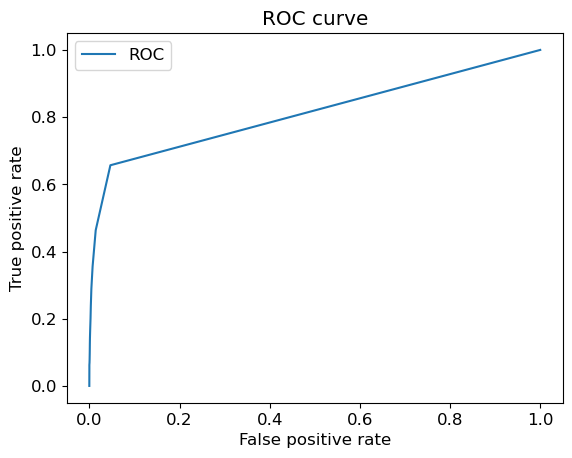

In [120]:
######################################################################### 
#add your code here to plot the ROC curve

labels = torch.Tensor(split["test"]["Y"].tolist())
roc_auc = roc_auc_score(labels, test_scores)
fpr, tpr, _ = roc_curve(labels, test_scores)

plt.figure(1)
plt.plot(fpr, tpr, label='ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
######################################################################### 

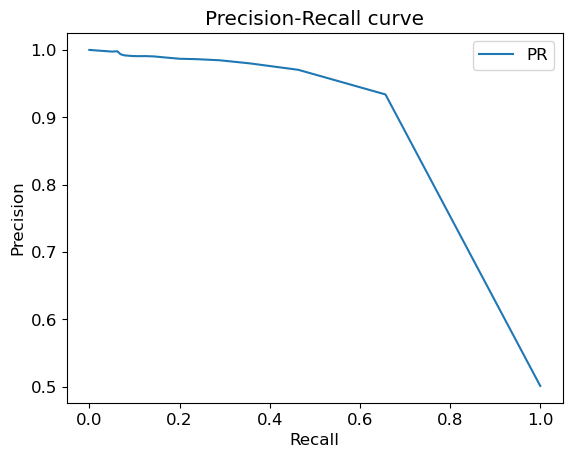

In [121]:
######################################################################### 
#add your code here to plot the precision recall curve
precision, recall, _ = precision_recall_curve(labels, test_scores)
average_precision = average_precision_score(labels, test_scores)

plt.figure(2)
plt.plot(recall, precision, label='PR')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='best')
plt.show()
######################################################################### 

### 🕵 <font color='289C4E'>Question<font><a class='anchor' id='top'></a>

(b)Extract node features using Node2Vec. Parameters stay the same as in the previous experiment. Compute cosine similarity between the extracted embedding vectors of nodes u and v in the test set as the link score. Convert the similarities into a probability distribution by applying the sigmoid function. Plot the ROC curve and the precision recall curve. 

In [122]:
######################################################################### 
# add your code here to generate embeddings for the PPI dataset using Node2Vec

data = graph_pyg.to(device)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Define model
model = Node2Vec(
    edge_index=data.edge_index,
    embedding_dim=3,
    walk_length=20,
    context_size=10,
    walks_per_node=10,
    num_negative_samples=1,
    p=1,
    q=1,
    num_nodes=data.num_nodes, 
    sparse=True,
).to(device)

# Define loader and optimizer
loader = model.loader(batch_size=128, shuffle=True, num_workers=0)
optimizer = torch.optim.SparseAdam(list(model.parameters()), lr=0.01)

# Define train function
def train():
    model.train()
    total_loss = 0
    for pos_rw, neg_rw in loader:
        optimizer.zero_grad()
        loss = model.loss(pos_rw.to(device), neg_rw.to(device))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

# Training 
for epoch in range(200):
    loss = train()
    if epoch % 10 == 0:
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

# Extract node embeddings
node_embeddings = model()

######################################################################### 

Epoch: 000, Loss: 1.1752
Epoch: 010, Loss: 0.8167
Epoch: 020, Loss: 0.8062
Epoch: 030, Loss: 0.8030
Epoch: 040, Loss: 0.8006
Epoch: 050, Loss: 0.7990
Epoch: 060, Loss: 0.7983
Epoch: 070, Loss: 0.7981
Epoch: 080, Loss: 0.7976
Epoch: 090, Loss: 0.7971
Epoch: 100, Loss: 0.7969
Epoch: 110, Loss: 0.7965
Epoch: 120, Loss: 0.7970
Epoch: 130, Loss: 0.7965
Epoch: 140, Loss: 0.7961
Epoch: 150, Loss: 0.7959
Epoch: 160, Loss: 0.7953
Epoch: 170, Loss: 0.7956
Epoch: 180, Loss: 0.7956
Epoch: 190, Loss: 0.7951


In [125]:
######################################################################### 
# add your code here to calculate the cosine similairity of the node pairs in the test set
# dont forget to normalize the similarities using sigmoid
test_node_indices = test_edges.cpu().numpy()
link_scores = [cosine_similarity(node_embeddings[u].cpu().detach().numpy().reshape(1, -1), 
                                 node_embeddings[v].cpu().detach().numpy().reshape(1, -1)) 
               for u, v in test_node_indices.T]

# Applying the sigmoid
link_scores_sigmoid = F.sigmoid(torch.tensor(link_scores)).numpy()
link_scores_sigmoid = link_scores_sigmoid.reshape(link_scores_sigmoid.shape[0])
######################################################################### 

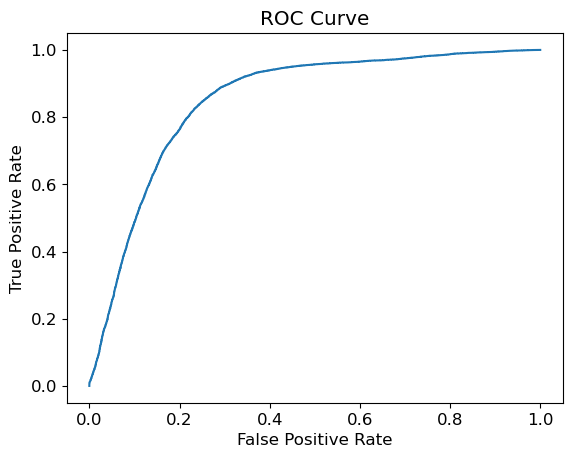

In [135]:
######################################################################### 
# add your code here to plot the roc curve
y_test = torch.Tensor(split["test"]["Y"].tolist())
fpr, tpr, _ = roc_curve(y_test, link_scores_sigmoid)


plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
######################################################################### 

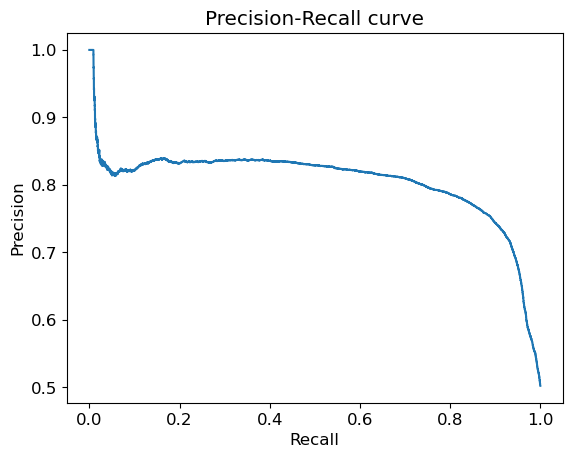

In [136]:
######################################################################### 
# add your code here to plot the precision and recall curve
precision, recall, _ = precision_recall_curve(y_test, link_scores_sigmoid)
plt.figure()
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()
######################################################################### 

### 🕵 <font color='289C4E'>Question<font><a class='anchor' id='top'></a>

(c)Which method performs better: Node2Vec or common neighbors? Give your answer and explain the reasons in the folowing cell.

Answer: 

<font color = 'red'>
Node2Vec performed better than the common neighbors method, probably because it is more effective at embedding the graph structure, leading to more accurate node classification. However, while Node2Vec was better in the ROC curve, indicating better  class discrimination, it performed worse and showed a strange line shape in the precision-recall curve.<br><br/>
    
<font color = 'red'> 
To see if the precision-recall curve could be improved, I ran an experiment changing the dimensions of the feature embedding for Node2Vec. Increasing the embedding dimension greatly improved the ROC and especially the Precision-Recall curve. A higher-dimensional embedding space allows Node2Vec to produce more informative features for the model to train on.<br><br/>
    
<font color = 'red'>
The results of the experiment are presented in the following figure:
    
![Node2Vec Embedding Size Experiment](embedding_size_experiment.png)    

### 🕵 <font color='289C4E'>Question<font><a class='anchor' id='top'></a>

(d)So far we have not used the negative edges of the train set during training. Instead of directly computing scores from extracted features we will now train a two layer multilayer perceptron for predicting a link between two nodes. For any pair of nodes (u,v),  concatenate the Node2Vec extracted embedding vectors of nodes u and v. The concatenated pair serve as input to the MLP. The output layer will be two neurons predicting the probability of existence of a link. Set the hidden layer dimension to 16. 

In order to do the link prediction task, we need to prepare the data. Run the code in the following cell to concatenate the embeddings of the node pair and the true labels of the link.

In [150]:
emb_n2v = node_embeddings.to(device) 

# prepare data for link prediction task
train_emb = []
for e in torch.transpose(train_edges, 0, 1):
    emb1 = emb_n2v[e[0]]
    emb2 = emb_n2v[e[1]]
    edge_emb = torch.hstack((emb1, emb2))
    train_emb.append(edge_emb)
train_emb = torch.stack(train_emb)

test_emb = []
for e in torch.transpose(test_edges, 0, 1):
    emb1 = emb_n2v[e[0]]
    emb2 = emb_n2v[e[1]]
    edge_emb = torch.hstack((emb1, emb2))
    test_emb.append(edge_emb)
test_emb = torch.stack(test_emb)

train_y = torch.tensor(split["train"]["Y"]).to(device) #.to(device) 
test_y = torch.tensor(split["test"]["Y"]).to(device) #.to(device) 

In the following cell, instantiate a two layer MLP and train it using the training data prepared in the previous cell. Print and visulaize the ap score and the auroc score as a function to the epochs

In [ ]:
######################################################################### 
#define and train your MLP here. print the scores during training
mlp = MLP(train_emb.shape[1], 16, 2).to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.01)

aps = []
aurocs = []

num_epochs = 200

# Training
for epoch in range(num_epochs):
    mlp.train()
    optimizer.zero_grad()
    outputs = mlp(train_emb.to(device))
    loss = criterion(outputs, train_y.to(device).long())
    loss.backward()
    optimizer.step()
    
    # Calculate scores
    mlp.eval()
    with torch.no_grad():
        test_outputs = mlp(test_emb.to(device))
        test_predictions = torch.argmax(test_outputs, dim=1)
        
        ap = average_precision_score(test_y.cpu(), test_predictions.cpu())
        auroc = roc_auc_score(test_y.cpu(), test_predictions.cpu())
        
        aps.append(ap)
        aurocs.append(auroc)
        
        if epoch % 10 == 0:
            print(f"Epoch {epoch} of {num_epochs}, Loss: {loss.item()}, AP: {ap}, AUROC: {auroc}")
#########################################################################     

Epoch 0 of 200, Loss: 0.7461676001548767, AP: 0.3391139162563173, AUROC: 0.5200636952790874
Epoch 10 of 200, Loss: 0.577930212020874, AP: 0.41455589920734015, AUROC: 0.5781063940101173
Epoch 20 of 200, Loss: 0.5155830979347229, AP: 0.4883700337783996, AUROC: 0.6548770009278154
Epoch 30 of 200, Loss: 0.48931819200515747, AP: 0.5340677955416868, AUROC: 0.6963908207517913
Epoch 40 of 200, Loss: 0.46105095744132996, AP: 0.566925671400931, AUROC: 0.7221507302637238
Epoch 50 of 200, Loss: 0.43240591883659363, AP: 0.617500364743957, AUROC: 0.7609568389901405
Epoch 60 of 200, Loss: 0.4096180200576782, AP: 0.6463827994859213, AUROC: 0.7880710845732439
Epoch 70 of 200, Loss: 0.3930683434009552, AP: 0.6537439951110321, AUROC: 0.7964655134780829
Epoch 80 of 200, Loss: 0.38275814056396484, AP: 0.6604089103700524, AUROC: 0.8042322864786536


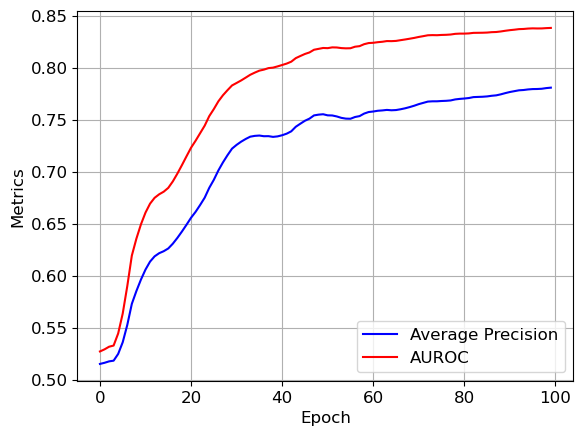

In [141]:
######################################################################### 
# visualize the scores as a function to the epochs

# Set the font size for the plot labels and title
plt.rcParams.update({'font.size': 12})

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the training loss as a blue line
ax.plot(aps, 'b-', label='Average Precision')
ax.plot(aurocs, 'r-', label='AUROC')

# Add a legend to the plot
ax.legend(loc='lower right')

# Set the plot labels and title
ax.set_xlabel('Epoch')
ax.set_ylabel('Metrics')

# Add grid lines to the plot
ax.grid(True, which='both')

# Display the plot
plt.show()
######################################################################### 

### 🕵 <font color='289C4E'>Question<font><a class='anchor' id='top'></a>

(e)Now increase the fraction of negative edges in the train/val/test sets to 2. Run the MLP experiment again.

Run the following code to increase fraction of the negative edges and prepare the data again

In [144]:
ppi = 'HuRI'
ppi_data = PPI(name=ppi)
ppi_data.neg_sample(frac=2)
# This would return a pytorch-geometric graph
graph = ppi_data.to_graph(format='pyg', split=True, seed=42)
graph_pyg = graph['pyg_graph']
# common neighbors
num_nodes = graph_pyg.x.shape[0]
n_id = range(num_nodes)

split = ppi_data.get_split(method = 'random', seed = 42, frac = [0.7, 0.0, 0.3])

# convert the edges split into graph_pyg
map_book = graph["index_to_entities"]

train_edge_0 = split["train"]["Protein1_ID"].tolist()
train_edge_0_id = map(lambda key: map_book[key], train_edge_0)
train_edge_0 = [i for i in train_edge_0_id]

train_edge_1 = split["train"]["Protein2_ID"].tolist()
train_edge_1_id = map(lambda key: map_book[key], train_edge_1)
train_edge_1 = [i for i in train_edge_1_id]

train_edges = torch.vstack((torch.tensor(train_edge_0),torch.tensor(train_edge_1)))


test_edge_0 = split["test"]["Protein1_ID"].tolist()
test_edge_0_id = map(lambda key: map_book[key], test_edge_0)
test_edge_0 = [i for i in test_edge_0_id]

test_edge_1 = split["test"]["Protein2_ID"].tolist()
test_edge_1_id = map(lambda key: map_book[key], test_edge_1)
test_edge_1 = [i for i in test_edge_1_id]

test_edges = torch.vstack((torch.tensor(test_edge_0),torch.tensor(test_edge_1)))

# prepare data 
model.eval()
emb_n2v = model(torch.arange(graph_pyg.num_nodes).to(device)) # .to(device)
emb_n2v = emb_n2v.detach()
train_emb = []
for e in torch.transpose(train_edges, 0, 1):
    emb1 = emb_n2v[e[0]]
    emb2 = emb_n2v[e[1]]
    edge_emb = torch.hstack((emb1, emb2))
    train_emb.append(edge_emb)
train_emb = torch.stack(train_emb)

test_emb = []
for e in torch.transpose(test_edges, 0, 1):
    emb1 = emb_n2v[e[0]]
    emb2 = emb_n2v[e[1]]
    edge_emb = torch.hstack((emb1, emb2))
    test_emb.append(edge_emb)
test_emb = torch.stack(test_emb)

train_y = torch.tensor(split["train"]["Y"]).to(device) # .to(device) 
test_y = torch.tensor(split["test"]["Y"]).to(device) # .to(device)

Found local copy...
Loading...
Done!


In [147]:
######################################################################### 
#define and train your MLP here. print the scores during training

mlp = MLP(train_emb.shape[1], 16, 2).to(device)

# Loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.01)

aps = []
aurocs = []
num_epochs = 200

# Training
for epoch in range(num_epochs):
    mlp.train()
    optimizer.zero_grad()
    outputs = mlp(train_emb.to(device))
    loss = criterion(outputs, train_y.to(device).long())
    loss.backward()
    optimizer.step()
    
    # Calculate scores
    mlp.eval()
    with torch.no_grad():
        test_outputs = mlp(test_emb.to(device))
        test_predictions = torch.argmax(test_outputs, dim=1)
        
        ap = average_precision_score(test_y.cpu(), test_predictions.cpu())
        auroc = roc_auc_score(test_y.cpu(), test_predictions.cpu())
        
        aps.append(ap)
        aurocs.append(auroc)
        
        if epoch % 10 == 0:
            print(f"Epoch {epoch} of {num_epochs}, Loss: {loss.item()}, AP: {ap}, AUROC: {auroc}")

Epoch 0 of 200, Loss: 0.6499596238136292, AP: 0.3329135392036976, AUROC: 0.5040633584247466
Epoch 10 of 200, Loss: 0.5577946901321411, AP: 0.43367334378590283, AUROC: 0.5919485948547942
Epoch 20 of 200, Loss: 0.5086044073104858, AP: 0.5156254083531664, AUROC: 0.6753982064623909
Epoch 30 of 200, Loss: 0.4796016812324524, AP: 0.5488793875581881, AUROC: 0.7009133549715011
Epoch 40 of 200, Loss: 0.4537028670310974, AP: 0.5941322367281511, AUROC: 0.73933995281433
Epoch 50 of 200, Loss: 0.4295765161514282, AP: 0.6208967300215276, AUROC: 0.7631204358517267
Epoch 60 of 200, Loss: 0.4092214107513428, AP: 0.6392668791427606, AUROC: 0.7827538599793586
Epoch 70 of 200, Loss: 0.39385896921157837, AP: 0.6546577061818605, AUROC: 0.7978571796235049
Epoch 80 of 200, Loss: 0.3829723298549652, AP: 0.6596221641637283, AUROC: 0.8023827639387329
Epoch 90 of 200, Loss: 0.37465018033981323, AP: 0.6634888872103204, AUROC: 0.8059913404978407
Epoch 100 of 200, Loss: 0.36802658438682556, AP: 0.6670808654347433, A

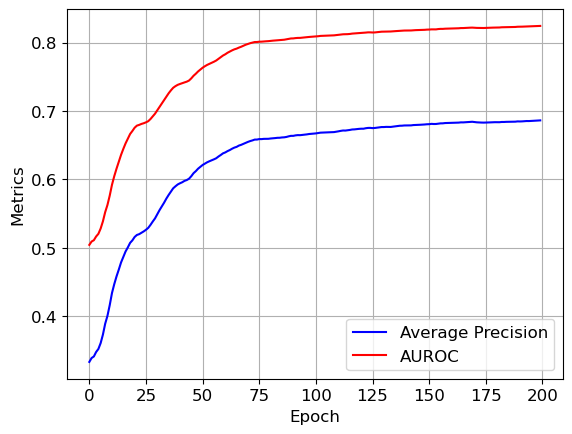

In [148]:
######################################################################### 
# visualize the scores as a function to the epochs

# Set the font size for the plot labels and title
plt.rcParams.update({'font.size': 12})

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the training loss as a blue line
ax.plot(aps, 'b-', label='Average Precision')
ax.plot(aurocs, 'r-', label='AUROC')

# Add a legend to the plot
ax.legend(loc='lower right')

# Set the plot labels and title
ax.set_xlabel('Epoch')
ax.set_ylabel('Metrics')

# Add grid lines to the plot
ax.grid(True, which='both')

# Display the plot
plt.show()
######################################################################### 

### 🕵 <font color='289C4E'>Question<font><a class='anchor' id='top'></a>

(f)Which evaluation metrics is affected most by the imbalance in the size of the positive and the negative class? Which metrics would you then prefer to use in such an imbalanced setting and why?

<font color = 'red'>
Average precision was more influenced by increasing the fraction of negative edges, as can be observed in the two graphs. The performance of average precision declines by about 10% when the fraction of negative edges is increased, while the performance of AUROC remains largely unchanged. After investigating why, I believe the reason is that average precision measures the impact of false positives, which tend to grow when the fraction of the negative class is increased. On the other hand, AUROC, which considers both true positive and false positive rates, is generally more resilient to the imbalance. 

---